In [12]:
# ============================================================================
# SETUP & IMPORTS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
import os

# ML Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from scipy import stats

# Suppress warnings
warnings.filterwarnings('ignore')

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

print("=" * 80)
print("TRADER PERFORMANCE & BITCOIN SENTIMENT ANALYSIS PIPELINE")
print("=" * 80)

TRADER PERFORMANCE & BITCOIN SENTIMENT ANALYSIS PIPELINE


In [13]:
# ============================================================================
# HELPER FUNCTIONS FOR DATA LOADING FROM GOOGLE DRIVE
# ============================================================================

def load_data_from_gdrive(file_id, file_name):
    """
    Load data from Google Drive
    """
    url = f'https://drive.google.com/uc?id={file_id}'
    try:
        if file_name.endswith('.csv'):
            df = pd.read_csv(url)
        elif file_name.endswith('.xlsx') or file_name.endswith('.xls'):
            df = pd.read_csv(url)
        print(f"✓ Successfully loaded {file_name}")
        return df
    except Exception as e:
        print(f"✗ Error loading {file_name}: {str(e)}")
        return None

# Extract file IDs from the URLs
SENTIMENT_FILE_ID = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
TRADER_FILE_ID = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"

In [14]:
# ============================================================================
# HELPER FUNCTIONS FOR DATA LOADING FROM GOOGLE DRIVE
# ============================================================================

def load_data_from_gdrive(file_id, file_name):
    """
    Load data from Google Drive
    """
    url = f'https://drive.google.com/uc?id={file_id}'
    try:
        if file_name.endswith('.csv'):
            df = pd.read_csv(url)
        elif file_name.endswith('.xlsx') or file_name.endswith('.xls'):
            df = pd.read_csv(url)
        print(f"✓ Successfully loaded {file_name}")
        return df
    except Exception as e:
        print(f"✗ Error loading {file_name}: {str(e)}")
        return None

# Extract file IDs from the URLs
SENTIMENT_FILE_ID = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"
TRADER_FILE_ID = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"

In [15]:
# ============================================================================
# PHASE 1: DATA UNDERSTANDING & PREPARATION
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 1: DATA UNDERSTANDING & PREPARATION")
print("=" * 80)

# ============================================================================
# 1.1 INITIAL DATA EXPLORATION
# ============================================================================

print("\n" + "-" * 80)
print("1.1 INITIAL DATA EXPLORATION")
print("-" * 80)

# Load datasets
print("\n📊 Loading datasets...")
sentiment_df = load_data_from_gdrive(SENTIMENT_FILE_ID, "sentiment.csv")
trader_df = load_data_from_gdrive(TRADER_FILE_ID, "trader.csv")

# Display basic information
print("\n" + "=" * 80)
print("SENTIMENT DATASET - FIRST 20 ROWS")
print("=" * 80)
print(sentiment_df.head(20))

print("\n" + "=" * 80)
print("SENTIMENT DATASET - LAST 20 ROWS")
print("=" * 80)
print(sentiment_df.tail(20))

print("\n" + "=" * 80)
print("TRADER DATASET - FIRST 20 ROWS")
print("=" * 80)
print(trader_df.head(20))

print("\n" + "=" * 80)
print("TRADER DATASET - LAST 20 ROWS")
print("=" * 80)
print(trader_df.tail(20))


PHASE 1: DATA UNDERSTANDING & PREPARATION

--------------------------------------------------------------------------------
1.1 INITIAL DATA EXPLORATION
--------------------------------------------------------------------------------

📊 Loading datasets...
✓ Successfully loaded sentiment.csv
✓ Successfully loaded trader.csv

SENTIMENT DATASET - FIRST 20 ROWS
     timestamp  value classification        date
0   1517463000     30           Fear  2018-02-01
1   1517549400     15   Extreme Fear  2018-02-02
2   1517635800     40           Fear  2018-02-03
3   1517722200     24   Extreme Fear  2018-02-04
4   1517808600     11   Extreme Fear  2018-02-05
5   1517895000      8   Extreme Fear  2018-02-06
6   1517981400     36           Fear  2018-02-07
7   1518067800     30           Fear  2018-02-08
8   1518154200     44           Fear  2018-02-09
9   1518240600     54        Neutral  2018-02-10
10  1518327000     31           Fear  2018-02-11
11  1518413400     42           Fear  2018-02-12
1

In [16]:
# Dataset Shapes and Memory Usage
print("\n" + "=" * 80)
print("DATASET DIMENSIONS & MEMORY USAGE")
print("=" * 80)

print("\n📈 SENTIMENT DATASET:")
print(f"   Shape: {sentiment_df.shape[0]:,} rows × {sentiment_df.shape[1]} columns")
print(f"   Memory Usage: {sentiment_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n   Column Names: {list(sentiment_df.columns)}")

print("\n📈 TRADER DATASET:")
print(f"   Shape: {trader_df.shape[0]:,} rows × {trader_df.shape[1]} columns")
print(f"   Memory Usage: {trader_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n   Column Names: {list(trader_df.columns)}")

# Data Types
print("\n" + "=" * 80)
print("DATA TYPES")
print("=" * 80)

print("\n📊 Sentiment Dataset Data Types:")
print(sentiment_df.dtypes)
print(f"\n   Info:")
sentiment_df.info()

print("\n📊 Trader Dataset Data Types:")
print(trader_df.dtypes)
print(f"\n   Info:")
trader_df.info()


DATASET DIMENSIONS & MEMORY USAGE

📈 SENTIMENT DATASET:
   Shape: 2,644 rows × 4 columns
   Memory Usage: 0.33 MB

   Column Names: ['timestamp', 'value', 'classification', 'date']

📈 TRADER DATASET:
   Shape: 211,224 rows × 16 columns
   Memory Usage: 102.20 MB

   Column Names: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

DATA TYPES

📊 Sentiment Dataset Data Types:
timestamp          int64
value              int64
classification    object
date              object
dtype: object

   Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date   

In [32]:
# Unique Accounts/Traders
print("\n" + "=" * 80)
print("UNIQUE TRADERS ANALYSIS")
print("=" * 80)

if 'Account' in trader_df.columns:
    unique_accounts = trader_df['Account'].nunique()
    print(f"\n📊 Total Unique Traders: {unique_accounts:,}")
    print(f"   Total Transactions: {len(trader_df):,}")
    print(f"   Avg Transactions per Trader: {len(trader_df)/unique_accounts:.2f}")
    
    # Top traders by transaction count
    top_traders = trader_df['Account'].value_counts().head(10)
    print("\n🏆 Top 10 Most Active Traders:")
    for idx, (Account, count) in enumerate(top_traders.items(), 1):
        print(f"   {idx}. {Account[:20]}... : {count:,} transactions")


UNIQUE TRADERS ANALYSIS

📊 Total Unique Traders: 32
   Total Transactions: 211,224
   Avg Transactions per Trader: 6600.75

🏆 Top 10 Most Active Traders:
   1. 0xbee1707d6b44d4d52b... : 40,184 transactions
   2. 0xbaaaf6571ab7d57104... : 21,192 transactions
   3. 0xa0feb3725a9335f498... : 15,605 transactions
   4. 0x8477e447846c758f5a... : 14,998 transactions
   5. 0xb1231a4a2dd02f2276... : 14,733 transactions
   6. 0x28736f43f1e871e6aa... : 13,311 transactions
   7. 0x513b8629fe877bb581... : 12,236 transactions
   8. 0x75f7eeb85dc639d5e9... : 9,893 transactions
   9. 0x47add9a56df66b524d... : 8,519 transactions
   10. 0x4f93fead39b70a1824... : 7,584 transactions


In [18]:
# Date Range Analysis
print("\n" + "=" * 80)
print("DATE RANGE ANALYSIS")
print("=" * 80)

# Identify date columns
sentiment_date_col = 'Date' if 'Date' in sentiment_df.columns else sentiment_df.columns[0]
trader_date_col = 'time' if 'time' in trader_df.columns else None

print(f"\n📅 Sentiment Dataset Date Column: '{sentiment_date_col}'")
if trader_date_col:
    print(f"📅 Trader Dataset Date Column: '{trader_date_col}'")

# Convert to datetime
try:
    sentiment_df[sentiment_date_col] = pd.to_datetime(sentiment_df[sentiment_date_col])
    print(f"\n✓ Sentiment dates converted to datetime")
    
    print(f"\n📊 Sentiment Dataset Date Range:")
    print(f"   Start Date: {sentiment_df[sentiment_date_col].min()}")
    print(f"   End Date: {sentiment_df[sentiment_date_col].max()}")
    print(f"   Duration: {(sentiment_df[sentiment_date_col].max() - sentiment_df[sentiment_date_col].min()).days} days")
    print(f"   Total Records: {len(sentiment_df):,}")
except Exception as e:
    print(f"✗ Error converting sentiment dates: {e}")

if trader_date_col:
    try:
        trader_df[trader_date_col] = pd.to_datetime(trader_df[trader_date_col])
        print(f"\n✓ Trader dates converted to datetime")
        
        print(f"\n📊 Trader Dataset Date Range:")
        print(f"   Start Date: {trader_df[trader_date_col].min()}")
        print(f"   End Date: {trader_df[trader_date_col].max()}")
        print(f"   Duration: {(trader_df[trader_date_col].max() - trader_df[trader_date_col].min()).days} days")
        print(f"   Total Transactions: {len(trader_df):,}")
        
        # Check overlap
        print(f"\n📊 Date Range Overlap:")
        overlap_start = max(sentiment_df[sentiment_date_col].min(), trader_df[trader_date_col].min())
        overlap_end = min(sentiment_df[sentiment_date_col].max(), trader_df[trader_date_col].max())
        
        if overlap_start <= overlap_end:
            print(f"   ✓ Datasets overlap from {overlap_start} to {overlap_end}")
            print(f"   Overlap Duration: {(overlap_end - overlap_start).days} days")
        else:
            print(f"   ✗ No overlap between datasets!")
            
    except Exception as e:
        print(f"✗ Error converting trader dates: {e}")


DATE RANGE ANALYSIS

📅 Sentiment Dataset Date Column: 'timestamp'

✓ Sentiment dates converted to datetime

📊 Sentiment Dataset Date Range:
   Start Date: 1970-01-01 00:00:01.517463
   End Date: 1970-01-01 00:00:01.746163800
   Duration: 0 days
   Total Records: 2,644


In [19]:
# ============================================================================
# 1.2 DATA QUALITY ASSESSMENT
# ============================================================================

print("\n" + "=" * 80)
print("1.2 DATA QUALITY ASSESSMENT")
print("=" * 80)

# Missing Values Analysis
print("\n" + "-" * 80)
print("MISSING VALUES ANALYSIS")
print("-" * 80)

def analyze_missing_values(df, dataset_name):
    """Comprehensive missing values analysis"""
    print(f"\n📊 {dataset_name}:")
    
    missing_count = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': missing_count.values,
        'Missing_Percentage': missing_percent.values
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    
    if len(missing_df) > 0:
        print(missing_df.to_string(index=False))
        print(f"\n   Total columns with missing values: {len(missing_df)}")
    else:
        print("   ✓ No missing values detected!")
    
    return missing_df

sentiment_missing = analyze_missing_values(sentiment_df, "SENTIMENT DATASET")
trader_missing = analyze_missing_values(trader_df, "TRADER DATASET")


1.2 DATA QUALITY ASSESSMENT

--------------------------------------------------------------------------------
MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------

📊 SENTIMENT DATASET:
   ✓ No missing values detected!

📊 TRADER DATASET:
   ✓ No missing values detected!


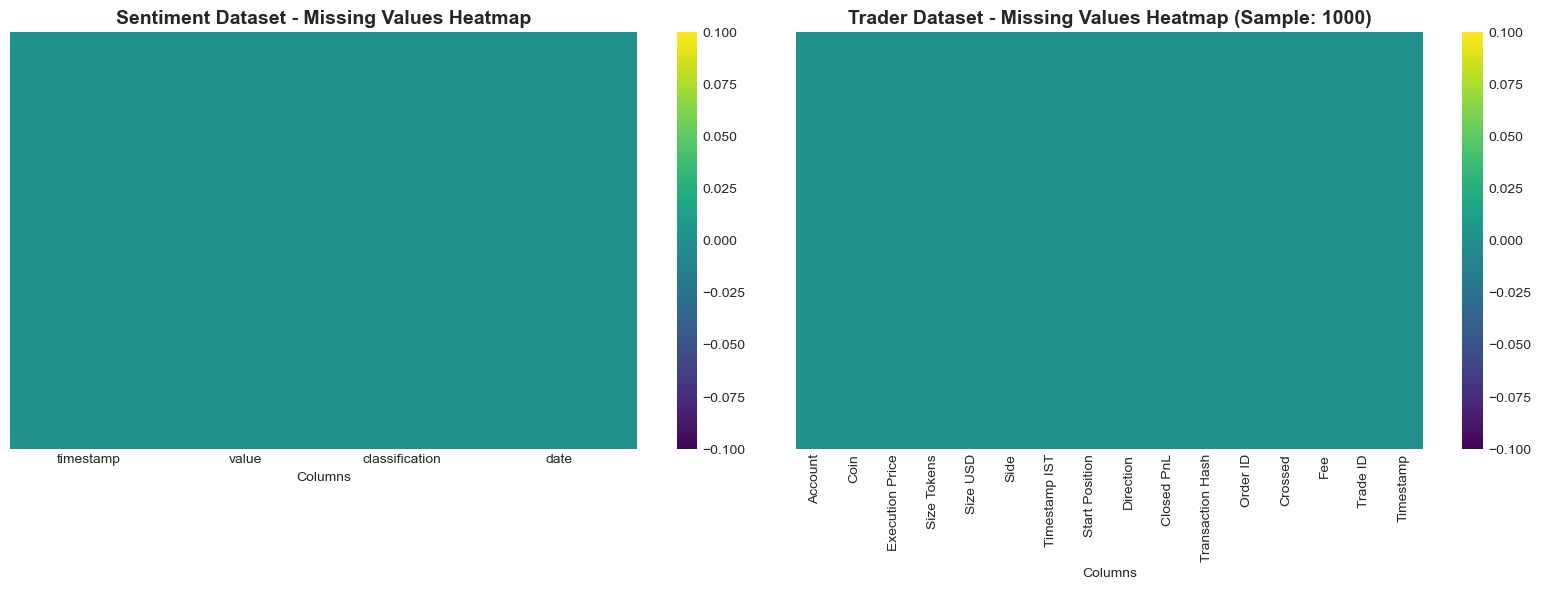

In [20]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sentiment missing values heatmap
sns.heatmap(sentiment_df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Sentiment Dataset - Missing Values Heatmap', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Columns')

# Trader missing values heatmap (sample for large datasets)
sample_size = min(1000, len(trader_df))
sns.heatmap(trader_df.sample(sample_size).isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=axes[1])
axes[1].set_title(f'Trader Dataset - Missing Values Heatmap (Sample: {sample_size})', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Columns')

plt.tight_layout()
plt.show()

# Missing values percentage bar chart
if len(sentiment_missing) > 0 or len(trader_missing) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    if len(sentiment_missing) > 0:
        axes[0].barh(sentiment_missing['Column'], sentiment_missing['Missing_Percentage'], color='coral')
        axes[0].set_xlabel('Missing Percentage (%)')
        axes[0].set_title('Sentiment Dataset - Missing Values %', fontweight='bold')
        axes[0].grid(axis='x', alpha=0.3)
    else:
        axes[0].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=16)
        axes[0].set_title('Sentiment Dataset - Missing Values %', fontweight='bold')
    
    if len(trader_missing) > 0:
        axes[1].barh(trader_missing['Column'][:15], trader_missing['Missing_Percentage'][:15], color='skyblue')
        axes[1].set_xlabel('Missing Percentage (%)')
        axes[1].set_title('Trader Dataset - Top 15 Missing Values %', fontweight='bold')
        axes[1].grid(axis='x', alpha=0.3)
    else:
        axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=16)
        axes[1].set_title('Trader Dataset - Missing Values %', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [21]:
# Duplicate Detection
print("\n" + "-" * 80)
print("DUPLICATE TRANSACTIONS DETECTION")
print("-" * 80)

print(f"\n📊 Sentiment Dataset:")
sentiment_duplicates = sentiment_df.duplicated().sum()
print(f"   Total Duplicates: {sentiment_duplicates:,} ({sentiment_duplicates/len(sentiment_df)*100:.2f}%)")

if sentiment_duplicates > 0:
    print(f"\n   Duplicate rows sample:")
    print(sentiment_df[sentiment_df.duplicated(keep=False)].head(10))

print(f"\n📊 Trader Dataset:")
trader_duplicates = trader_df.duplicated().sum()
print(f"   Total Exact Duplicates: {trader_duplicates:,} ({trader_duplicates/len(trader_df)*100:.2f}%)")

# Check for duplicates based on key columns
if 'account' in trader_df.columns and trader_date_col:
    key_cols = ['account', trader_date_col, 'symbol', 'side', 'execution_price', 'size'] if all(col in trader_df.columns for col in ['symbol', 'side', 'execution_price', 'size']) else ['account', trader_date_col]
    key_duplicates = trader_df.duplicated(subset=key_cols, keep=False).sum()
    print(f"   Duplicates based on key columns {key_cols}: {key_duplicates:,}")


--------------------------------------------------------------------------------
DUPLICATE TRANSACTIONS DETECTION
--------------------------------------------------------------------------------

📊 Sentiment Dataset:
   Total Duplicates: 0 (0.00%)

📊 Trader Dataset:
   Total Exact Duplicates: 0 (0.00%)


In [33]:
# Outlier Detection for Numerical Columns
print("\n" + "-" * 80)
print("OUTLIER DETECTION")
print("-" * 80)

def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    if column not in df.columns or df[column].dtype not in ['int64', 'float64']:
        return None
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return {
        'column': column,
        'total_outliers': len(outliers),
        'percentage': len(outliers) / len(df) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'min': df[column].min(),
        'max': df[column].max()
    }

# Identify numerical columns in trader dataset
numerical_cols = trader_df.select_dtypes(include=[np.number]).columns.tolist()
key_numerical_cols = [col for col in ['Execution Price', 'Size Tokens', 'Size USD' , 'Closed PnL', 'Fee'] if col in numerical_cols]

print("\n📊 Outlier Analysis for Key Numerical Columns:")
outlier_results = []

for col in key_numerical_cols:
    result = detect_outliers_iqr(trader_df, col)
    if result:
        outlier_results.append(result)
        print(f"\n   {col}:")
        print(f"      Outliers: {result['total_outliers']:,} ({result['percentage']:.2f}%)")
        print(f"      Range: [{result['min']:.2f}, {result['max']:.2f}]")
        print(f"      IQR Bounds: [{result['lower_bound']:.2f}, {result['upper_bound']:.2f}]")


--------------------------------------------------------------------------------
OUTLIER DETECTION
--------------------------------------------------------------------------------

📊 Outlier Analysis for Key Numerical Columns:

   Execution Price:
      Outliers: 42,187 (19.97%)
      Range: [0.00, 109004.00]
      IQR Bounds: [-140.23, 246.67]

   Size Tokens:
      Outliers: 34,744 (16.45%)
      Range: [0.00, 15822438.00]
      IQR Bounds: [-274.50, 465.35]

   Size USD:
      Outliers: 32,661 (15.46%)
      Range: [0.00, 3921430.72]
      IQR Bounds: [-2603.97, 4856.72]

   Closed PnL:
      Outliers: 48,941 (23.17%)
      Range: [-117990.10, 135329.09]
      IQR Bounds: [-8.69, 14.48]

   Fee:
      Outliers: 30,278 (14.33%)
      Range: [-1.18, 837.47]
      IQR Bounds: [-0.55, 0.96]


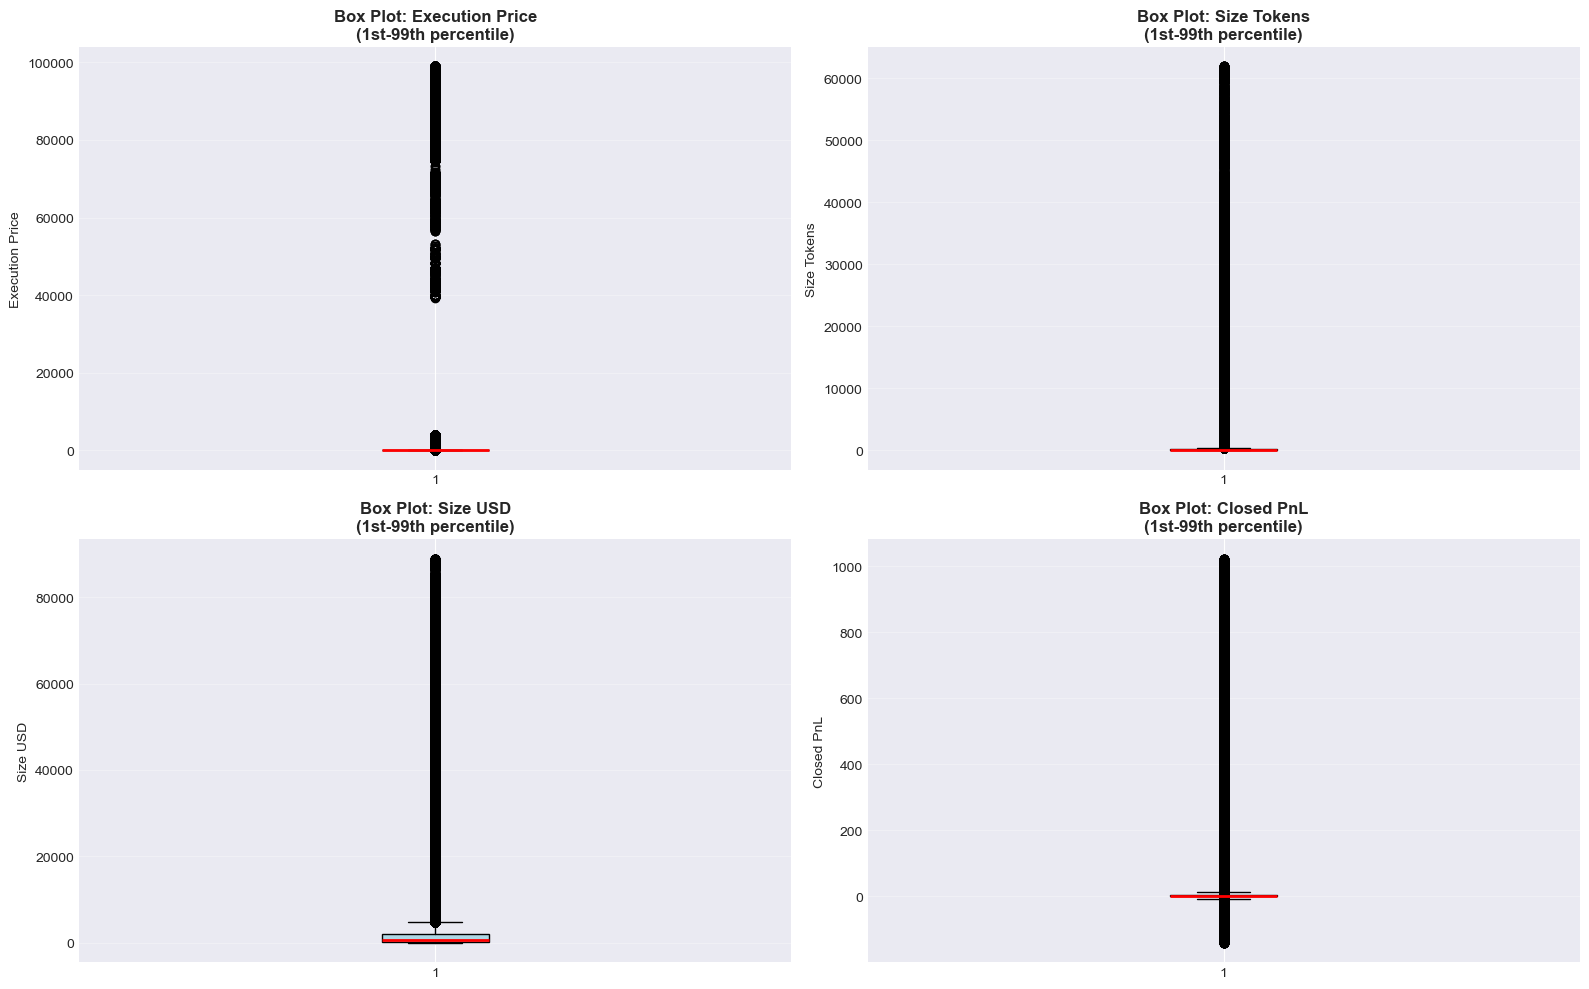

In [34]:
# Visualize outliers with box plots
if len(key_numerical_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.ravel()
    
    for idx, col in enumerate(key_numerical_cols[:4]):
        if col in trader_df.columns:
            # Remove extreme outliers for better visualization
            data_to_plot = trader_df[col].dropna()
            q1, q99 = data_to_plot.quantile([0.01, 0.99])
            data_filtered = data_to_plot[(data_to_plot >= q1) & (data_to_plot <= q99)]
            
            axes[idx].boxplot(data_filtered, vert=True, patch_artist=True,
                            boxprops=dict(facecolor='lightblue'),
                            medianprops=dict(color='red', linewidth=2))
            axes[idx].set_ylabel(col)
            axes[idx].set_title(f'Box Plot: {col}\n(1st-99th percentile)', fontweight='bold')
            axes[idx].grid(axis='y', alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(key_numerical_cols), 4):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

In [36]:
# Data Consistency Checks
print("\n" + "-" * 80)
print("DATA CONSISTENCY CHECKS")
print("-" * 80)

# Check sentiment classification values
if 'classification' in sentiment_df.columns:
    print(f"\n📊 Sentiment classification Values:")
    print(sentiment_df['classification'].value_counts())
    unique_values = sentiment_df['classification'].unique()
    print(f"\n   Unique values: {unique_values}")
    
    # Check for unexpected values
    expected_values = ['Fear', 'Greed', 'fear', 'greed']
    unexpected = [val for val in unique_values if val not in expected_values and pd.notna(val)]
    if unexpected:
        print(f"   ⚠ Unexpected values found: {unexpected}")

# Check if Size USD = Execution Price × Size Tokens (if columns exist)
if all(col in trader_df.columns for col in ['Execution Price', 'Size USD']):
    print(f"\n📊 Price × Size Consistency Check:")
    
    # Calculate expected Size USD USD
    trader_df['calculated_size_usd'] = trader_df['Execution Price'] * trader_df['Size USD'].abs()
    
    # If Size USD column exists, compare
    if 'Size USD' in trader_df.columns:
        # Allow for small rounding errors
        difference = (trader_df['Size USD'] - trader_df['calculated_size_usd']).abs()
        inconsistent = (difference > 0.01).sum()
        print(f"   Inconsistent records: {inconsistent:,} ({inconsistent/len(trader_df)*100:.2f}%)")
        
        if inconsistent > 0:
            print(f"\n   Sample of inconsistent records:")
            print(trader_df[difference > 0.01][['Execution Price', 'Size USD', 'calculated_size_usd']].head())
    else:
        print(f"   ℹ 'Size USD' column not found - created calculated_size_usd column")

# Check side values
if 'side' in trader_df.columns:
    print(f"\n📊 Trade Side Values:")
    print(trader_df['side'].value_counts())
    
# Check symbol values
if 'symbol' in trader_df.columns:
    print(f"\n📊 Trading Symbols (Top 10):")
    print(trader_df['symbol'].value_counts().head(10))


--------------------------------------------------------------------------------
DATA CONSISTENCY CHECKS
--------------------------------------------------------------------------------

📊 Sentiment classification Values:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

   Unique values: ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']
   ⚠ Unexpected values found: ['Extreme Fear', 'Neutral', 'Extreme Greed']

📊 Price × Size Consistency Check:
   Inconsistent records: 211,122 (99.95%)

   Sample of inconsistent records:
   Execution Price  Size USD  calculated_size_usd
0           7.9769 7872.1600           62795.4331
1           7.9800  127.6800            1018.8864
2           7.9855 1150.6300            9188.3559
3           7.9874 1142.0400            9121.9303
4           7.9894   69.7500             557.2606


In [29]:
# Statistical Summary
print("\n" + "-" * 80)
print("STATISTICAL SUMMARY")
print("-" * 80)

print("\n📊 Trader Dataset - Numerical Columns Summary:")
print(trader_df.describe().T)

# Check for negative values in columns that should be positive
print("\n📊 Checking for Invalid Values:")

checks = {
    'size': 'Size should be non-zero',
    'leverage': 'Leverage should be positive',
}

for col, description in checks.items():
    if col in trader_df.columns:
        if col == 'size':
            zero_count = (trader_df[col] == 0).sum()
            if zero_count > 0:
                print(f"   ⚠ {col}: {zero_count:,} zero values found - {description}")
        else:
            negative_count = (trader_df[col] < 0).sum()
            if negative_count > 0:
                print(f"   ⚠ {col}: {negative_count:,} negative values found - {description}")


--------------------------------------------------------------------------------
STATISTICAL SUMMARY
--------------------------------------------------------------------------------

📊 Trader Dataset - Numerical Columns Summary:
                      count                 mean                  std  \
Execution Price 211224.0000           11414.7233           29447.6549   
Size Tokens     211224.0000            4623.3650          104272.8895   
Size USD        211224.0000            5639.4512           36575.1385   
Start Position  211224.0000          -29946.2488          673807.4237   
Closed PnL      211224.0000              48.7490             919.1648   
Order ID        211224.0000     69653876008.9702     18357525271.9257   
Fee             211224.0000               1.1640               6.7589   
Trade ID        211224.0000 562854854500788.5000 325756470346523.3750   
Timestamp       211224.0000   1737744290421.5430      8689920301.5900   

                               min     

In [30]:
# ============================================================================
# 1.3 DATA CLEANING
# ============================================================================

print("\n" + "=" * 80)
print("1.3 DATA CLEANING")
print("=" * 80)

# Create copies for cleaning
sentiment_clean = sentiment_df.copy()
trader_clean = trader_df.copy()

print("\n📋 Starting data cleaning process...")
print(f"   Initial shapes - Sentiment: {sentiment_clean.shape}, Trader: {trader_clean.shape}")

# ============================================================================
# SENTIMENT DATASET CLEANING
# ============================================================================

print("\n" + "-" * 80)
print("CLEANING SENTIMENT DATASET")
print("-" * 80)

# 1. Standardize column names
sentiment_clean.columns = sentiment_clean.columns.str.strip().str.lower().str.replace(' ', '_')
print(f"\n✓ Standardized column names: {list(sentiment_clean.columns)}")

# 2. Handle date column
date_col = 'date' if 'date' in sentiment_clean.columns else sentiment_clean.columns[0]
sentiment_clean[date_col] = pd.to_datetime(sentiment_clean[date_col], errors='coerce')
print(f"✓ Converted '{date_col}' to datetime")

# 3. Standardize classification values
if 'classification' in sentiment_clean.columns:
    sentiment_clean['classification'] = sentiment_clean['classification'].str.strip().str.title()
    print(f"✓ Standardized classification values: {sentiment_clean['classification'].unique()}")

# 4. Remove duplicates
duplicates_before = sentiment_clean.duplicated().sum()
sentiment_clean = sentiment_clean.drop_duplicates()
print(f"✓ Removed {duplicates_before:,} duplicate rows")

# 5. Remove rows with missing critical values
critical_cols = [date_col, 'classification'] if 'classification' in sentiment_clean.columns else [date_col]
rows_before = len(sentiment_clean)
sentiment_clean = sentiment_clean.dropna(subset=critical_cols)
rows_removed = rows_before - len(sentiment_clean)
print(f"✓ Removed {rows_removed:,} rows with missing critical values")

# 6. Sort by date
sentiment_clean = sentiment_clean.sort_values(date_col).reset_index(drop=True)
print(f"✓ Sorted by date")

print(f"\n✓ Sentiment dataset cleaned: {sentiment_clean.shape}")


1.3 DATA CLEANING

📋 Starting data cleaning process...
   Initial shapes - Sentiment: (2644, 4), Trader: (211224, 16)

--------------------------------------------------------------------------------
CLEANING SENTIMENT DATASET
--------------------------------------------------------------------------------

✓ Standardized column names: ['timestamp', 'value', 'classification', 'date']
✓ Converted 'date' to datetime
✓ Standardized classification values: ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']
✓ Removed 0 duplicate rows
✓ Removed 0 rows with missing critical values
✓ Sorted by date

✓ Sentiment dataset cleaned: (2644, 4)


In [31]:
# ============================================================================
# SAVE CLEANED DATASETS
# ============================================================================

print("\n" + "-" * 80)
print("CLEANED DATA SUMMARY")
print("-" * 80)

print(f"\n📊 SENTIMENT DATASET:")
print(f"   Original shape: {sentiment_df.shape}")
print(f"   Cleaned shape: {sentiment_clean.shape}")
print(f"   Rows removed: {sentiment_df.shape[0] - sentiment_clean.shape[0]:,}")
print(f"   Memory usage: {sentiment_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n📊 TRADER DATASET:")
print(f"   Original shape: {trader_df.shape}")
print(f"   Cleaned shape: {trader_clean.shape}")
print(f"   Rows removed: {trader_df.shape[0] - trader_clean.shape[0]:,}")
print(f"   Memory usage: {trader_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "=" * 80)
print("✓ PHASE 1 COMPLETED: Data Understanding & Preparation")
print("=" * 80)


--------------------------------------------------------------------------------
CLEANED DATA SUMMARY
--------------------------------------------------------------------------------

📊 SENTIMENT DATASET:
   Original shape: (2644, 4)
   Cleaned shape: (2644, 4)
   Rows removed: 0
   Memory usage: 0.20 MB

📊 TRADER DATASET:
   Original shape: (211224, 16)
   Cleaned shape: (211224, 16)
   Rows removed: 0
   Memory usage: 102.20 MB

✓ PHASE 1 COMPLETED: Data Understanding & Preparation


phase 2 

PHASE 2: FEATURE ENGINEERING

[1/6] Loading datasets...
✓ Sentiment data loaded: (2644, 4)
✓ Trader data loaded: (211224, 16)

[2/6] Preprocessing datasets...
✓ Preprocessing complete
  Sentiment date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00
  Trader date range: 1970-01-01 00:28:00 to 1970-01-01 00:29:10

[3/6] Creating temporal features...
✓ Created 14 temporal features
✓ Created time-since-previous-trade features

[3/6] Creating temporal features...
✓ Created 14 temporal features

[4/6] Calculating trader behavior metrics...
  → Profitability metrics...
✓ Created profitability metrics for 32 accounts
  → Risk metrics...
✓ Created risk metrics for 32 accounts
  → Volume/Activity metrics...
✓ Created volume/activity metrics for 32 accounts
  → Leverage indicators...
✓ Created leverage indicators for 32 accounts
  → Direction bias metrics...
✓ Created direction bias metrics for 32 accounts
  → Adding cumulative features...
✓ Added 8 cumulative features

[5/6] Creating market se

ValueError: 'labels' must be of length 'x', not 2

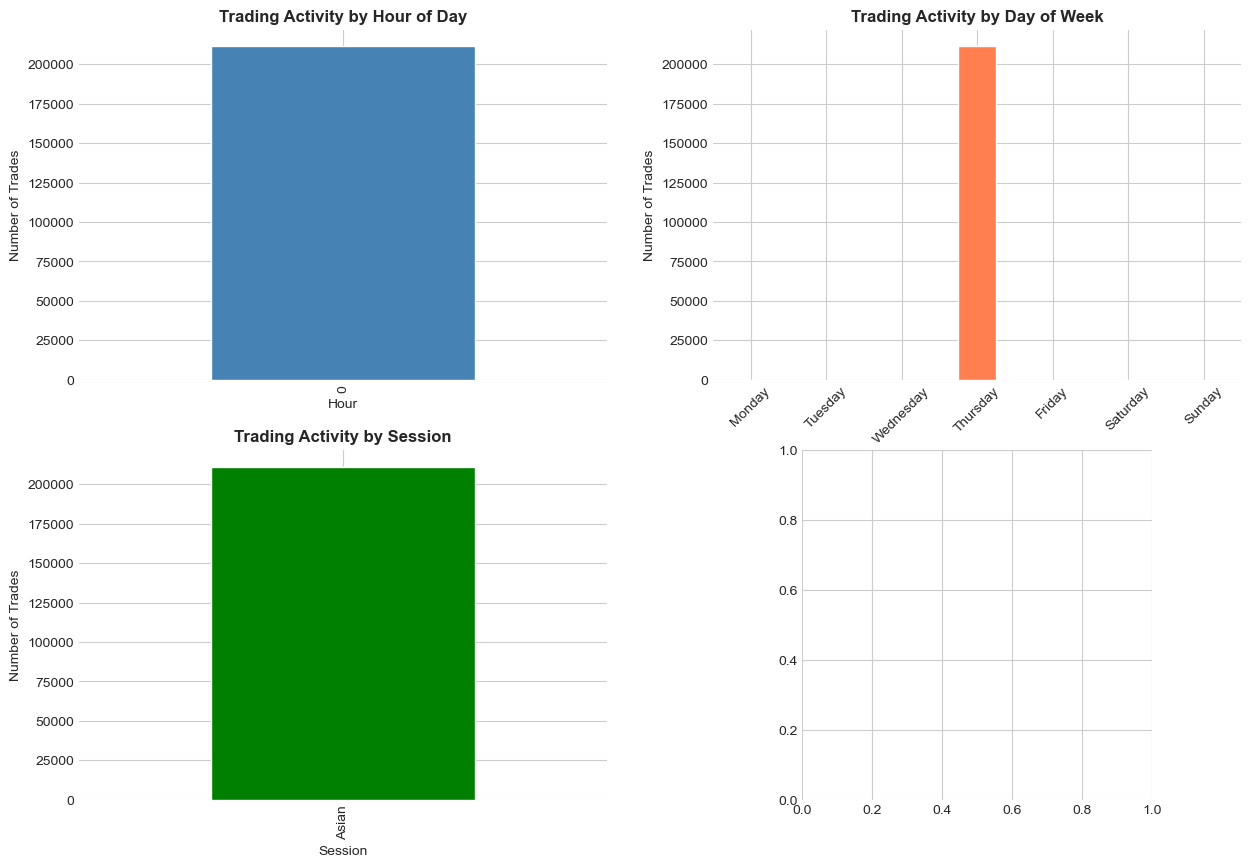

In [38]:
"""
PHASE 2: FEATURE ENGINEERING
Bitcoin Market Sentiment and Trader Performance Analysis

This module performs comprehensive feature engineering on:
1. Bitcoin Market Sentiment Dataset
2. Historical Trader Data from Hyperliquid

Author: Data Science Team
Date: 2024
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("PHASE 2: FEATURE ENGINEERING")
print("="*80)

# ============================================================================
# 1. DATA LOADING
# ============================================================================

def load_datasets():
    """Load and perform initial preprocessing of datasets."""
    print("\n[1/6] Loading datasets...")
    
    # Load sentiment data
    sentiment_df = pd.read_csv('fear_greed_index.csv')
    print(f"✓ Sentiment data loaded: {sentiment_df.shape}")
    
    # Load trader data
    trader_df = pd.read_csv('historical_data.csv')
    print(f"✓ Trader data loaded: {trader_df.shape}")
    
    return sentiment_df, trader_df


def preprocess_datasets(sentiment_df, trader_df):
    """Preprocess datasets for feature engineering."""
    print("\n[2/6] Preprocessing datasets...")
    
    # Sentiment data preprocessing
    sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'])
    sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
    sentiment_df = sentiment_df.sort_values('timestamp').reset_index(drop=True)
    
    # Trader data preprocessing
    # Handle multiple timestamp columns
    if 'Timestamp' in trader_df.columns:
        trader_df['timestamp'] = pd.to_datetime(trader_df['Timestamp'])
    elif 'Timestamp IST' in trader_df.columns:
        trader_df['timestamp'] = pd.to_datetime(trader_df['Timestamp IST'])
    
    trader_df = trader_df.sort_values('timestamp').reset_index(drop=True)
    
    # Convert numeric columns
    numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee']
    for col in numeric_cols:
        if col in trader_df.columns:
            trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce')
    
    print(f"✓ Preprocessing complete")
    print(f"  Sentiment date range: {sentiment_df['date'].min()} to {sentiment_df['date'].max()}")
    print(f"  Trader date range: {trader_df['timestamp'].min()} to {trader_df['timestamp'].max()}")
    
    return sentiment_df, trader_df


# ============================================================================
# 2. TEMPORAL FEATURES (Section 2.1)
# ============================================================================

def create_temporal_features(df, timestamp_col='timestamp'):
    """
    Create comprehensive temporal features from timestamp.
    
    Features:
    - Hour, Day, Week, Month, Quarter, Year
    - Day of week
    - Weekend vs Weekday flag
    - Trading session
    - Time since previous trade (for trader data)
    """
    print("\n[3/6] Creating temporal features...")
    
    df = df.copy()
    ts = df[timestamp_col]
    
    # Basic temporal components
    df['hour'] = ts.dt.hour
    df['day'] = ts.dt.day
    df['week'] = ts.dt.isocalendar().week
    df['month'] = ts.dt.month
    df['quarter'] = ts.dt.quarter
    df['year'] = ts.dt.year
    
    # Day of week (0=Monday, 6=Sunday)
    df['day_of_week'] = ts.dt.dayofweek
    df['day_name'] = ts.dt.day_name()
    
    # Weekend flag
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['is_weekday'] = (df['day_of_week'] < 5).astype(int)
    
    # Trading sessions based on UTC hours
    # Asian: 0-8, European: 8-16, American: 16-24
    def get_trading_session(hour):
        if 0 <= hour < 8:
            return 'Asian'
        elif 8 <= hour < 16:
            return 'European'
        else:
            return 'American'
    
    df['trading_session'] = df['hour'].apply(get_trading_session)
    
    # One-hot encode trading sessions
    df['session_asian'] = (df['trading_session'] == 'Asian').astype(int)
    df['session_european'] = (df['trading_session'] == 'European').astype(int)
    df['session_american'] = (df['trading_session'] == 'American').astype(int)
    
    print(f"✓ Created {14} temporal features")
    
    return df


def create_time_since_previous_trade(df, account_col='Account'):
    """Calculate time since previous trade for each account."""
    df = df.copy()
    
    if account_col in df.columns:
        # Sort by account and timestamp
        df = df.sort_values([account_col, 'timestamp'])
        
        # Calculate time difference within each account
        df['time_since_prev_trade_seconds'] = df.groupby(account_col)['timestamp'].diff().dt.total_seconds()
        df['time_since_prev_trade_minutes'] = df['time_since_prev_trade_seconds'] / 60
        df['time_since_prev_trade_hours'] = df['time_since_prev_trade_minutes'] / 60
        df['time_since_prev_trade_days'] = df['time_since_prev_trade_hours'] / 24
        
        print(f"✓ Created time-since-previous-trade features")
    
    return df


# ============================================================================
# 3. TRADER BEHAVIOR METRICS (Section 2.2)
# ============================================================================

def calculate_profitability_metrics(trader_df):
    """
    Calculate profitability metrics per account.
    
    Metrics:
    - Total PnL
    - Win Rate
    - Average Profit per Trade
    - Profit Factor
    - Cumulative PnL
    - Maximum Drawdown
    - Sharpe Ratio
    - ROI
    """
    print("\n[4/6] Calculating trader behavior metrics...")
    print("  → Profitability metrics...")
    
    metrics_list = []
    
    for account in trader_df['Account'].unique():
        account_df = trader_df[trader_df['Account'] == account].copy()
        account_df = account_df.sort_values('timestamp')
        
        metrics = {'Account': account}
        
        # Total PnL
        metrics['total_pnl'] = account_df['Closed PnL'].sum()
        
        # Win Rate
        profitable_trades = (account_df['Closed PnL'] > 0).sum()
        total_trades = len(account_df)
        metrics['win_rate'] = (profitable_trades / total_trades * 100) if total_trades > 0 else 0
        
        # Average Profit per Trade
        metrics['avg_profit_per_trade'] = account_df['Closed PnL'].mean()
        
        # Profit Factor (Gross Profit / Gross Loss)
        gross_profit = account_df[account_df['Closed PnL'] > 0]['Closed PnL'].sum()
        gross_loss = abs(account_df[account_df['Closed PnL'] < 0]['Closed PnL'].sum())
        metrics['profit_factor'] = (gross_profit / gross_loss) if gross_loss > 0 else np.inf
        metrics['gross_profit'] = gross_profit
        metrics['gross_loss'] = gross_loss
        
        # Cumulative PnL (we'll add this to the main dataframe later)
        account_df['cumulative_pnl'] = account_df['Closed PnL'].cumsum()
        
        # Maximum Drawdown
        cumulative_max = account_df['cumulative_pnl'].cummax()
        drawdown = account_df['cumulative_pnl'] - cumulative_max
        metrics['max_drawdown'] = drawdown.min()
        metrics['max_drawdown_pct'] = (drawdown.min() / cumulative_max.max() * 100) if cumulative_max.max() > 0 else 0
        
        # Sharpe Ratio (annualized)
        returns = account_df['Closed PnL']
        if len(returns) > 1 and returns.std() > 0:
            # Assuming daily trading frequency
            metrics['sharpe_ratio'] = (returns.mean() / returns.std()) * np.sqrt(252)
        else:
            metrics['sharpe_ratio'] = 0
        
        # ROI (Return on Investment)
        # Calculate based on cumulative volume traded
        total_volume = account_df['Size USD'].sum()
        metrics['roi_pct'] = (metrics['total_pnl'] / total_volume * 100) if total_volume > 0 else 0
        
        metrics_list.append(metrics)
    
    profitability_metrics = pd.DataFrame(metrics_list)
    print(f"✓ Created profitability metrics for {len(profitability_metrics)} accounts")
    
    return profitability_metrics


def calculate_risk_metrics(trader_df):
    """
    Calculate risk metrics per account.
    
    Metrics:
    - Trade Size Volatility
    - Average Trade Size
    - Max Single Trade Size
    - Position Concentration
    - Risk-Reward Ratio
    - Maximum consecutive losses
    """
    print("  → Risk metrics...")
    
    metrics_list = []
    
    for account in trader_df['Account'].unique():
        account_df = trader_df[trader_df['Account'] == account].copy()
        account_df = account_df.sort_values('timestamp')
        
        metrics = {'Account': account}
        
        # Trade Size Volatility
        metrics['trade_size_volatility'] = account_df['Size USD'].std()
        
        # Average Trade Size
        metrics['avg_trade_size_usd'] = account_df['Size USD'].mean()
        metrics['median_trade_size_usd'] = account_df['Size USD'].median()
        
        # Max Single Trade Size
        metrics['max_trade_size_usd'] = account_df['Size USD'].max()
        
        # Position Concentration (max trade as % of total volume)
        total_volume = account_df['Size USD'].sum()
        metrics['position_concentration_pct'] = (metrics['max_trade_size_usd'] / total_volume * 100) if total_volume > 0 else 0
        
        # Risk-Reward Ratio
        avg_win = account_df[account_df['Closed PnL'] > 0]['Closed PnL'].mean()
        avg_loss = abs(account_df[account_df['Closed PnL'] < 0]['Closed PnL'].mean())
        metrics['risk_reward_ratio'] = (avg_win / avg_loss) if avg_loss > 0 else 0
        metrics['avg_win'] = avg_win if not pd.isna(avg_win) else 0
        metrics['avg_loss'] = avg_loss if not pd.isna(avg_loss) else 0
        
        # Maximum consecutive losses
        is_loss = (account_df['Closed PnL'] < 0).astype(int)
        consecutive_losses = []
        current_streak = 0
        
        for loss in is_loss:
            if loss == 1:
                current_streak += 1
            else:
                if current_streak > 0:
                    consecutive_losses.append(current_streak)
                current_streak = 0
        
        if current_streak > 0:
            consecutive_losses.append(current_streak)
        
        metrics['max_consecutive_losses'] = max(consecutive_losses) if consecutive_losses else 0
        
        # Similarly for wins
        is_win = (account_df['Closed PnL'] > 0).astype(int)
        consecutive_wins = []
        current_streak = 0
        
        for win in is_win:
            if win == 1:
                current_streak += 1
            else:
                if current_streak > 0:
                    consecutive_wins.append(current_streak)
                current_streak = 0
        
        if current_streak > 0:
            consecutive_wins.append(current_streak)
        
        metrics['max_consecutive_wins'] = max(consecutive_wins) if consecutive_wins else 0
        
        metrics_list.append(metrics)
    
    risk_metrics = pd.DataFrame(metrics_list)
    print(f"✓ Created risk metrics for {len(risk_metrics)} accounts")
    
    return risk_metrics


def calculate_volume_activity_metrics(trader_df):
    """
    Calculate volume and activity metrics per account.
    
    Metrics:
    - Total number of trades
    - Trading frequency
    - Average holding time
    - Total volume traded
    - Active trading days
    - Trades per session
    """
    print("  → Volume/Activity metrics...")
    
    metrics_list = []
    
    for account in trader_df['Account'].unique():
        account_df = trader_df[trader_df['Account'] == account].copy()
        account_df = account_df.sort_values('timestamp')
        
        metrics = {'Account': account}
        
        # Total number of trades
        metrics['total_trades'] = len(account_df)
        
        # Trading frequency
        date_range = (account_df['timestamp'].max() - account_df['timestamp'].min()).days
        metrics['trading_period_days'] = date_range if date_range > 0 else 1
        metrics['trades_per_day'] = metrics['total_trades'] / metrics['trading_period_days']
        metrics['trades_per_week'] = metrics['trades_per_day'] * 7
        
        # Active trading days
        metrics['active_trading_days'] = account_df['timestamp'].dt.date.nunique()
        
        # Average holding time (estimated as time between consecutive trades)
        if len(account_df) > 1:
            time_diffs = account_df['timestamp'].diff().dt.total_seconds() / 3600  # in hours
            metrics['avg_holding_time_hours'] = time_diffs.mean()
            metrics['median_holding_time_hours'] = time_diffs.median()
        else:
            metrics['avg_holding_time_hours'] = 0
            metrics['median_holding_time_hours'] = 0
        
        # Total volume traded
        metrics['total_volume_usd'] = account_df['Size USD'].sum()
        metrics['total_volume_tokens'] = account_df['Size Tokens'].sum()
        
        # Trades per session
        if 'trading_session' in account_df.columns:
            session_counts = account_df['trading_session'].value_counts()
            metrics['trades_asian_session'] = session_counts.get('Asian', 0)
            metrics['trades_european_session'] = session_counts.get('European', 0)
            metrics['trades_american_session'] = session_counts.get('American', 0)
            
            # Preferred session
            metrics['preferred_session'] = session_counts.idxmax() if len(session_counts) > 0 else 'Unknown'
        
        # Trading intensity (trades per active day)
        metrics['trading_intensity'] = metrics['total_trades'] / metrics['active_trading_days'] if metrics['active_trading_days'] > 0 else 0
        
        metrics_list.append(metrics)
    
    volume_metrics = pd.DataFrame(metrics_list)
    print(f"✓ Created volume/activity metrics for {len(volume_metrics)} accounts")
    
    return volume_metrics


def calculate_leverage_indicators(trader_df):
    """
    Calculate leverage indicators per account.
    
    Metrics:
    - Average position size
    - Position size relative to baseline
    - Aggressive sizing events
    """
    print("  → Leverage indicators...")
    
    metrics_list = []
    
    for account in trader_df['Account'].unique():
        account_df = trader_df[trader_df['Account'] == account].copy()
        
        metrics = {'Account': account}
        
        # Average position size
        metrics['avg_position_size_usd'] = account_df['Size USD'].mean()
        
        # Position size relative to account baseline (using median as baseline)
        baseline = account_df['Size USD'].median()
        metrics['position_size_baseline'] = baseline
        
        # Position size variability
        metrics['position_size_cv'] = (account_df['Size USD'].std() / metrics['avg_position_size_usd']) if metrics['avg_position_size_usd'] > 0 else 0
        
        # Aggressive sizing events (trades > 2x average size)
        avg_size = metrics['avg_position_size_usd']
        aggressive_trades = (account_df['Size USD'] > 2 * avg_size).sum()
        metrics['aggressive_sizing_events'] = aggressive_trades
        metrics['aggressive_sizing_pct'] = (aggressive_trades / len(account_df) * 100) if len(account_df) > 0 else 0
        
        # Very aggressive events (> 3x average)
        very_aggressive = (account_df['Size USD'] > 3 * avg_size).sum()
        metrics['very_aggressive_sizing_events'] = very_aggressive
        
        metrics_list.append(metrics)
    
    leverage_metrics = pd.DataFrame(metrics_list)
    print(f"✓ Created leverage indicators for {len(leverage_metrics)} accounts")
    
    return leverage_metrics


def calculate_direction_bias(trader_df):
    """
    Calculate directional bias metrics per account.
    
    Metrics:
    - Buy vs Sell ratio
    - Directional consistency score
    """
    print("  → Direction bias metrics...")
    
    metrics_list = []
    
    for account in trader_df['Account'].unique():
        account_df = trader_df[trader_df['Account'] == account].copy()
        
        metrics = {'Account': account}
        
        # Buy vs Sell count
        if 'Side' in account_df.columns:
            side_counts = account_df['Side'].value_counts()
            buy_count = side_counts.get('BUY', 0) + side_counts.get('Buy', 0) + side_counts.get('buy', 0)
            sell_count = side_counts.get('SELL', 0) + side_counts.get('Sell', 0) + side_counts.get('sell', 0)
        elif 'Direction' in account_df.columns:
            dir_counts = account_df['Direction'].value_counts()
            buy_count = dir_counts.get('LONG', 0) + dir_counts.get('Long', 0) + dir_counts.get('long', 0)
            sell_count = dir_counts.get('SHORT', 0) + dir_counts.get('Short', 0) + dir_counts.get('short', 0)
        else:
            buy_count = 0
            sell_count = 0
        
        total_directional = buy_count + sell_count
        
        metrics['buy_count'] = buy_count
        metrics['sell_count'] = sell_count
        metrics['buy_sell_ratio'] = (buy_count / sell_count) if sell_count > 0 else np.inf
        
        # Directional percentages
        metrics['buy_pct'] = (buy_count / total_directional * 100) if total_directional > 0 else 0
        metrics['sell_pct'] = (sell_count / total_directional * 100) if total_directional > 0 else 0
        
        # Directional consistency score (how much they favor one direction)
        # Score from 0 (perfectly balanced) to 100 (all one direction)
        if total_directional > 0:
            balance = min(buy_count, sell_count) / total_directional
            metrics['directional_consistency_score'] = (1 - balance) * 100
        else:
            metrics['directional_consistency_score'] = 0
        
        # Dominant direction
        if buy_count > sell_count:
            metrics['dominant_direction'] = 'BUY'
        elif sell_count > buy_count:
            metrics['dominant_direction'] = 'SELL'
        else:
            metrics['dominant_direction'] = 'BALANCED'
        
        metrics_list.append(metrics)
    
    direction_metrics = pd.DataFrame(metrics_list)
    print(f"✓ Created direction bias metrics for {len(direction_metrics)} accounts")
    
    return direction_metrics


def add_cumulative_features(trader_df):
    """Add cumulative features to the trader dataframe."""
    print("  → Adding cumulative features...")
    
    trader_df = trader_df.sort_values(['Account', 'timestamp']).copy()
    
    # Cumulative PnL per account
    trader_df['cumulative_pnl'] = trader_df.groupby('Account')['Closed PnL'].cumsum()
    
    # Cumulative volume per account
    trader_df['cumulative_volume_usd'] = trader_df.groupby('Account')['Size USD'].cumsum()
    
    # Trade number (sequence) per account
    trader_df['trade_number'] = trader_df.groupby('Account').cumcount() + 1
    
    # Rolling metrics (last 10 trades)
    trader_df['rolling_avg_pnl_10'] = trader_df.groupby('Account')['Closed PnL'].rolling(10, min_periods=1).mean().reset_index(0, drop=True)
    trader_df['rolling_win_rate_10'] = trader_df.groupby('Account')['Closed PnL'].rolling(10, min_periods=1).apply(lambda x: (x > 0).sum() / len(x) * 100).reset_index(0, drop=True)
    
    # Rolling metrics (last 30 trades)
    trader_df['rolling_avg_pnl_30'] = trader_df.groupby('Account')['Closed PnL'].rolling(30, min_periods=1).mean().reset_index(0, drop=True)
    trader_df['rolling_win_rate_30'] = trader_df.groupby('Account')['Closed PnL'].rolling(30, min_periods=1).apply(lambda x: (x > 0).sum() / len(x) * 100).reset_index(0, drop=True)
    
    print(f"✓ Added 8 cumulative features")
    
    return trader_df


# ============================================================================
# 4. MARKET SENTIMENT FEATURES (Section 2.3)
# ============================================================================

def create_sentiment_features(sentiment_df):
    """
    Create comprehensive sentiment features.
    
    Features:
    - Fear/Greed Index value
    - Sentiment category
    - Sentiment momentum
    - Rolling averages
    - Sentiment regime
    - Sentiment volatility
    - Time in sentiment zones
    """
    print("\n[5/6] Creating market sentiment features...")
    
    sentiment_df = sentiment_df.sort_values('date').copy()
    
    # Fear/Greed Index value (already exists as 'value')
    sentiment_df['sentiment_value'] = sentiment_df['value']
    
    # Sentiment category mapping
    def categorize_sentiment(value):
        if value <= 25:
            return 'Extreme Fear'
        elif value <= 45:
            return 'Fear'
        elif value <= 55:
            return 'Neutral'
        elif value <= 75:
            return 'Greed'
        else:
            return 'Extreme Greed'
    
    # Use classification if available, otherwise derive from value
    if 'classification' in sentiment_df.columns:
        sentiment_df['sentiment_category'] = sentiment_df['classification']
    else:
        sentiment_df['sentiment_category'] = sentiment_df['value'].apply(categorize_sentiment)
    
    # Sentiment momentum (change from previous day)
    sentiment_df['sentiment_momentum_1d'] = sentiment_df['value'].diff()
    sentiment_df['sentiment_momentum_3d'] = sentiment_df['value'].diff(3)
    sentiment_df['sentiment_momentum_7d'] = sentiment_df['value'].diff(7)
    
    # Sentiment change rate (percentage)
    sentiment_df['sentiment_change_pct_1d'] = sentiment_df['value'].pct_change() * 100
    
    # Rolling average sentiment
    sentiment_df['sentiment_ma_7'] = sentiment_df['value'].rolling(7, min_periods=1).mean()
    sentiment_df['sentiment_ma_14'] = sentiment_df['value'].rolling(14, min_periods=1).mean()
    sentiment_df['sentiment_ma_30'] = sentiment_df['value'].rolling(30, min_periods=1).mean()
    
    # Sentiment deviation from moving averages
    sentiment_df['sentiment_dev_from_ma7'] = sentiment_df['value'] - sentiment_df['sentiment_ma_7']
    sentiment_df['sentiment_dev_from_ma30'] = sentiment_df['value'] - sentiment_df['sentiment_ma_30']
    
    # Sentiment volatility (rolling standard deviation)
    sentiment_df['sentiment_volatility_7d'] = sentiment_df['value'].rolling(7, min_periods=1).std()
    sentiment_df['sentiment_volatility_14d'] = sentiment_df['value'].rolling(14, min_periods=1).std()
    sentiment_df['sentiment_volatility_30d'] = sentiment_df['value'].rolling(30, min_periods=1).std()
    
    # Sentiment regime (extended periods in zones)
    # Count consecutive days in each sentiment zone
    sentiment_df['is_extreme_fear'] = (sentiment_df['value'] <= 25).astype(int)
    sentiment_df['is_fear'] = ((sentiment_df['value'] > 25) & (sentiment_df['value'] <= 45)).astype(int)
    sentiment_df['is_neutral'] = ((sentiment_df['value'] > 45) & (sentiment_df['value'] <= 55)).astype(int)
    sentiment_df['is_greed'] = ((sentiment_df['value'] > 55) & (sentiment_df['value'] <= 75)).astype(int)
    sentiment_df['is_extreme_greed'] = (sentiment_df['value'] > 75).astype(int)
    
    # Calculate regime duration (consecutive days in same category)
    sentiment_df['regime_change'] = (sentiment_df['sentiment_category'] != sentiment_df['sentiment_category'].shift()).astype(int)
    sentiment_df['regime_id'] = sentiment_df['regime_change'].cumsum()
    sentiment_df['regime_duration'] = sentiment_df.groupby('regime_id').cumcount() + 1
    
    # Sentiment extremity (distance from neutral 50)
    sentiment_df['sentiment_extremity'] = abs(sentiment_df['value'] - 50)
    
    # Sentiment zone encoding
    sentiment_zone_dummies = pd.get_dummies(sentiment_df['sentiment_category'], prefix='sentiment')
    sentiment_df = pd.concat([sentiment_df, sentiment_zone_dummies], axis=1)
    
    # Calculate time spent in each zone (rolling 30 days)
    for zone in ['is_extreme_fear', 'is_fear', 'is_neutral', 'is_greed', 'is_extreme_greed']:
        sentiment_df[f'time_in_{zone}_30d'] = sentiment_df[zone].rolling(30, min_periods=1).sum()
    
    print(f"✓ Created {len([col for col in sentiment_df.columns if col not in ['timestamp', 'value', 'classification', 'date']])} sentiment features")
    
    return sentiment_df


# ============================================================================
# 5. MERGED DATASET FEATURES (Section 2.4)
# ============================================================================

def merge_trader_sentiment_data(trader_df, sentiment_df):
    """
    Merge trader data with sentiment data and create combined features.
    
    Features:
    - Sentiment at trade entry
    - Sentiment change during holding period
    - Cumulative sentiment exposure
    """
    print("\n[6/6] Merging datasets and creating combined features...")
    
    # Create date column in trader_df for merging
    trader_df['trade_date'] = trader_df['timestamp'].dt.date
    sentiment_df['date_key'] = sentiment_df['date'].dt.date
    
    # Merge on date
    merged_df = trader_df.merge(
        sentiment_df,
        left_on='trade_date',
        right_on='date_key',
        how='left',
        suffixes=('', '_sentiment')
    )
    
    print(f"✓ Initial merge complete: {len(merged_df)} rows")
    
    # Sentiment at trade entry
    merged_df['sentiment_at_entry'] = merged_df['sentiment_value']
    merged_df['sentiment_category_at_entry'] = merged_df['sentiment_category']
    
    # Calculate sentiment change during trade (if we can estimate trade duration)
    # We'll use account-level grouping to estimate
    merged_df = merged_df.sort_values(['Account', 'timestamp']).reset_index(drop=True)
    
    # For each trade, get the sentiment at next trade (approximation of exit)
    merged_df['sentiment_at_next_trade'] = merged_df.groupby('Account')['sentiment_at_entry'].shift(-1)
    merged_df['sentiment_change_during_trade'] = merged_df['sentiment_at_next_trade'] - merged_df['sentiment_at_entry']
    
    # Cumulative sentiment exposure per trader
    merged_df['cumulative_sentiment_exposure'] = merged_df.groupby('Account')['sentiment_at_entry'].cumsum()
    merged_df['avg_sentiment_exposure'] = merged_df.groupby('Account')['sentiment_at_entry'].expanding().mean().reset_index(0, drop=True)
    
    # Trade performance in different sentiment regimes
    merged_df['trade_in_extreme_fear'] = (merged_df['sentiment_at_entry'] <= 25).astype(int)
    merged_df['trade_in_fear'] = ((merged_df['sentiment_at_entry'] > 25) & (merged_df['sentiment_at_entry'] <= 45)).astype(int)
    merged_df['trade_in_neutral'] = ((merged_df['sentiment_at_entry'] > 45) & (merged_df['sentiment_at_entry'] <= 55)).astype(int)
    merged_df['trade_in_greed'] = ((merged_df['sentiment_at_entry'] > 55) & (merged_df['sentiment_at_entry'] <= 75)).astype(int)
    merged_df['trade_in_extreme_greed'] = (merged_df['sentiment_at_entry'] > 75).astype(int)
    
    # Sentiment momentum at trade entry
    merged_df['sentiment_momentum_at_entry'] = merged_df['sentiment_momentum_1d']
    merged_df['sentiment_volatility_at_entry'] = merged_df['sentiment_volatility_7d']
    
    print(f"✓ Created combined features")
    print(f"✓ Final merged dataset: {merged_df.shape}")
    
    return merged_df


# ============================================================================
# 6. MAIN EXECUTION
# ============================================================================

def main():
    """Main execution function."""
    
    # Load datasets
    sentiment_df, trader_df = load_datasets()
    
    # Preprocess
    sentiment_df, trader_df = preprocess_datasets(sentiment_df, trader_df)
    
    # Create temporal features
    trader_df = create_temporal_features(trader_df, 'timestamp')
    trader_df = create_time_since_previous_trade(trader_df, 'Account')
    sentiment_df = create_temporal_features(sentiment_df, 'timestamp')
    
    # Calculate trader behavior metrics
    profitability_metrics = calculate_profitability_metrics(trader_df)
    risk_metrics = calculate_risk_metrics(trader_df)
    volume_metrics = calculate_volume_activity_metrics(trader_df)
    leverage_metrics = calculate_leverage_indicators(trader_df)
    direction_metrics = calculate_direction_bias(trader_df)
    
    # Merge all account-level metrics
    account_metrics = profitability_metrics.merge(risk_metrics, on='Account', how='outer')
    account_metrics = account_metrics.merge(volume_metrics, on='Account', how='outer')
    account_metrics = account_metrics.merge(leverage_metrics, on='Account', how='outer')
    account_metrics = account_metrics.merge(direction_metrics, on='Account', how='outer')
    
    # Add cumulative features to trader dataframe
    trader_df = add_cumulative_features(trader_df)
    
    # Create sentiment features
    sentiment_df = create_sentiment_features(sentiment_df)
    
    # Merge trader and sentiment data
    merged_df = merge_trader_sentiment_data(trader_df, sentiment_df)
    
    # Add account-level metrics to merged dataframe
    merged_df = merged_df.merge(account_metrics, on='Account', how='left')
    
    # Save engineered datasets
    print("\n" + "="*80)
    print("SAVING ENGINEERED DATASETS")
    print("="*80)
    
    trader_df.to_csv('trader_data_engineered.csv', index=False)
    print(f"✓ Saved: trader_data_engineered.csv ({trader_df.shape})")
    
    sentiment_df.to_csv('sentiment_data_engineered.csv', index=False)
    print(f"✓ Saved: sentiment_data_engineered.csv ({sentiment_df.shape})")
    
    account_metrics.to_csv('account_metrics.csv', index=False)
    print(f"✓ Saved: account_metrics.csv ({account_metrics.shape})")
    
    merged_df.to_csv('merged_trader_sentiment.csv', index=False)
    print(f"✓ Saved: merged_trader_sentiment.csv ({merged_df.shape})")
    
    # Generate summary statistics
    print("\n" + "="*80)
    print("FEATURE ENGINEERING SUMMARY")
    print("="*80)
    
    print(f"\n📊 TRADER DATA FEATURES:")
    print(f"   Total columns: {len(trader_df.columns)}")
    print(f"   Total rows: {len(trader_df)}")
    print(f"   Unique accounts: {trader_df['Account'].nunique()}")
    
    print(f"\n📊 SENTIMENT DATA FEATURES:")
    print(f"   Total columns: {len(sentiment_df.columns)}")
    print(f"   Total rows: {len(sentiment_df)}")
    print(f"   Date range: {sentiment_df['date'].min()} to {sentiment_df['date'].max()}")
    
    print(f"\n📊 ACCOUNT METRICS:")
    print(f"   Total metrics per account: {len(account_metrics.columns) - 1}")
    print(f"   Total accounts: {len(account_metrics)}")
    
    print(f"\n📊 MERGED DATASET:")
    print(f"   Total columns: {len(merged_df.columns)}")
    print(f"   Total rows: {len(merged_df)}")
    
    return trader_df, sentiment_df, account_metrics, merged_df


# ============================================================================
# 7. VISUALIZATIONS
# ============================================================================

def create_feature_visualizations(trader_df, sentiment_df, account_metrics, merged_df):
    """Create visualizations to validate and explore engineered features."""
    
    print("\n" + "="*80)
    print("CREATING FEATURE VISUALIZATIONS")
    print("="*80)
    
    # Create output directory for plots
    import os
    os.makedirs('feature_engineering_plots', exist_ok=True)
    
    # 1. Temporal Feature Distribution
    print("\n[1/8] Trading activity by time...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Trades by hour
    trader_df['hour'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='steelblue')
    axes[0, 0].set_title('Trading Activity by Hour of Day', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Hour')
    axes[0, 0].set_ylabel('Number of Trades')
    
    # Trades by day of week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = trader_df['day_name'].value_counts()
    day_counts = day_counts.reindex(day_order, fill_value=0)
    day_counts.plot(kind='bar', ax=axes[0, 1], color='coral')
    axes[0, 1].set_title('Trading Activity by Day of Week', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Day')
    axes[0, 1].set_ylabel('Number of Trades')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Trades by session
    if 'trading_session' in trader_df.columns:
        trader_df['trading_session'].value_counts().plot(kind='bar', ax=axes[1, 0], color='green')
        axes[1, 0].set_title('Trading Activity by Session', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel('Session')
        axes[1, 0].set_ylabel('Number of Trades')
    
    # Weekend vs Weekday
    weekend_data = trader_df['is_weekend'].value_counts()
    axes[1, 1].pie(weekend_data, labels=[0, 1], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    axes[1, 1].set_title('Weekend vs Weekday Trading', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('feature_engineering_plots/01_temporal_features.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("   ✓ Saved: 01_temporal_features.png")
    
    # 2. Profitability Metrics Distribution
    print("[2/8] Profitability metrics distribution...")
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    metrics_to_plot = [
        ('total_pnl', 'Total PnL Distribution'),
        ('win_rate', 'Win Rate Distribution (%)'),
        ('avg_profit_per_trade', 'Avg Profit per Trade'),
        ('profit_factor', 'Profit Factor Distribution'),
        ('max_drawdown', 'Maximum Drawdown'),
        ('sharpe_ratio', 'Sharpe Ratio Distribution')
    ]
    
    for idx, (metric, title) in enumerate(metrics_to_plot):
        row = idx // 3
        col = idx % 3
        
        if metric in account_metrics.columns:
            data = account_metrics[metric].replace([np.inf, -np.inf], np.nan).dropna()
            if len(data) > 0:
                axes[row, col].hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
                axes[row, col].set_title(title, fontsize=11, fontweight='bold')
                axes[row, col].set_xlabel(metric)
                axes[row, col].set_ylabel('Frequency')
                axes[row, col].axvline(data.median(), color='red', linestyle='--', linewidth=2, label=f'Median: {data.median():.2f}')
                axes[row, col].legend()
    
    plt.tight_layout()
    plt.savefig('feature_engineering_plots/02_profitability_metrics.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("   ✓ Saved: 02_profitability_metrics.png")
    
    # 3. Risk Metrics
    print("[3/8] Risk metrics visualization...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Trade size distribution
    if 'avg_trade_size_usd' in account_metrics.columns:
        data = account_metrics['avg_trade_size_usd'].dropna()
        axes[0, 0].hist(data, bins=30, color='orange', edgecolor='black', alpha=0.7)
        axes[0, 0].set_title('Average Trade Size Distribution', fontsize=12, fontweight='bold')
        axes[0, 0].set_xlabel('Avg Trade Size (USD)')
        axes[0, 0].set_ylabel('Frequency')
    
    # Risk-reward ratio
    if 'risk_reward_ratio' in account_metrics.columns:
        data = account_metrics['risk_reward_ratio'].replace([np.inf, -np.inf], np.nan).dropna()
        data = data[data <= 10]  # Filter outliers
        axes[0, 1].hist(data, bins=30, color='purple', edgecolor='black', alpha=0.7)
        axes[0, 1].set_title('Risk-Reward Ratio Distribution', fontsize=12, fontweight='bold')
        axes[0, 1].set_xlabel('Risk-Reward Ratio')
        axes[0, 1].set_ylabel('Frequency')
    
    # Max consecutive losses
    if 'max_consecutive_losses' in account_metrics.columns:
        data = account_metrics['max_consecutive_losses'].dropna()
        axes[1, 0].hist(data, bins=20, color='red', edgecolor='black', alpha=0.7)
        axes[1, 0].set_title('Maximum Consecutive Losses', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel('Consecutive Losses')
        axes[1, 0].set_ylabel('Frequency')
    
    # Position concentration
    if 'position_concentration_pct' in account_metrics.columns:
        data = account_metrics['position_concentration_pct'].dropna()
        axes[1, 1].hist(data, bins=30, color='teal', edgecolor='black', alpha=0.7)
        axes[1, 1].set_title('Position Concentration %', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Concentration %')
        axes[1, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('feature_engineering_plots/03_risk_metrics.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("   ✓ Saved: 03_risk_metrics.png")
    
    # 4. Trading Activity Patterns
    print("[4/8] Trading activity patterns...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Total trades distribution
    if 'total_trades' in account_metrics.columns:
        data = account_metrics['total_trades'].dropna()
        axes[0, 0].hist(data, bins=30, color='green', edgecolor='black', alpha=0.7)
        axes[0, 0].set_title('Total Trades per Account', fontsize=12, fontweight='bold')
        axes[0, 0].set_xlabel('Number of Trades')
        axes[0, 0].set_ylabel('Frequency')
    
    # Trading frequency
    if 'trades_per_day' in account_metrics.columns:
        data = account_metrics['trades_per_day'].dropna()
        data = data[data <= data.quantile(0.95)]  # Remove outliers
        axes[0, 1].hist(data, bins=30, color='blue', edgecolor='black', alpha=0.7)
        axes[0, 1].set_title('Trading Frequency (Trades/Day)', fontsize=12, fontweight='bold')
        axes[0, 1].set_xlabel('Trades per Day')
        axes[0, 1].set_ylabel('Frequency')
    
    # Trading intensity
    if 'trading_intensity' in account_metrics.columns:
        data = account_metrics['trading_intensity'].dropna()
        data = data[data <= data.quantile(0.95)]
        axes[1, 0].hist(data, bins=30, color='purple', edgecolor='black', alpha=0.7)
        axes[1, 0].set_title('Trading Intensity (Trades/Active Day)', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel('Intensity')
        axes[1, 0].set_ylabel('Frequency')
    
    # Total volume
    if 'total_volume_usd' in account_metrics.columns:
        data = account_metrics['total_volume_usd'].dropna()
        axes[1, 1].hist(data, bins=30, color='orange', edgecolor='black', alpha=0.7)
        axes[1, 1].set_title('Total Volume Traded (USD)', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Volume (USD)')
        axes[1, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('feature_engineering_plots/04_activity_patterns.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("   ✓ Saved: 04_activity_patterns.png")
    
    # 5. Direction Bias
    print("[5/8] Direction bias analysis...")
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Buy vs Sell ratio
    if 'dominant_direction' in account_metrics.columns:
        direction_counts = account_metrics['dominant_direction'].value_counts()
        axes[0].pie(direction_counts, labels=direction_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightyellow'])
        axes[0].set_title('Dominant Trading Direction', fontsize=12, fontweight='bold')
    
    # Directional consistency
    if 'directional_consistency_score' in account_metrics.columns:
        data = account_metrics['directional_consistency_score'].dropna()
        axes[1].hist(data, bins=30, color='teal', edgecolor='black', alpha=0.7)
        axes[1].set_title('Directional Consistency Score', fontsize=12, fontweight='bold')
        axes[1].set_xlabel('Consistency Score')
        axes[1].set_ylabel('Frequency')
        axes[1].axvline(50, color='red', linestyle='--', linewidth=2, label='Balanced (50)')
        axes[1].legend()
    
    plt.tight_layout()
    plt.savefig('feature_engineering_plots/05_direction_bias.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("   ✓ Saved: 05_direction_bias.png")
    
    # 6. Sentiment Features
    print("[6/8] Sentiment features visualization...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Sentiment value over time
    sentiment_plot_df = sentiment_df.sort_values('date').tail(365)  # Last year
    axes[0, 0].plot(sentiment_plot_df['date'], sentiment_plot_df['value'], linewidth=1, color='blue', alpha=0.6)
    axes[0, 0].plot(sentiment_plot_df['date'], sentiment_plot_df['sentiment_ma_30'], linewidth=2, color='red', label='30-day MA')
    axes[0, 0].fill_between(sentiment_plot_df['date'], 0, 25, alpha=0.2, color='red', label='Extreme Fear')
    axes[0, 0].fill_between(sentiment_plot_df['date'], 75, 100, alpha=0.2, color='green', label='Extreme Greed')
    axes[0, 0].set_title('Sentiment Value Over Time (Last Year)', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Sentiment Value')
    axes[0, 0].legend()
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Sentiment category distribution
    if 'sentiment_category' in sentiment_df.columns:
        cat_counts = sentiment_df['sentiment_category'].value_counts()
        colors_map = {'Extreme Fear': 'darkred', 'Fear': 'orange', 'Neutral': 'gray', 
                     'Greed': 'lightgreen', 'Extreme Greed': 'darkgreen'}
        colors = [colors_map.get(cat, 'blue') for cat in cat_counts.index]
        axes[0, 1].bar(range(len(cat_counts)), cat_counts.values, color=colors, edgecolor='black')
        axes[0, 1].set_xticks(range(len(cat_counts)))
        axes[0, 1].set_xticklabels(cat_counts.index, rotation=45, ha='right')
        axes[0, 1].set_title('Sentiment Category Distribution', fontsize=12, fontweight='bold')
        axes[0, 1].set_ylabel('Frequency')
    
    # Sentiment volatility
    if 'sentiment_volatility_30d' in sentiment_df.columns:
        data = sentiment_df['sentiment_volatility_30d'].dropna()
        axes[1, 0].hist(data, bins=30, color='purple', edgecolor='black', alpha=0.7)
        axes[1, 0].set_title('Sentiment Volatility (30-day)', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel('Volatility')
        axes[1, 0].set_ylabel('Frequency')
    
    # Sentiment extremity
    if 'sentiment_extremity' in sentiment_df.columns:
        data = sentiment_df['sentiment_extremity'].dropna()
        axes[1, 1].hist(data, bins=30, color='orange', edgecolor='black', alpha=0.7)
        axes[1, 1].set_title('Sentiment Extremity (Distance from 50)', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Extremity')
        axes[1, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('feature_engineering_plots/06_sentiment_features.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("   ✓ Saved: 06_sentiment_features.png")
    
    # 7. Cumulative Features
    print("[7/8] Cumulative features visualization...")
    
    # Sample a few accounts for visualization
    sample_accounts = trader_df['Account'].unique()[:5]
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    for account in sample_accounts:
        account_data = trader_df[trader_df['Account'] == account].sort_values('timestamp')
        if len(account_data) > 5:
            axes[0].plot(account_data['trade_number'], account_data['cumulative_pnl'], 
                        label=f'Account {account[:8]}...', alpha=0.7, linewidth=2)
    
    axes[0].set_title('Cumulative PnL Over Time (Sample Accounts)', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Trade Number')
    axes[0].set_ylabel('Cumulative PnL')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].axhline(y=0, color='r', linestyle='--', linewidth=1)
    
    # Rolling metrics
    for account in sample_accounts:
        account_data = trader_df[trader_df['Account'] == account].sort_values('timestamp')
        if len(account_data) > 10:
            axes[1].plot(account_data['trade_number'], account_data['rolling_win_rate_10'], 
                        label=f'Account {account[:8]}...', alpha=0.7, linewidth=2)
    
    axes[1].set_title('Rolling Win Rate (10 trades) - Sample Accounts', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Trade Number')
    axes[1].set_ylabel('Win Rate (%)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].axhline(y=50, color='r', linestyle='--', linewidth=1, label='50% Win Rate')
    
    plt.tight_layout()
    plt.savefig('feature_engineering_plots/07_cumulative_features.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("   ✓ Saved: 07_cumulative_features.png")
    
    # 8. Merged Dataset Insights
    print("[8/8] Merged dataset analysis...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # PnL by sentiment category
    if 'sentiment_category_at_entry' in merged_df.columns and 'Closed PnL' in merged_df.columns:
        sentiment_pnl = merged_df.groupby('sentiment_category_at_entry')['Closed PnL'].mean().sort_values()
        colors = ['darkred' if x < 0 else 'darkgreen' for x in sentiment_pnl.values]
        axes[0, 0].barh(range(len(sentiment_pnl)), sentiment_pnl.values, color=colors, edgecolor='black')
        axes[0, 0].set_yticks(range(len(sentiment_pnl)))
        axes[0, 0].set_yticklabels(sentiment_pnl.index)
        axes[0, 0].set_title('Average PnL by Sentiment Category', fontsize=12, fontweight='bold')
        axes[0, 0].set_xlabel('Average PnL')
        axes[0, 0].axvline(x=0, color='black', linestyle='-', linewidth=1)
    
    # Trade count by sentiment
    if 'sentiment_category_at_entry' in merged_df.columns:
        sentiment_counts = merged_df['sentiment_category_at_entry'].value_counts()
        axes[0, 1].bar(range(len(sentiment_counts)), sentiment_counts.values, 
                      color='steelblue', edgecolor='black')
        axes[0, 1].set_xticks(range(len(sentiment_counts)))
        axes[0, 1].set_xticklabels(sentiment_counts.index, rotation=45, ha='right')
        axes[0, 1].set_title('Trade Count by Sentiment Category', fontsize=12, fontweight='bold')
        axes[0, 1].set_ylabel('Number of Trades')
    
    # Win rate by sentiment
    if 'sentiment_category_at_entry' in merged_df.columns and 'Closed PnL' in merged_df.columns:
        win_rate_by_sentiment = merged_df.groupby('sentiment_category_at_entry').apply(
            lambda x: (x['Closed PnL'] > 0).sum() / len(x) * 100
        )
        axes[1, 0].bar(range(len(win_rate_by_sentiment)), win_rate_by_sentiment.values, 
                      color='orange', edgecolor='black')
        axes[1, 0].set_xticks(range(len(win_rate_by_sentiment)))
        axes[1, 0].set_xticklabels(win_rate_by_sentiment.index, rotation=45, ha='right')
        axes[1, 0].set_title('Win Rate by Sentiment Category', fontsize=12, fontweight='bold')
        axes[1, 0].set_ylabel('Win Rate (%)')
        axes[1, 0].axhline(y=50, color='red', linestyle='--', linewidth=2, label='50%')
        axes[1, 0].legend()
    
    # Sentiment value vs PnL scatter
    if 'sentiment_at_entry' in merged_df.columns and 'Closed PnL' in merged_df.columns:
        sample_data = merged_df.sample(min(1000, len(merged_df)))
        scatter = axes[1, 1].scatter(sample_data['sentiment_at_entry'], 
                                    sample_data['Closed PnL'],
                                    c=sample_data['Closed PnL'], 
                                    cmap='RdYlGn', alpha=0.5, s=20)
        axes[1, 1].set_title('Sentiment vs PnL (Sample)', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Sentiment at Entry')
        axes[1, 1].set_ylabel('Closed PnL')
        axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=1)
        axes[1, 1].axvline(x=50, color='black', linestyle='--', linewidth=1, alpha=0.5)
        plt.colorbar(scatter, ax=axes[1, 1], label='PnL')
    
    plt.tight_layout()
    plt.savefig('feature_engineering_plots/08_merged_insights.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("   ✓ Saved: 08_merged_insights.png")
    
    print("\n✓ All visualizations saved to 'feature_engineering_plots/' directory")


# ============================================================================
# 8. FEATURE SUMMARY REPORT
# ============================================================================

def generate_feature_summary(trader_df, sentiment_df, account_metrics, merged_df):
    """Generate a comprehensive summary of all engineered features."""
    
    print("\n" + "="*80)
    print("DETAILED FEATURE SUMMARY REPORT")
    print("="*80)
    
    # Temporal Features
    print("\n📅 TEMPORAL FEATURES:")
    temporal_features = ['hour', 'day', 'week', 'month', 'quarter', 'year', 'day_of_week', 
                        'day_name', 'is_weekend', 'is_weekday', 'trading_session', 
                        'session_asian', 'session_european', 'session_american',
                        'time_since_prev_trade_seconds', 'time_since_prev_trade_minutes',
                        'time_since_prev_trade_hours', 'time_since_prev_trade_days']
    existing_temporal = [f for f in temporal_features if f in trader_df.columns]
    for i, feature in enumerate(existing_temporal, 1):
        print(f"   {i:2d}. {feature}")
    
    # Account Metrics
    print(f"\n💼 ACCOUNT-LEVEL METRICS ({len(account_metrics.columns) - 1} total):")
    
    print("\n   Profitability Metrics:")
    prof_metrics = ['total_pnl', 'win_rate', 'avg_profit_per_trade', 'profit_factor', 
                   'gross_profit', 'gross_loss', 'max_drawdown', 'max_drawdown_pct', 
                   'sharpe_ratio', 'roi_pct']
    for metric in prof_metrics:
        if metric in account_metrics.columns:
            print(f"      • {metric}")
    
    print("\n   Risk Metrics:")
    risk_metrics = ['trade_size_volatility', 'avg_trade_size_usd', 'median_trade_size_usd',
                   'max_trade_size_usd', 'position_concentration_pct', 'risk_reward_ratio',
                   'avg_win', 'avg_loss', 'max_consecutive_losses', 'max_consecutive_wins']
    for metric in risk_metrics:
        if metric in account_metrics.columns:
            print(f"      • {metric}")
    
    print("\n   Volume/Activity Metrics:")
    volume_metrics = ['total_trades', 'trading_period_days', 'trades_per_day', 'trades_per_week',
                     'active_trading_days', 'avg_holding_time_hours', 'median_holding_time_hours',
                     'total_volume_usd', 'total_volume_tokens', 'trading_intensity']
    for metric in volume_metrics:
        if metric in account_metrics.columns:
            print(f"      • {metric}")
    
    print("\n   Leverage Indicators:")
    leverage_metrics = ['avg_position_size_usd', 'position_size_baseline', 'position_size_cv',
                       'aggressive_sizing_events', 'aggressive_sizing_pct', 
                       'very_aggressive_sizing_events']
    for metric in leverage_metrics:
        if metric in account_metrics.columns:
            print(f"      • {metric}")
    
    print("\n   Direction Bias:")
    direction_metrics = ['buy_count', 'sell_count', 'buy_sell_ratio', 'buy_pct', 'sell_pct',
                        'directional_consistency_score', 'dominant_direction']
    for metric in direction_metrics:
        if metric in account_metrics.columns:
            print(f"      • {metric}")
    
    # Trade-level cumulative features
    print("\n📈 CUMULATIVE/ROLLING FEATURES (Trade-level):")
    cumulative_features = ['cumulative_pnl', 'cumulative_volume_usd', 'trade_number',
                          'rolling_avg_pnl_10', 'rolling_win_rate_10',
                          'rolling_avg_pnl_30', 'rolling_win_rate_30']
    for i, feature in enumerate(cumulative_features, 1):
        if feature in trader_df.columns:
            print(f"   {i:2d}. {feature}")
    
    # Sentiment Features
    print("\n🎭 SENTIMENT FEATURES:")
    sentiment_features = [col for col in sentiment_df.columns 
                         if col not in ['timestamp', 'value', 'classification', 'date', 'date_key']]
    for i, feature in enumerate(sentiment_features, 1):
        print(f"   {i:2d}. {feature}")
    
    # Merged Features
    print("\n🔗 MERGED DATASET FEATURES:")
    merged_only_features = ['sentiment_at_entry', 'sentiment_category_at_entry',
                           'sentiment_at_next_trade', 'sentiment_change_during_trade',
                           'cumulative_sentiment_exposure', 'avg_sentiment_exposure',
                           'trade_in_extreme_fear', 'trade_in_fear', 'trade_in_neutral',
                           'trade_in_greed', 'trade_in_extreme_greed',
                           'sentiment_momentum_at_entry', 'sentiment_volatility_at_entry']
    for i, feature in enumerate(merged_only_features, 1):
        if feature in merged_df.columns:
            print(f"   {i:2d}. {feature}")
    
    # Summary statistics
    print("\n" + "="*80)
    print("SUMMARY STATISTICS")
    print("="*80)
    
    print(f"\n📊 Dataset Dimensions:")
    print(f"   • Original Trader Data: {len(trader_df)} rows")
    print(f"   • Original Sentiment Data: {len(sentiment_df)} rows")
    print(f"   • Unique Accounts: {trader_df['Account'].nunique()}")
    print(f"   • Account Metrics: {len(account_metrics)} accounts × {len(account_metrics.columns)} features")
    print(f"   • Merged Dataset: {len(merged_df)} rows × {len(merged_df.columns)} columns")
    
    print(f"\n📈 Feature Counts:")
    print(f"   • Temporal Features: {len(existing_temporal)}")
    print(f"   • Account-Level Metrics: {len(account_metrics.columns) - 1}")
    print(f"   • Cumulative Features: {len([f for f in cumulative_features if f in trader_df.columns])}")
    print(f"   • Sentiment Features: {len(sentiment_features)}")
    print(f"   • Merged-Specific Features: {len([f for f in merged_only_features if f in merged_df.columns])}")
    print(f"   • Total Unique Features: {len(merged_df.columns)}")
    
    # Top performers
    print(f"\n🏆 TOP PERFORMING ACCOUNTS (by Total PnL):")
    if 'total_pnl' in account_metrics.columns:
        top_accounts = account_metrics.nlargest(5, 'total_pnl')[['Account', 'total_pnl', 'win_rate', 'total_trades']]
        print(top_accounts.to_string(index=False))
    
    print("\n" + "="*80)
    print("PHASE 2: FEATURE ENGINEERING COMPLETE ✓")
    print("="*80)


# ============================================================================
# EXECUTE
# ============================================================================

if __name__ == "__main__":
    # Run main feature engineering
    trader_df, sentiment_df, account_metrics, merged_df = main()
    
    # Create visualizations
    create_feature_visualizations(trader_df, sentiment_df, account_metrics, merged_df)
    
    # Generate summary report
    generate_feature_summary(trader_df, sentiment_df, account_metrics, merged_df)
    
    print("\n" + "="*80)
    print("All engineered datasets and visualizations are ready for Phase 3!")
    print("="*80)

PHASE 3 


PHASE 3: EXPLORATORY DATA ANALYSIS (EDA)

[0/3] Loading engineered datasets from Phase 2...
✓ Trader data loaded: (211224, 43)
✓ Sentiment data loaded: (2644, 52)
✓ Account metrics loaded: (32, 48)
✓ Merged dataset loaded: (211224, 155)

✓ All datasets loaded successfully

SECTION 1: UNIVARIATE ANALYSIS - HISTORICAL TRADER DATA

[1.1] Analyzing PnL distribution...

   PnL Statistics:
   Mean:                     $48.75
   Median:                   $0.00
   Std Dev:                  $919.16
   Min:                      $-117,990.10
   Max:                      $135,329.09
   25th Percentile:          $0.00
   75th Percentile:          $5.79
   Skewness:                 30.6992
   Kurtosis:                 6372.6311

   Trade Outcomes:
   Profitable trades:        86,869 (41.13%)
   Loss trades:              17,539 (8.30%)
   Break-even trades:        106,816 (50.57%)
   ✓ Saved: 01_pnl_distribution.png

[1.2] Analyzing trade size distribution...

   Trade Size Statistics:
   Mean:      

ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

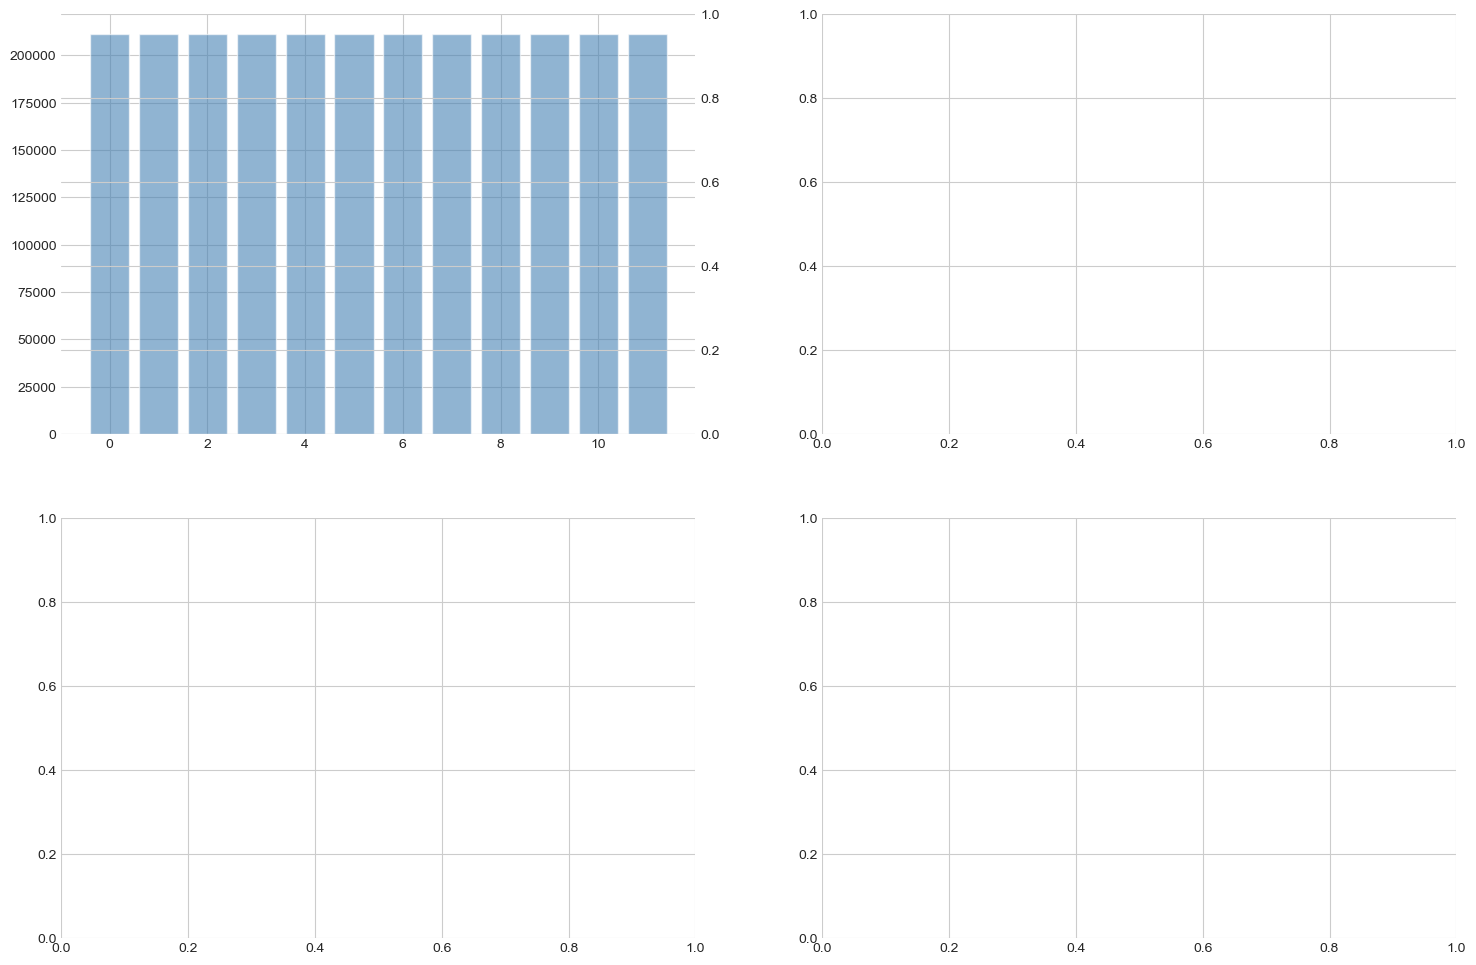

In [39]:
"""
PHASE 3: EXPLORATORY DATA ANALYSIS (EDA)
Bitcoin Market Sentiment and Trader Performance Analysis

This module performs comprehensive exploratory data analysis including:
1. Univariate Analysis (Distributions and Patterns)
2. Temporal Analysis (Time-based Trends)
3. Trader Segmentation Analysis (Performance Clustering)

Author: Data Science Team
Date: 2024
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10
color_palette = sns.color_palette("husl", 10)

print("="*100)
print("PHASE 3: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*100)

# ============================================================================
# 0. DATA LOADING
# ============================================================================

def load_engineered_datasets():
    """Load all engineered datasets from Phase 2."""
    print("\n[0/3] Loading engineered datasets from Phase 2...")
    
    try:
        trader_df = pd.read_csv('Phase 2 -feature_engineering_plots/trader_data_engineered.csv')
        trader_df['timestamp'] = pd.to_datetime(trader_df['timestamp'])
        trader_df['trade_date'] = pd.to_datetime(trader_df['trade_date'])
        print(f"✓ Trader data loaded: {trader_df.shape}")
    except FileNotFoundError:
        print("⚠ Warning: trader_data_engineered.csv not found. Using original trader_data.csv")
        trader_df = pd.read_csv('historical_data.csv')
        if 'Timestamp' in trader_df.columns:
            trader_df['timestamp'] = pd.to_datetime(trader_df['Timestamp'])
        elif 'Timestamp IST' in trader_df.columns:
            trader_df['timestamp'] = pd.to_datetime(trader_df['Timestamp IST'])
        trader_df['trade_date'] = trader_df['timestamp'].dt.date
    
    try:
        sentiment_df = pd.read_csv('Phase 2 -feature_engineering_plots/sentiment_data_engineered.csv')
        sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'])
        sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
        print(f"✓ Sentiment data loaded: {sentiment_df.shape}")
    except FileNotFoundError:
        print("⚠ Warning: sentiment_data_engineered.csv not found. Using original bitcoin_sentiment.csv")
        sentiment_df = pd.read_csv('fear_greed_index.csv')
        sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'])
        sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
    
    try:
        account_metrics = pd.read_csv('Phase 2 -feature_engineering_plots/account_metrics.csv')
        print(f"✓ Account metrics loaded: {account_metrics.shape}")
    except FileNotFoundError:
        print("⚠ Warning: account_metrics.csv not found. Will calculate basic metrics.")
        account_metrics = None
    
    try:
        merged_df = pd.read_csv('Phase 2 -feature_engineering_plots/merged_trader_sentiment.csv')
        merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])
        print(f"✓ Merged dataset loaded: {merged_df.shape}")
    except FileNotFoundError:
        print("⚠ Warning: merged_trader_sentiment.csv not found. Will use separate datasets.")
        merged_df = None
    
    print(f"\n✓ All datasets loaded successfully")
    return trader_df, sentiment_df, account_metrics, merged_df


# ============================================================================
# 1. UNIVARIATE ANALYSIS - HISTORICAL DATA
# ============================================================================

def analyze_pnl_distribution(trader_df):
    """Analyze and visualize PnL distribution."""
    print("\n[1.1] Analyzing PnL distribution...")
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    pnl_data = trader_df['Closed PnL'].dropna()
    
    # 1. Histogram with KDE
    axes[0, 0].hist(pnl_data, bins=100, alpha=0.7, color='steelblue', edgecolor='black', density=True)
    pnl_data.plot(kind='kde', ax=axes[0, 0], color='red', linewidth=2, label='KDE')
    axes[0, 0].set_title('PnL Distribution (Histogram + KDE)', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Closed PnL (USD)')
    axes[0, 0].set_ylabel('Density')
    axes[0, 0].axvline(0, color='black', linestyle='--', linewidth=2, label='Break-even')
    axes[0, 0].axvline(pnl_data.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: ${pnl_data.mean():.2f}')
    axes[0, 0].axvline(pnl_data.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: ${pnl_data.median():.2f}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Box plot
    box_data = [pnl_data[pnl_data > 0], pnl_data[pnl_data < 0], pnl_data]
    box = axes[0, 1].boxplot(box_data, labels=['Profitable', 'Loss', 'All Trades'], 
                             patch_artist=True, showmeans=True)
    colors = ['lightgreen', 'lightcoral', 'lightblue']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    axes[0, 1].set_title('PnL Distribution by Trade Outcome', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Closed PnL (USD)')
    axes[0, 1].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Cumulative distribution
    sorted_pnl = np.sort(pnl_data)
    cumulative = np.arange(1, len(sorted_pnl) + 1) / len(sorted_pnl)
    axes[1, 0].plot(sorted_pnl, cumulative, linewidth=2, color='purple')
    axes[1, 0].set_title('Cumulative Distribution of PnL', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Closed PnL (USD)')
    axes[1, 0].set_ylabel('Cumulative Probability')
    axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Break-even')
    axes[1, 0].axhline(0.5, color='orange', linestyle='--', linewidth=1, alpha=0.5)
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()
    
    # 4. Q-Q Plot (normality test)
    stats.probplot(pnl_data, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot (Normality Test)', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('eda_plots/01_pnl_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Statistical summary
    print(f"\n   PnL Statistics:")
    print(f"   {'Mean:':<25} ${pnl_data.mean():,.2f}")
    print(f"   {'Median:':<25} ${pnl_data.median():,.2f}")
    print(f"   {'Std Dev:':<25} ${pnl_data.std():,.2f}")
    print(f"   {'Min:':<25} ${pnl_data.min():,.2f}")
    print(f"   {'Max:':<25} ${pnl_data.max():,.2f}")
    print(f"   {'25th Percentile:':<25} ${pnl_data.quantile(0.25):,.2f}")
    print(f"   {'75th Percentile:':<25} ${pnl_data.quantile(0.75):,.2f}")
    print(f"   {'Skewness:':<25} {stats.skew(pnl_data):.4f}")
    print(f"   {'Kurtosis:':<25} {stats.kurtosis(pnl_data):.4f}")
    
    profitable_trades = (pnl_data > 0).sum()
    loss_trades = (pnl_data < 0).sum()
    breakeven_trades = (pnl_data == 0).sum()
    
    print(f"\n   Trade Outcomes:")
    print(f"   {'Profitable trades:':<25} {profitable_trades:,} ({profitable_trades/len(pnl_data)*100:.2f}%)")
    print(f"   {'Loss trades:':<25} {loss_trades:,} ({loss_trades/len(pnl_data)*100:.2f}%)")
    print(f"   {'Break-even trades:':<25} {breakeven_trades:,} ({breakeven_trades/len(pnl_data)*100:.2f}%)")
    
    print(f"   ✓ Saved: 01_pnl_distribution.png")


def analyze_trade_sizes(trader_df):
    """Analyze and visualize trade size distribution."""
    print("\n[1.2] Analyzing trade size distribution...")
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    size_data = trader_df['Size USD'].dropna()
    size_data = size_data[size_data > 0]  # Remove zeros
    
    # 1. Histogram (log scale)
    axes[0, 0].hist(size_data, bins=100, alpha=0.7, color='teal', edgecolor='black')
    axes[0, 0].set_title('Trade Size Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Trade Size (USD)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_yscale('log')
    axes[0, 0].axvline(size_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${size_data.mean():,.0f}')
    axes[0, 0].axvline(size_data.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: ${size_data.median():,.0f}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Log-log histogram
    log_bins = np.logspace(np.log10(size_data.min()), np.log10(size_data.max()), 50)
    axes[0, 1].hist(size_data, bins=log_bins, alpha=0.7, color='purple', edgecolor='black')
    axes[0, 1].set_title('Trade Size Distribution (Log-Log Scale)', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Trade Size (USD)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_yscale('log')
    axes[0, 1].grid(True, alpha=0.3, which='both')
    
    # 3. Box plot by percentiles
    percentile_bins = pd.qcut(size_data, q=5, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
    size_by_percentile = [size_data[percentile_bins == label] for label in ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']]
    box = axes[1, 0].boxplot(size_by_percentile, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'],
                             patch_artist=True, showmeans=True)
    for patch in box['boxes']:
        patch.set_facecolor('lightblue')
    axes[1, 0].set_title('Trade Size by Percentile Groups', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Percentile Group')
    axes[1, 0].set_ylabel('Trade Size (USD)')
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Trade size vs PnL scatter (sample)
    if len(trader_df) > 5000:
        sample_df = trader_df.sample(5000)
    else:
        sample_df = trader_df
    
    scatter = axes[1, 1].scatter(sample_df['Size USD'], sample_df['Closed PnL'], 
                                alpha=0.4, c=sample_df['Closed PnL'], cmap='RdYlGn', s=20)
    axes[1, 1].set_title('Trade Size vs PnL (Sample)', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Trade Size (USD)')
    axes[1, 1].set_ylabel('Closed PnL (USD)')
    axes[1, 1].set_xscale('log')
    axes[1, 1].axhline(0, color='black', linestyle='-', linewidth=1)
    axes[1, 1].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1, 1], label='PnL (USD)')
    
    plt.tight_layout()
    plt.savefig('eda_plots/02_trade_size_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Statistics
    print(f"\n   Trade Size Statistics:")
    print(f"   {'Mean:':<25} ${size_data.mean():,.2f}")
    print(f"   {'Median:':<25} ${size_data.median():,.2f}")
    print(f"   {'Std Dev:':<25} ${size_data.std():,.2f}")
    print(f"   {'Min:':<25} ${size_data.min():,.2f}")
    print(f"   {'Max:':<25} ${size_data.max():,.2f}")
    print(f"   {'95th Percentile:':<25} ${size_data.quantile(0.95):,.2f}")
    print(f"   {'99th Percentile:':<25} ${size_data.quantile(0.99):,.2f}")
    print(f"   ✓ Saved: 02_trade_size_distribution.png")


def analyze_execution_prices(trader_df):
    """Analyze execution price distribution."""
    print("\n[1.3] Analyzing execution price distribution...")
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    price_data = trader_df['Execution Price'].dropna()
    
    # 1. Time series of execution prices
    trader_sorted = trader_df.sort_values('timestamp')
    axes[0, 0].plot(trader_sorted['timestamp'], trader_sorted['Execution Price'], 
                    alpha=0.5, linewidth=0.5, color='blue')
    axes[0, 0].set_title('Execution Price Over Time', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Execution Price (USD)')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Price distribution
    axes[0, 1].hist(price_data, bins=100, alpha=0.7, color='green', edgecolor='black')
    axes[0, 1].set_title('Execution Price Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Execution Price (USD)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].axvline(price_data.mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: ${price_data.mean():,.2f}')
    axes[0, 1].axvline(price_data.median(), color='orange', linestyle='--', linewidth=2, 
                       label=f'Median: ${price_data.median():,.2f}')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Price by coin (if multiple coins)
    if 'Coin' in trader_df.columns:
        coin_counts = trader_df['Coin'].value_counts().head(10)
        top_coins = coin_counts.index.tolist()
        
        price_by_coin = [trader_df[trader_df['Coin'] == coin]['Execution Price'].dropna() 
                        for coin in top_coins]
        
        box = axes[1, 0].boxplot(price_by_coin, labels=top_coins, patch_artist=True, showmeans=True)
        for patch in box['boxes']:
            patch.set_facecolor('lightcoral')
        axes[1, 0].set_title('Execution Price by Coin (Top 10)', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Coin')
        axes[1, 0].set_ylabel('Execution Price (USD)')
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Price volatility over time (rolling std)
    if len(trader_sorted) > 100:
        trader_sorted['price_rolling_std'] = trader_sorted['Execution Price'].rolling(100).std()
        axes[1, 1].plot(trader_sorted['timestamp'], trader_sorted['price_rolling_std'], 
                       color='purple', linewidth=1.5)
        axes[1, 1].set_title('Price Volatility Over Time (100-trade Rolling Std)', 
                            fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Date')
        axes[1, 1].set_ylabel('Rolling Std Dev')
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('eda_plots/03_execution_price_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"\n   Execution Price Statistics:")
    print(f"   {'Mean:':<25} ${price_data.mean():,.2f}")
    print(f"   {'Median:':<25} ${price_data.median():,.2f}")
    print(f"   {'Std Dev:':<25} ${price_data.std():,.2f}")
    print(f"   {'Min:':<25} ${price_data.min():,.2f}")
    print(f"   {'Max:':<25} ${price_data.max():,.2f}")
    print(f"   ✓ Saved: 03_execution_price_analysis.png")


def analyze_coin_distribution(trader_df):
    """Analyze transaction count by coin type."""
    print("\n[1.4] Analyzing coin distribution...")
    
    if 'Coin' not in trader_df.columns:
        print("   ⚠ 'Coin' column not found. Skipping coin analysis.")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    coin_counts = trader_df['Coin'].value_counts()
    
    # 1. Top 15 coins by transaction count
    top_coins = coin_counts.head(15)
    axes[0, 0].barh(range(len(top_coins)), top_coins.values, color=color_palette[:len(top_coins)])
    axes[0, 0].set_yticks(range(len(top_coins)))
    axes[0, 0].set_yticklabels(top_coins.index)
    axes[0, 0].set_title('Top 15 Coins by Transaction Count', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Number of Transactions')
    axes[0, 0].invert_yaxis()
    axes[0, 0].grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, v in enumerate(top_coins.values):
        axes[0, 0].text(v, i, f' {v:,}', va='center')
    
    # 2. Pie chart (top 10 + others)
    top_10 = coin_counts.head(10)
    others = coin_counts.iloc[10:].sum()
    pie_data = pd.concat([top_10, pd.Series({'Others': others})])
    
    axes[0, 1].pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Market Share by Coin (Top 10 + Others)', fontsize=14, fontweight='bold')
    
    # 3. Volume by coin (top 10)
    coin_volume = trader_df.groupby('Coin')['Size USD'].sum().sort_values(ascending=False).head(10)
    axes[1, 0].bar(range(len(coin_volume)), coin_volume.values, color='steelblue', edgecolor='black')
    axes[1, 0].set_xticks(range(len(coin_volume)))
    axes[1, 0].set_xticklabels(coin_volume.index, rotation=45, ha='right')
    axes[1, 0].set_title('Top 10 Coins by Total Volume (USD)', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Total Volume (USD)')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Format y-axis
    axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
    
    # 4. Average PnL by coin (top 10 by transaction count)
    top_10_coins = coin_counts.head(10).index
    avg_pnl_by_coin = trader_df[trader_df['Coin'].isin(top_10_coins)].groupby('Coin')['Closed PnL'].mean().sort_values()
    
    colors = ['red' if x < 0 else 'green' for x in avg_pnl_by_coin.values]
    axes[1, 1].barh(range(len(avg_pnl_by_coin)), avg_pnl_by_coin.values, color=colors, edgecolor='black')
    axes[1, 1].set_yticks(range(len(avg_pnl_by_coin)))
    axes[1, 1].set_yticklabels(avg_pnl_by_coin.index)
    axes[1, 1].set_title('Average PnL by Coin (Top 10 Coins)', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Average PnL (USD)')
    axes[1, 1].axvline(0, color='black', linestyle='-', linewidth=1)
    axes[1, 1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.savefig('eda_plots/04_coin_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"\n   Coin Statistics:")
    print(f"   {'Unique coins:':<25} {coin_counts.count()}")
    print(f"   {'Most traded coin:':<25} {coin_counts.index[0]} ({coin_counts.values[0]:,} trades)")
    print(f"   {'Top 5 coins:':<25} {', '.join(coin_counts.head(5).index.tolist())}")
    print(f"   ✓ Saved: 04_coin_distribution.png")


def analyze_buy_sell_distribution(trader_df):
    """Analyze buy vs sell distribution."""
    print("\n[1.5] Analyzing buy vs sell distribution...")
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # Determine the column name for direction
    direction_col = None
    if 'Side' in trader_df.columns:
        direction_col = 'Side'
    elif 'Direction' in trader_df.columns:
        direction_col = 'Direction'
    
    if direction_col is None:
        print("   ⚠ No direction column found. Skipping buy/sell analysis.")
        return
    
    # Normalize values
    trader_df[direction_col] = trader_df[direction_col].str.upper()
    
    # Map to BUY/SELL
    def map_direction(val):
        if pd.isna(val):
            return 'UNKNOWN'
        if val in ['BUY', 'LONG', 'B']:
            return 'BUY'
        elif val in ['SELL', 'SHORT', 'S']:
            return 'SELL'
        else:
            return val
    
    trader_df['direction_mapped'] = trader_df[direction_col].apply(map_direction)
    
    direction_counts = trader_df['direction_mapped'].value_counts()
    
    # 1. Pie chart
    axes[0, 0].pie(direction_counts.values, labels=direction_counts.index, autopct='%1.1f%%',
                   colors=['lightgreen', 'lightcoral', 'lightgray'], startangle=90)
    axes[0, 0].set_title('Buy vs Sell Distribution', fontsize=14, fontweight='bold')
    
    # 2. Bar chart with counts
    axes[0, 1].bar(range(len(direction_counts)), direction_counts.values, 
                   color=['green', 'red', 'gray'][:len(direction_counts)], edgecolor='black')
    axes[0, 1].set_xticks(range(len(direction_counts)))
    axes[0, 1].set_xticklabels(direction_counts.index)
    axes[0, 1].set_title('Transaction Count by Direction', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Number of Transactions')
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, v in enumerate(direction_counts.values):
        axes[0, 1].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Average PnL by direction
    avg_pnl = trader_df.groupby('direction_mapped')['Closed PnL'].mean().sort_values()
    colors = ['red' if x < 0 else 'green' for x in avg_pnl.values]
    axes[1, 0].bar(range(len(avg_pnl)), avg_pnl.values, color=colors, edgecolor='black')
    axes[1, 0].set_xticks(range(len(avg_pnl)))
    axes[1, 0].set_xticklabels(avg_pnl.index)
    axes[1, 0].set_title('Average PnL by Direction', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Average PnL (USD)')
    axes[1, 0].axhline(0, color='black', linestyle='-', linewidth=1)
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # 4. Volume by direction
    volume_by_direction = trader_df.groupby('direction_mapped')['Size USD'].sum().sort_values(ascending=False)
    axes[1, 1].bar(range(len(volume_by_direction)), volume_by_direction.values, 
                   color='steelblue', edgecolor='black')
    axes[1, 1].set_xticks(range(len(volume_by_direction)))
    axes[1, 1].set_xticklabels(volume_by_direction.index)
    axes[1, 1].set_title('Total Volume by Direction', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Total Volume (USD)')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
    
    plt.tight_layout()
    plt.savefig('eda_plots/05_buy_sell_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"\n   Direction Statistics:")
    for direction, count in direction_counts.items():
        pct = count / direction_counts.sum() * 100
        print(f"   {direction:<15} {count:>10,} trades ({pct:>5.2f}%)")
    print(f"   ✓ Saved: 05_buy_sell_distribution.png")


def analyze_fee_distribution(trader_df):
    """Analyze fee distribution."""
    print("\n[1.6] Analyzing fee distribution...")
    
    if 'Fee' not in trader_df.columns:
        print("   ⚠ 'Fee' column not found. Skipping fee analysis.")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    fee_data = trader_df['Fee'].dropna()
    fee_data = fee_data[fee_data != 0]  # Remove zero fees
    
    # 1. Fee distribution
    axes[0, 0].hist(fee_data, bins=100, alpha=0.7, color='orange', edgecolor='black')
    axes[0, 0].set_title('Fee Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Fee (USD)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(fee_data.mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: ${fee_data.mean():.4f}')
    axes[0, 0].axvline(fee_data.median(), color='green', linestyle='--', linewidth=2, 
                       label=f'Median: ${fee_data.median():.4f}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Fee as percentage of trade size
    trader_df['fee_pct'] = (trader_df['Fee'] / trader_df['Size USD'] * 100).replace([np.inf, -np.inf], np.nan)
    fee_pct_data = trader_df['fee_pct'].dropna()
    fee_pct_data = fee_pct_data[(fee_pct_data > 0) & (fee_pct_data < 10)]  # Remove outliers
    
    axes[0, 1].hist(fee_pct_data, bins=50, alpha=0.7, color='purple', edgecolor='black')
    axes[0, 1].set_title('Fee as % of Trade Size', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Fee (%)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].axvline(fee_pct_data.mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {fee_pct_data.mean():.4f}%')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Total fees over time
    trader_sorted = trader_df.sort_values('timestamp')
    trader_sorted['cumulative_fees'] = trader_sorted['Fee'].cumsum()
    axes[1, 0].plot(trader_sorted['timestamp'], trader_sorted['cumulative_fees'], 
                    color='red', linewidth=2)
    axes[1, 0].set_title('Cumulative Fees Over Time', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Cumulative Fees (USD)')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    
    # 4. Fee by trade size bucket
    size_bins = pd.qcut(trader_df['Size USD'], q=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'], duplicates='drop')
    fee_by_size = trader_df.groupby(size_bins)['Fee'].mean()
    
    axes[1, 1].bar(range(len(fee_by_size)), fee_by_size.values, color='teal', edgecolor='black')
    axes[1, 1].set_xticks(range(len(fee_by_size)))
    axes[1, 1].set_xticklabels(fee_by_size.index, rotation=45)
    axes[1, 1].set_title('Average Fee by Trade Size Category', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Average Fee (USD)')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('eda_plots/06_fee_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"\n   Fee Statistics:")
    print(f"   {'Total fees paid:':<25} ${fee_data.sum():,.2f}")
    print(f"   {'Average fee:':<25} ${fee_data.mean():.4f}")
    print(f"   {'Median fee:':<25} ${fee_data.median():.4f}")
    print(f"   {'Max fee:':<25} ${fee_data.max():.4f}")
    print(f"   {'Avg fee as % of trade:':<25} {fee_pct_data.mean():.4f}%")
    print(f"   ✓ Saved: 06_fee_distribution.png")


# ============================================================================
# 2. UNIVARIATE ANALYSIS - SENTIMENT DATA
# ============================================================================

def analyze_sentiment_timeseries(sentiment_df):
    """Analyze sentiment time series."""
    print("\n[2.1] Analyzing sentiment time series...")
    
    fig, axes = plt.subplots(3, 1, figsize=(18, 14))
    
    sentiment_sorted = sentiment_df.sort_values('date')
    
    # 1. Full time series with regime coloring
    ax = axes[0]
    ax.plot(sentiment_sorted['date'], sentiment_sorted['value'], linewidth=1, color='black', alpha=0.7)
    
    # Color regions
    ax.fill_between(sentiment_sorted['date'], 0, 25, alpha=0.2, color='darkred', label='Extreme Fear')
    ax.fill_between(sentiment_sorted['date'], 25, 45, alpha=0.2, color='orange', label='Fear')
    ax.fill_between(sentiment_sorted['date'], 45, 55, alpha=0.2, color='gray', label='Neutral')
    ax.fill_between(sentiment_sorted['date'], 55, 75, alpha=0.2, color='lightgreen', label='Greed')
    ax.fill_between(sentiment_sorted['date'], 75, 100, alpha=0.2, color='darkgreen', label='Extreme Greed')
    
    # Add 30-day moving average if available
    if 'sentiment_ma_30' in sentiment_sorted.columns:
        ax.plot(sentiment_sorted['date'], sentiment_sorted['sentiment_ma_30'], 
                linewidth=2, color='red', label='30-day MA', alpha=0.8)
    
    ax.set_title('Fear & Greed Index Over Time', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sentiment Value')
    ax.set_ylim(0, 100)
    ax.legend(loc='upper left', ncol=6)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # 2. Last year in detail
    last_year = sentiment_sorted[sentiment_sorted['date'] >= sentiment_sorted['date'].max() - pd.Timedelta(days=365)]
    
    ax = axes[1]
    ax.plot(last_year['date'], last_year['value'], linewidth=1.5, color='blue')
    ax.axhline(y=50, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Neutral (50)')
    ax.axhline(y=25, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Fear Threshold')
    ax.axhline(y=75, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Greed Threshold')
    ax.set_title('Sentiment - Last 12 Months', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sentiment Value')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # 3. Sentiment volatility over time
    if 'sentiment_volatility_30d' in sentiment_sorted.columns:
        ax = axes[2]
        ax.plot(sentiment_sorted['date'], sentiment_sorted['sentiment_volatility_30d'], 
                linewidth=1.5, color='purple')
        ax.set_title('Sentiment Volatility (30-day Rolling Std)', fontsize=14, fontweight='bold')
        ax.set_xlabel('Date')
        ax.set_ylabel('Volatility')
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('eda_plots/07_sentiment_timeseries.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"   ✓ Saved: 07_sentiment_timeseries.png")


def analyze_sentiment_distribution(sentiment_df):
    """Analyze sentiment value distribution."""
    print("\n[2.2] Analyzing sentiment distribution...")
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    sentiment_values = sentiment_df['value'].dropna()
    
    # 1. Histogram with KDE
    axes[0, 0].hist(sentiment_values, bins=50, alpha=0.7, color='steelblue', edgecolor='black', density=True)
    sentiment_values.plot(kind='kde', ax=axes[0, 0], color='red', linewidth=2, label='KDE')
    axes[0, 0].set_title('Sentiment Value Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Sentiment Value')
    axes[0, 0].set_ylabel('Density')
    axes[0, 0].axvline(50, color='black', linestyle='--', linewidth=2, label='Neutral (50)')
    axes[0, 0].axvline(sentiment_values.mean(), color='green', linestyle='--', linewidth=2, 
                       label=f'Mean: {sentiment_values.mean():.1f}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Box plot
    axes[0, 1].boxplot(sentiment_values, vert=True, patch_artist=True, 
                       boxprops=dict(facecolor='lightblue'))
    axes[0, 1].set_title('Sentiment Value Box Plot', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Sentiment Value')
    axes[0, 1].axhline(25, color='red', linestyle='--', alpha=0.5, label='Fear Threshold')
    axes[0, 1].axhline(75, color='green', linestyle='--', alpha=0.5, label='Greed Threshold')
    axes[0, 1].axhline(50, color='black', linestyle='--', alpha=0.5, label='Neutral')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # 3. Cumulative distribution
    sorted_sentiment = np.sort(sentiment_values)
    cumulative = np.arange(1, len(sorted_sentiment) + 1) / len(sorted_sentiment)
    axes[1, 0].plot(sorted_sentiment, cumulative, linewidth=2, color='purple')
    axes[1, 0].set_title('Cumulative Distribution of Sentiment', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Sentiment Value')
    axes[1, 0].set_ylabel('Cumulative Probability')
    axes[1, 0].axvline(50, color='black', linestyle='--', linewidth=1, alpha=0.5)
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Sentiment bins
    bins = [0, 25, 45, 55, 75, 100]
    labels = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    sentiment_df['sentiment_bin'] = pd.cut(sentiment_df['value'], bins=bins, labels=labels)
    bin_counts = sentiment_df['sentiment_bin'].value_counts().reindex(labels, fill_value=0)
    
    colors_map = {'Extreme Fear': 'darkred', 'Fear': 'orange', 'Neutral': 'gray', 
                  'Greed': 'lightgreen', 'Extreme Greed': 'darkgreen'}
    colors = [colors_map[label] for label in bin_counts.index]
    
    axes[1, 1].bar(range(len(bin_counts)), bin_counts.values, color=colors, edgecolor='black')
    axes[1, 1].set_xticks(range(len(bin_counts)))
    axes[1, 1].set_xticklabels(bin_counts.index, rotation=45, ha='right')
    axes[1, 1].set_title('Distribution of Sentiment Categories', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Number of Days')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    # Add percentages
    total = bin_counts.sum()
    for i, v in enumerate(bin_counts.values):
        pct = v / total * 100
        axes[1, 1].text(i, v, f'{v}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('eda_plots/08_sentiment_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"\n   Sentiment Statistics:")
    print(f"   {'Mean:':<25} {sentiment_values.mean():.2f}")
    print(f"   {'Median:':<25} {sentiment_values.median():.2f}")
    print(f"   {'Std Dev:':<25} {sentiment_values.std():.2f}")
    print(f"   {'Min:':<25} {sentiment_values.min():.2f}")
    print(f"   {'Max:':<25} {sentiment_values.max():.2f}")
    print(f"   ✓ Saved: 08_sentiment_distribution.png")


def analyze_sentiment_classifications(sentiment_df):
    """Analyze count of days in each classification."""
    print("\n[2.3] Analyzing sentiment classifications...")
    
    # Use existing classification or create from value
    if 'classification' in sentiment_df.columns and sentiment_df['classification'].notna().any():
        classification_col = 'classification'
    elif 'sentiment_category' in sentiment_df.columns:
        classification_col = 'sentiment_category'
    else:
        # Create from value
        bins = [0, 25, 45, 55, 75, 100]
        labels = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
        sentiment_df['classification'] = pd.cut(sentiment_df['value'], bins=bins, labels=labels)
        classification_col = 'classification'
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    class_counts = sentiment_df[classification_col].value_counts()
    
    # 1. Bar chart
    colors_map = {'Extreme Fear': 'darkred', 'Fear': 'orange', 'Neutral': 'gray', 
                  'Greed': 'lightgreen', 'Extreme Greed': 'darkgreen'}
    colors = [colors_map.get(cat, 'blue') for cat in class_counts.index]
    
    axes[0, 0].bar(range(len(class_counts)), class_counts.values, color=colors, edgecolor='black')
    axes[0, 0].set_xticks(range(len(class_counts)))
    axes[0, 0].set_xticklabels(class_counts.index, rotation=45, ha='right')
    axes[0, 0].set_title('Days in Each Sentiment Classification', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Number of Days')
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Add counts and percentages
    total = class_counts.sum()
    for i, v in enumerate(class_counts.values):
        pct = v / total * 100
        axes[0, 0].text(i, v, f'{v}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')
    
    # 2. Pie chart
    axes[0, 1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
                   colors=colors, startangle=90)
    axes[0, 1].set_title('Proportion of Time in Each Sentiment', fontsize=14, fontweight='bold')
    
    # 3. Time in each category over time (stacked area)
    sentiment_sorted = sentiment_df.sort_values('date')
    
    # Create monthly aggregation
    sentiment_sorted['year_month'] = sentiment_sorted['date'].dt.to_period('M')
    monthly_class = sentiment_sorted.groupby(['year_month', classification_col]).size().unstack(fill_value=0)
    
    # Plot last 24 months
    monthly_class = monthly_class.tail(24)
    
    axes[1, 0].stackplot(range(len(monthly_class)), 
                         *[monthly_class[col] for col in monthly_class.columns],
                         labels=monthly_class.columns,
                         colors=[colors_map.get(col, 'blue') for col in monthly_class.columns],
                         alpha=0.7)
    axes[1, 0].set_title('Sentiment Distribution Over Time (Last 24 Months)', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Number of Days')
    axes[1, 0].legend(loc='upper left')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Set x-axis labels
    tick_positions = range(0, len(monthly_class), max(1, len(monthly_class)//12))
    axes[1, 0].set_xticks(tick_positions)
    axes[1, 0].set_xticklabels([str(monthly_class.index[i]) for i in tick_positions], rotation=45)
    
    # 4. Average sentiment by category
    avg_by_class = sentiment_df.groupby(classification_col)['value'].mean().sort_values()
    
    axes[1, 1].barh(range(len(avg_by_class)), avg_by_class.values, 
                    color=[colors_map.get(cat, 'blue') for cat in avg_by_class.index],
                    edgecolor='black')
    axes[1, 1].set_yticks(range(len(avg_by_class)))
    axes[1, 1].set_yticklabels(avg_by_class.index)
    axes[1, 1].set_title('Average Sentiment Value by Classification', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Average Sentiment Value')
    axes[1, 1].grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, v in enumerate(avg_by_class.values):
        axes[1, 1].text(v, i, f' {v:.1f}', va='center')
    
    plt.tight_layout()
    plt.savefig('eda_plots/09_sentiment_classifications.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"\n   Classification Distribution:")
    for cat, count in class_counts.items():
        pct = count / total * 100
        print(f"   {cat:<20} {count:>6} days ({pct:>5.2f}%)")
    print(f"   ✓ Saved: 09_sentiment_classifications.png")


def analyze_sentiment_transitions(sentiment_df):
    """Analyze sentiment transition matrix."""
    print("\n[2.4] Analyzing sentiment transition patterns...")
    
    # Ensure we have classification
    if 'classification' in sentiment_df.columns and sentiment_df['classification'].notna().any():
        classification_col = 'classification'
    elif 'sentiment_category' in sentiment_df.columns:
        classification_col = 'sentiment_category'
    else:
        bins = [0, 25, 45, 55, 75, 100]
        labels = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
        sentiment_df['classification'] = pd.cut(sentiment_df['value'], bins=bins, labels=labels)
        classification_col = 'classification'
    
    # Sort by date
    sentiment_sorted = sentiment_df.sort_values('date').copy()
    
    # Create transition pairs
    sentiment_sorted['prev_classification'] = sentiment_sorted[classification_col].shift(1)
    transitions = sentiment_sorted[['prev_classification', classification_col]].dropna()
    
    # Create transition matrix
    categories = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    transition_matrix = pd.crosstab(
        transitions['prev_classification'], 
        transitions[classification_col],
        normalize='index'
    ).reindex(index=categories, columns=categories, fill_value=0)
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # 1. Transition matrix heatmap (probabilities)
    sns.heatmap(transition_matrix, annot=True, fmt='.2%', cmap='YlOrRd', 
                ax=axes[0], cbar_kws={'label': 'Transition Probability'},
                linewidths=1, linecolor='white')
    axes[0].set_title('Sentiment Transition Probability Matrix', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('To State')
    axes[0].set_ylabel('From State')
    
    # 2. Transition counts (absolute numbers)
    transition_counts = pd.crosstab(
        transitions['prev_classification'], 
        transitions[classification_col]
    ).reindex(index=categories, columns=categories, fill_value=0)
    
    sns.heatmap(transition_counts, annot=True, fmt='d', cmap='Blues', 
                ax=axes[1], cbar_kws={'label': 'Number of Transitions'},
                linewidths=1, linecolor='white')
    axes[1].set_title('Sentiment Transition Count Matrix', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('To State')
    axes[1].set_ylabel('From State')
    
    plt.tight_layout()
    plt.savefig('eda_plots/10_sentiment_transitions.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"\n   Most Common Transitions:")
    # Get top 10 transitions
    transition_pairs = transitions.groupby(['prev_classification', classification_col]).size().sort_values(ascending=False)
    for i, ((from_state, to_state), count) in enumerate(transition_pairs.head(10).items(), 1):
        pct = count / len(transitions) * 100
        print(f"   {i:2d}. {from_state:<15} → {to_state:<15} {count:>5} times ({pct:>5.2f}%)")
    
    print(f"\n   Persistence (staying in same state):")
    for state in categories:
        if state in transition_matrix.index and state in transition_matrix.columns:
            persistence = transition_matrix.loc[state, state]
            print(f"   {state:<20} {persistence:>6.2%}")
    
    print(f"   ✓ Saved: 10_sentiment_transitions.png")


# ============================================================================
# 3. TEMPORAL ANALYSIS - TRADING PATTERNS
# ============================================================================

def analyze_volume_trends(trader_df):
    """Analyze daily/weekly/monthly trade volume trends."""
    print("\n[3.1] Analyzing volume trends over time...")
    
    fig, axes = plt.subplots(3, 1, figsize=(18, 14))
    
    # Daily volume
    daily_volume = trader_df.groupby(trader_df['timestamp'].dt.date).agg({
        'Size USD': 'sum',
        'Account': 'count'
    }).rename(columns={'Account': 'trade_count'})
    
    ax = axes[0]
    ax2 = ax.twinx()
    
    line1 = ax.plot(daily_volume.index, daily_volume['Size USD'], 
                    color='blue', linewidth=1, label='Volume (USD)', alpha=0.7)
    line2 = ax2.plot(daily_volume.index, daily_volume['trade_count'], 
                     color='red', linewidth=1, label='Trade Count', alpha=0.7)
    
    ax.set_title('Daily Trading Volume and Transaction Count', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume (USD)', color='blue')
    ax2.set_ylabel('Trade Count', color='red')
    ax.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='red')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Combined legend
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax.legend(lines, labels, loc='upper left')
    
    # Weekly volume
    trader_df['week'] = trader_df['timestamp'].dt.to_period('W')
    weekly_volume = trader_df.groupby('week').agg({
        'Size USD': 'sum',
        'Account': 'count'
    }).rename(columns={'Account': 'trade_count'})
    
    ax = axes[1]
    ax2 = ax.twinx()
    
    x_pos = range(len(weekly_volume))
    ax.bar(x_pos, weekly_volume['Size USD'], alpha=0.6, color='blue', label='Volume (USD)')
    ax2.plot(x_pos, weekly_volume['trade_count'], color='red', linewidth=2, 
             marker='o', label='Trade Count')
    
    ax.set_title('Weekly Trading Volume and Transaction Count', fontsize=14, fontweight='bold')
    ax.set_xlabel('Week')
    ax.set_ylabel('Volume (USD)', color='blue')
    ax2.set_ylabel('Trade Count', color='red')
    ax.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='red')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Set x-axis labels (every nth week)
    tick_positions = range(0, len(weekly_volume), max(1, len(weekly_volume)//20))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([str(weekly_volume.index[i]) for i in tick_positions], rotation=45, ha='right')
    
    lines = [ax.patches[0], ax2.lines[0]]
    ax.legend(lines, ['Volume (USD)', 'Trade Count'], loc='upper left')
    
    # Monthly volume
    trader_df['month'] = trader_df['timestamp'].dt.to_period('M')
    monthly_volume = trader_df.groupby('month').agg({
        'Size USD': 'sum',
        'Account': 'count',
        'Closed PnL': 'sum'
    }).rename(columns={'Account': 'trade_count'})
    
    ax = axes[2]
    ax2 = ax.twinx()
    
    x_pos = range(len(monthly_volume))
    width = 0.35
    
    ax.bar([x - width/2 for x in x_pos], monthly_volume['Size USD'], width, 
           alpha=0.6, color='blue', label='Volume (USD)')
    ax.bar([x + width/2 for x in x_pos], monthly_volume['Closed PnL'], width, 
           alpha=0.6, color='green', label='PnL (USD)')
    ax2.plot(x_pos, monthly_volume['trade_count'], color='red', linewidth=2, 
             marker='o', label='Trade Count')
    
    ax.set_title('Monthly Trading Volume, PnL, and Transaction Count', fontsize=14, fontweight='bold')
    ax.set_xlabel('Month')
    ax.set_ylabel('USD', color='black')
    ax2.set_ylabel('Trade Count', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax.axhline(0, color='black', linestyle='-', linewidth=1)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Set x-axis labels
    ax.set_xticks(x_pos)
    ax.set_xticklabels([str(monthly_volume.index[i]) for i in x_pos], rotation=45, ha='right')
    
    # Combined legend
    lines = ax.patches[:2] + [ax2.lines[0]]
    ax.legend(lines, ['Volume (USD)', 'PnL (USD)', 'Trade Count'], loc='upper left')
    
    plt.tight_layout()
    plt.savefig('eda_plots/11_volume_trends.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"   ✓ Saved: 11_volume_trends.png")


def analyze_trading_activity_heatmap(trader_df):
    """Create trading activity heatmap (hour × day of week)."""
    print("\n[3.2] Creating trading activity heatmap...")
    
    # Ensure we have hour and day_of_week
    if 'hour' not in trader_df.columns:
        trader_df['hour'] = trader_df['timestamp'].dt.hour
    if 'day_of_week' not in trader_df.columns:
        trader_df['day_of_week'] = trader_df['timestamp'].dt.dayofweek
    
    # Create pivot table
    heatmap_data = trader_df.groupby(['hour', 'day_of_week']).size().unstack(fill_value=0)
    
    # Ensure all hours and days are present
    all_hours = range(24)
    all_days = range(7)
    heatmap_data = heatmap_data.reindex(index=all_hours, columns=all_days, fill_value=0)
    
    fig, axes = plt.subplots(2, 1, figsize=(18, 12))
    
    # 1. Count heatmap
    day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='d', 
                xticklabels=day_labels, yticklabels=all_hours,
                ax=axes[0], cbar_kws={'label': 'Number of Trades'})
    axes[0].set_title('Trading Activity Heatmap (Hour × Day of Week)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Day of Week')
    axes[0].set_ylabel('Hour of Day (UTC)')
    
    # 2. Volume heatmap
    volume_heatmap = trader_df.groupby(['hour', 'day_of_week'])['Size USD'].sum().unstack(fill_value=0)
    volume_heatmap = volume_heatmap.reindex(index=all_hours, columns=all_days, fill_value=0)
    
    sns.heatmap(volume_heatmap, cmap='Blues', annot=False, 
                xticklabels=day_labels, yticklabels=all_hours,
                ax=axes[1], cbar_kws={'label': 'Total Volume (USD)'})
    axes[1].set_title('Trading Volume Heatmap (Hour × Day of Week)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Day of Week')
    axes[1].set_ylabel('Hour of Day (UTC)')
    
    plt.tight_layout()
    plt.savefig('eda_plots/12_trading_activity_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Find peak trading times
    peak_hour = heatmap_data.sum(axis=1).idxmax()
    peak_day = heatmap_data.sum(axis=0).idxmax()
    peak_combo = heatmap_data.stack().idxmax()
    
    print(f"\n   Peak Trading Times:")
    print(f"   {'Peak hour:':<25} {peak_hour}:00 UTC")
    print(f"   {'Peak day:':<25} {day_labels[peak_day]}")
    print(f"   {'Peak hour×day combo:':<25} {day_labels[peak_combo[1]]} at {peak_combo[0]}:00 UTC")
    print(f"   ✓ Saved: 12_trading_activity_heatmap.png")


def analyze_seasonality(trader_df):
    """Analyze seasonality and monthly patterns."""
    print("\n[3.3] Analyzing seasonality patterns...")
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Monthly patterns (aggregated across years)
    trader_df['month_num'] = trader_df['timestamp'].dt.month
    monthly_stats = trader_df.groupby('month_num').agg({
        'Size USD': 'sum',
        'Account': 'count',
        'Closed PnL': 'sum'
    }).rename(columns={'Account': 'trade_count'})
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    ax = axes[0, 0]
    ax2 = ax.twinx()
    
    x_pos = range(12)
    ax.bar(x_pos, monthly_stats['trade_count'], alpha=0.6, color='steelblue', label='Trade Count')
    ax2.plot(x_pos, monthly_stats['Closed PnL'], color='red', linewidth=2, 
             marker='o', markersize=8, label='Total PnL')
    
    ax.set_title('Monthly Trading Patterns (Aggregated)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Month')
    ax.set_ylabel('Trade Count', color='steelblue')
    ax2.set_ylabel('Total PnL (USD)', color='red')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(month_names)
    ax.tick_params(axis='y', labelcolor='steelblue')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.grid(True, alpha=0.3, axis='y')
    
    lines = [ax.patches[0], ax2.lines[0]]
    ax.legend(lines, ['Trade Count', 'Total PnL'], loc='upper left')
    
    # 2. Day of month patterns
    trader_df['day_of_month'] = trader_df['timestamp'].dt.day
    daily_counts = trader_df.groupby('day_of_month').size()
    
    axes[0, 1].bar(daily_counts.index, daily_counts.values, color='coral', edgecolor='black')
    axes[0, 1].set_title('Trading Activity by Day of Month', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Day of Month')
    axes[0, 1].set_ylabel('Number of Trades')
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # 3. Quarterly patterns
    trader_df['quarter'] = trader_df['timestamp'].dt.quarter
    quarterly_stats = trader_df.groupby('quarter').agg({
        'Size USD': 'mean',
        'Closed PnL': ['sum', 'mean']
    })
    
    x_pos = range(1, 5)
    width = 0.35
    
    axes[1, 0].bar([x - width/2 for x in x_pos], quarterly_stats[('Closed PnL', 'sum')], 
                   width, alpha=0.6, color='green', label='Total PnL')
    axes[1, 0].bar([x + width/2 for x in x_pos], quarterly_stats[('Size USD', 'mean')], 
                   width, alpha=0.6, color='blue', label='Avg Trade Size')
    
    axes[1, 0].set_title('Quarterly Trading Patterns', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Quarter')
    axes[1, 0].set_ylabel('USD')
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels([f'Q{i}' for i in x_pos])
    axes[1, 0].legend()
    axes[1, 0].axhline(0, color='black', linestyle='-', linewidth=1)
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # 4. Weekend vs Weekday
    if 'is_weekend' not in trader_df.columns:
        trader_df['is_weekend'] = trader_df['timestamp'].dt.dayofweek >= 5
    
    weekend_stats = trader_df.groupby('is_weekend').agg({
        'Account': 'count',
        'Size USD': 'mean',
        'Closed PnL': 'mean'
    }).rename(columns={'Account': 'trade_count'})
    
    weekend_stats.index = ['Weekday', 'Weekend']
    
    x_pos = range(2)
    width = 0.25
    
    axes[1, 1].bar([x - width for x in x_pos], weekend_stats['trade_count'], 
                   width, alpha=0.6, color='steelblue', label='Trade Count')
    axes[1, 1].bar(x_pos, weekend_stats['Size USD'], 
                   width, alpha=0.6, color='orange', label='Avg Trade Size')
    axes[1, 1].bar([x + width for x in x_pos], weekend_stats['Closed PnL'], 
                   width, alpha=0.6, color='green', label='Avg PnL')
    
    axes[1, 1].set_title('Weekday vs Weekend Trading', fontsize=14, fontweight='bold')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels(weekend_stats.index)
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('eda_plots/13_seasonality_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"   ✓ Saved: 13_seasonality_analysis.png")


def analyze_trading_intensity(trader_df):
    """Analyze trading intensity over time."""
    print("\n[3.4] Analyzing trading intensity over time...")
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Rolling 30-day trade count
    daily_counts = trader_df.groupby(trader_df['timestamp'].dt.date).size().reset_index()
    daily_counts.columns = ['date', 'count']
    daily_counts = daily_counts.set_index('date').sort_index()
    daily_counts['rolling_30d'] = daily_counts['count'].rolling(30, min_periods=1).mean()
    
    axes[0, 0].plot(daily_counts.index, daily_counts['count'], alpha=0.3, color='blue', label='Daily')
    axes[0, 0].plot(daily_counts.index, daily_counts['rolling_30d'], linewidth=2, 
                    color='red', label='30-day MA')
    axes[0, 0].set_title('Trading Intensity Over Time', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Trades per Day')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Active traders over time
    daily_active_traders = trader_df.groupby(trader_df['timestamp'].dt.date)['Account'].nunique().reset_index()
    daily_active_traders.columns = ['date', 'active_traders']
    daily_active_traders = daily_active_traders.set_index('date').sort_index()
    daily_active_traders['rolling_30d'] = daily_active_traders['active_traders'].rolling(30, min_periods=1).mean()
    
    axes[0, 1].plot(daily_active_traders.index, daily_active_traders['active_traders'], 
                    alpha=0.3, color='green', label='Daily')
    axes[0, 1].plot(daily_active_traders.index, daily_active_traders['rolling_30d'], 
                    linewidth=2, color='darkgreen', label='30-day MA')
    axes[0, 1].set_title('Active Traders Over Time', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Number of Active Traders')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Average trades per active trader
    daily_intensity = pd.DataFrame({
        'trades': daily_counts['count'],
        'traders': daily_active_traders['active_traders']
    }).dropna()
    daily_intensity['trades_per_trader'] = daily_intensity['trades'] / daily_intensity['traders']
    daily_intensity['rolling_30d'] = daily_intensity['trades_per_trader'].rolling(30, min_periods=1).mean()
    
    axes[1, 0].plot(daily_intensity.index, daily_intensity['trades_per_trader'], 
                    alpha=0.3, color='purple', label='Daily')
    axes[1, 0].plot(daily_intensity.index, daily_intensity['rolling_30d'], 
                    linewidth=2, color='darkviolet', label='30-day MA')
    axes[1, 0].set_title('Trades per Active Trader Over Time', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Trades per Trader')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. Volume intensity
    daily_volume = trader_df.groupby(trader_df['timestamp'].dt.date)['Size USD'].sum().reset_index()
    daily_volume.columns = ['date', 'volume']
    daily_volume = daily_volume.set_index('date').sort_index()
    daily_volume['rolling_30d'] = daily_volume['volume'].rolling(30, min_periods=1).mean()
    
    axes[1, 1].fill_between(daily_volume.index, daily_volume['volume'], alpha=0.3, color='teal')
    axes[1, 1].plot(daily_volume.index, daily_volume['rolling_30d'], 
                    linewidth=2, color='darkcyan', label='30-day MA')
    axes[1, 1].set_title('Daily Trading Volume Over Time', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Volume (USD)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
    
    plt.tight_layout()
    plt.savefig('eda_plots/14_trading_intensity.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"   ✓ Saved: 14_trading_intensity.png")


def analyze_pnl_trends(trader_df):
    """Analyze PnL trends over time."""
    print("\n[3.5] Analyzing PnL trends over time...")
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Cumulative PnL over time
    trader_sorted = trader_df.sort_values('timestamp').copy()
    trader_sorted['cumulative_pnl'] = trader_sorted['Closed PnL'].cumsum()
    
    axes[0, 0].plot(trader_sorted['timestamp'], trader_sorted['cumulative_pnl'], 
                    linewidth=1.5, color='green')
    axes[0, 0].fill_between(trader_sorted['timestamp'], trader_sorted['cumulative_pnl'], 
                           alpha=0.3, color='green')
    axes[0, 0].set_title('Cumulative PnL Over Time (All Traders)', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Cumulative PnL (USD)')
    axes[0, 0].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
    
    # 2. Daily PnL
    daily_pnl = trader_df.groupby(trader_df['timestamp'].dt.date)['Closed PnL'].sum().reset_index()
    daily_pnl.columns = ['date', 'pnl']
    daily_pnl = daily_pnl.set_index('date').sort_index()
    
    colors = ['green' if x > 0 else 'red' for x in daily_pnl['pnl']]
    axes[0, 1].bar(daily_pnl.index, daily_pnl['pnl'], color=colors, alpha=0.6, edgecolor='black', linewidth=0.5)
    axes[0, 1].set_title('Daily PnL', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Daily PnL (USD)')
    axes[0, 1].axhline(0, color='black', linestyle='-', linewidth=1)
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Rolling 30-day PnL
    daily_pnl['rolling_30d'] = daily_pnl['pnl'].rolling(30, min_periods=1).sum()
    
    axes[1, 0].plot(daily_pnl.index, daily_pnl['rolling_30d'], linewidth=2, color='purple')
    axes[1, 0].fill_between(daily_pnl.index, daily_pnl['rolling_30d'], alpha=0.3, color='purple')
    axes[1, 0].set_title('Rolling 30-Day PnL', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('30-Day PnL (USD)')
    axes[1, 0].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. Win rate over time
    daily_pnl['win_rate'] = trader_df.groupby(trader_df['timestamp'].dt.date).apply(
        lambda x: (x['Closed PnL'] > 0).sum() / len(x) * 100
    )
    daily_pnl['rolling_win_rate'] = daily_pnl['win_rate'].rolling(30, min_periods=1).mean()
    
    axes[1, 1].plot(daily_pnl.index, daily_pnl['win_rate'], alpha=0.3, color='blue', label='Daily')
    axes[1, 1].plot(daily_pnl.index, daily_pnl['rolling_win_rate'], linewidth=2, 
                    color='darkblue', label='30-day MA')
    axes[1, 1].axhline(50, color='red', linestyle='--', linewidth=2, label='50%')
    axes[1, 1].set_title('Win Rate Over Time', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Win Rate (%)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].set_ylim(0, 100)
    
    plt.tight_layout()
    plt.savefig('eda_plots/15_pnl_trends.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"   ✓ Saved: 15_pnl_trends.png")


# ============================================================================
# 4. TEMPORAL ANALYSIS - SENTIMENT PATTERNS
# ============================================================================

def analyze_sentiment_regimes(sentiment_df):
    """Analyze sentiment regimes with highlighting."""
    print("\n[4.1] Analyzing sentiment regimes...")
    
    # This is similar to the time series but with more focus on regimes
    fig, axes = plt.subplots(2, 1, figsize=(18, 12))
    
    sentiment_sorted = sentiment_df.sort_values('date').copy()
    
    # Determine regimes
    bins = [0, 25, 45, 55, 75, 100]
    labels = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    if 'classification' not in sentiment_sorted.columns:
        sentiment_sorted['classification'] = pd.cut(sentiment_sorted['value'], bins=bins, labels=labels)
    
    # 1. Time series with regime highlighting
    ax = axes[0]
    
    for i in range(len(sentiment_sorted) - 1):
        classification = sentiment_sorted.iloc[i]['classification']
        color_map = {
            'Extreme Fear': 'darkred',
            'Fear': 'orange',
            'Neutral': 'gray',
            'Greed': 'lightgreen',
            'Extreme Greed': 'darkgreen'
        }
        color = color_map.get(classification, 'blue')
        
        ax.plot(sentiment_sorted['date'].iloc[i:i+2], 
               sentiment_sorted['value'].iloc[i:i+2],
               color=color, linewidth=2, alpha=0.7)
    
    ax.set_title('Sentiment Over Time (Color-coded by Regime)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sentiment Value')
    ax.set_ylim(0, 100)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Create custom legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='darkred', label='Extreme Fear'),
                      Patch(facecolor='orange', label='Fear'),
                      Patch(facecolor='gray', label='Neutral'),
                      Patch(facecolor='lightgreen', label='Greed'),
                      Patch(facecolor='darkgreen', label='Extreme Greed')]
    ax.legend(handles=legend_elements, loc='upper left', ncol=5)
    
    # 2. Regime duration analysis
    if 'regime_duration' in sentiment_sorted.columns:
        regime_col = 'regime_duration'
    else:
        # Calculate regime duration
        sentiment_sorted['regime_change'] = (sentiment_sorted['classification'] != sentiment_sorted['classification'].shift()).astype(int)
        sentiment_sorted['regime_id'] = sentiment_sorted['regime_change'].cumsum()
        sentiment_sorted['regime_duration'] = sentiment_sorted.groupby('regime_id').cumcount() + 1
    
    ax = axes[1]
    ax.plot(sentiment_sorted['date'], sentiment_sorted['regime_duration'], 
           linewidth=1.5, color='purple')
    ax.fill_between(sentiment_sorted['date'], sentiment_sorted['regime_duration'], 
                    alpha=0.3, color='purple')
    ax.set_title('Sentiment Regime Duration (Days in Current State)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Days in Current Regime')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('eda_plots/16_sentiment_regimes.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"   ✓ Saved: 16_sentiment_regimes.png")


def analyze_sentiment_cycles(sentiment_df):
    """Analyze sentiment cycle patterns."""
    print("\n[4.2] Analyzing sentiment cycles...")
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    sentiment_sorted = sentiment_df.sort_values('date').copy()
    
    # 1. Sentiment momentum
    if 'sentiment_momentum_1d' not in sentiment_sorted.columns:
        sentiment_sorted['sentiment_momentum_1d'] = sentiment_sorted['value'].diff()
    
    axes[0, 0].plot(sentiment_sorted['date'], sentiment_sorted['sentiment_momentum_1d'], 
                    linewidth=1, color='blue', alpha=0.6)
    axes[0, 0].axhline(0, color='black', linestyle='-', linewidth=1)
    axes[0, 0].fill_between(sentiment_sorted['date'], sentiment_sorted['sentiment_momentum_1d'], 
                           where=(sentiment_sorted['sentiment_momentum_1d'] > 0),
                           alpha=0.3, color='green', label='Positive Momentum')
    axes[0, 0].fill_between(sentiment_sorted['date'], sentiment_sorted['sentiment_momentum_1d'], 
                           where=(sentiment_sorted['sentiment_momentum_1d'] < 0),
                           alpha=0.3, color='red', label='Negative Momentum')
    axes[0, 0].set_title('Daily Sentiment Momentum', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Sentiment Change')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Momentum distribution
    momentum_data = sentiment_sorted['sentiment_momentum_1d'].dropna()
    axes[0, 1].hist(momentum_data, bins=50, alpha=0.7, color='purple', edgecolor='black')
    axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='No Change')
    axes[0, 1].axvline(momentum_data.mean(), color='green', linestyle='--', linewidth=2, 
                      label=f'Mean: {momentum_data.mean():.2f}')
    axes[0, 1].set_title('Distribution of Sentiment Momentum', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Daily Change in Sentiment')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Sentiment acceleration (second derivative)
    sentiment_sorted['sentiment_acceleration'] = sentiment_sorted['sentiment_momentum_1d'].diff()
    
    axes[1, 0].plot(sentiment_sorted['date'], sentiment_sorted['sentiment_acceleration'], 
                    linewidth=1, color='orange', alpha=0.6)
    axes[1, 0].axhline(0, color='black', linestyle='-', linewidth=1)
    axes[1, 0].set_title('Sentiment Acceleration (Rate of Change of Momentum)', 
                        fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Acceleration')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. Cycle identification (peaks and troughs)
    from scipy.signal import find_peaks
    
    peaks, _ = find_peaks(sentiment_sorted['value'].values, distance=7)
    troughs, _ = find_peaks(-sentiment_sorted['value'].values, distance=7)
    
    axes[1, 1].plot(sentiment_sorted['date'], sentiment_sorted['value'], 
                    linewidth=1.5, color='blue', label='Sentiment')
    axes[1, 1].scatter(sentiment_sorted['date'].iloc[peaks], 
                      sentiment_sorted['value'].iloc[peaks],
                      color='green', s=100, marker='^', label=f'Peaks ({len(peaks)})', zorder=5)
    axes[1, 1].scatter(sentiment_sorted['date'].iloc[troughs], 
                      sentiment_sorted['value'].iloc[troughs],
                      color='red', s=100, marker='v', label=f'Troughs ({len(troughs)})', zorder=5)
    axes[1, 1].set_title('Sentiment Cycles (Peaks and Troughs)', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Sentiment Value')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('eda_plots/17_sentiment_cycles.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"\n   Sentiment Cycle Statistics:")
    print(f"   {'Number of peaks:':<30} {len(peaks)}")
    print(f"   {'Number of troughs:':<30} {len(troughs)}")
    if len(peaks) > 1:
        peak_distances = np.diff([sentiment_sorted.index[i] for i in peaks])
        avg_cycle = np.mean(peak_distances) if len(peak_distances) > 0 else 0
        print(f"   {'Avg cycle length (peak-peak):':<30} {avg_cycle:.1f} days")
    print(f"   ✓ Saved: 17_sentiment_cycles.png")


def analyze_sentiment_duration(sentiment_df):
    """Analyze duration of fear/greed periods."""
    print("\n[4.3] Analyzing duration of sentiment periods...")
    
    sentiment_sorted = sentiment_df.sort_values('date').copy()
    
    # Ensure classification exists
    bins = [0, 25, 45, 55, 75, 100]
    labels = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    if 'classification' not in sentiment_sorted.columns:
        sentiment_sorted['classification'] = pd.cut(sentiment_sorted['value'], bins=bins, labels=labels)
    
    # Calculate regime changes and durations
    sentiment_sorted['regime_change'] = (sentiment_sorted['classification'] != sentiment_sorted['classification'].shift()).astype(int)
    sentiment_sorted['regime_id'] = sentiment_sorted['regime_change'].cumsum()
    
    # Get regime information
    regime_info = sentiment_sorted.groupby('regime_id').agg({
        'classification': 'first',
        'date': ['first', 'last', 'count']
    }).reset_index()
    regime_info.columns = ['regime_id', 'classification', 'start_date', 'end_date', 'duration']
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Duration by classification
    duration_by_class = regime_info.groupby('classification')['duration'].agg(['mean', 'median', 'max', 'count'])
    duration_by_class = duration_by_class.reindex(labels, fill_value=0)
    
    x_pos = range(len(duration_by_class))
    width = 0.35
    
    axes[0, 0].bar([x - width/2 for x in x_pos], duration_by_class['mean'], width,
                   alpha=0.6, color='steelblue', label='Mean Duration')
    axes[0, 0].bar([x + width/2 for x in x_pos], duration_by_class['median'], width,
                   alpha=0.6, color='orange', label='Median Duration')
    axes[0, 0].set_title('Average Duration by Sentiment Classification', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Classification')
    axes[0, 0].set_ylabel('Duration (Days)')
    axes[0, 0].set_xticks(x_pos)
    axes[0, 0].set_xticklabels(duration_by_class.index, rotation=45, ha='right')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # 2. Distribution of durations
    axes[0, 1].hist(regime_info['duration'], bins=30, alpha=0.7, color='purple', edgecolor='black')
    axes[0, 1].axvline(regime_info['duration'].mean(), color='red', linestyle='--', linewidth=2,
                      label=f'Mean: {regime_info["duration"].mean():.1f} days')
    axes[0, 1].axvline(regime_info['duration'].median(), color='green', linestyle='--', linewidth=2,
                      label=f'Median: {regime_info["duration"].median():.1f} days')
    axes[0, 1].set_title('Distribution of Regime Durations', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Duration (Days)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Box plot of durations by classification
    duration_lists = [regime_info[regime_info['classification'] == cat]['duration'].values 
                     for cat in labels]
    
    color_map = {'Extreme Fear': 'darkred', 'Fear': 'orange', 'Neutral': 'gray', 
                 'Greed': 'lightgreen', 'Extreme Greed': 'darkgreen'}
    colors = [color_map[label] for label in labels]
    
    box = axes[1, 0].boxplot(duration_lists, labels=labels, patch_artist=True, showmeans=True)
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    
    axes[1, 0].set_title('Duration Distribution by Classification', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Classification')
    axes[1, 0].set_ylabel('Duration (Days)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # 4. Timeline of longest periods
    longest_periods = regime_info.nlargest(20, 'duration')
    
    y_pos = range(len(longest_periods))
    colors = [color_map.get(cat, 'blue') for cat in longest_periods['classification']]
    
    axes[1, 1].barh(y_pos, longest_periods['duration'], color=colors, edgecolor='black')
    axes[1, 1].set_yticks(y_pos)
    axes[1, 1].set_yticklabels([f"{row['classification']}\n{row['start_date'].strftime('%Y-%m-%d')}" 
                                for _, row in longest_periods.iterrows()], fontsize=8)
    axes[1, 1].set_title('Top 20 Longest Sentiment Periods', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Duration (Days)')
    axes[1, 1].invert_yaxis()
    axes[1, 1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.savefig('eda_plots/18_sentiment_duration.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"\n   Duration Statistics by Classification:")
    for cat in labels:
        cat_data = regime_info[regime_info['classification'] == cat]['duration']
        if len(cat_data) > 0:
            print(f"   {cat:<20} Mean: {cat_data.mean():>5.1f} days, Median: {cat_data.median():>5.1f} days, Max: {cat_data.max():>5.0f} days")
    
    print(f"\n   Overall:")
    print(f"   {'Total regime changes:':<30} {len(regime_info)}")
    print(f"   {'Average regime duration:':<30} {regime_info["duration"].mean():.1f} days")
    print(f"   {'Longest regime:':<30} {regime_info["duration"].max():.0f} days ({regime_info.loc[regime_info["duration"].idxmax(), "classification"]})")
    print(f"   ✓ Saved: 18_sentiment_duration.png")


# ============================================================================
# 5. TRADER SEGMENTATION ANALYSIS
# ============================================================================

def segment_traders(trader_df, account_metrics):
    """Segment traders into categories."""
    print("\n[5.1] Segmenting traders...")
    
    if account_metrics is None:
        print("   ⚠ Account metrics not available. Creating basic segmentation...")
        account_metrics = trader_df.groupby('Account').agg({
            'Closed PnL': ['sum', 'mean'],
            'Size USD': ['sum', 'mean'],
            'Account': 'count'
        }).reset_index()
        account_metrics.columns = ['Account', 'total_pnl', 'avg_pnl', 'total_volume', 'avg_trade_size', 'total_trades']
    
    segments = pd.DataFrame()
    segments['Account'] = account_metrics['Account']
    
    # 1. Trading Frequency: High vs Low
    if 'total_trades' in account_metrics.columns:
        freq_median = account_metrics['total_trades'].median()
        segments['frequency_segment'] = account_metrics['total_trades'].apply(
            lambda x: 'High Frequency' if x >= freq_median else 'Low Frequency'
        )
    
    # 2. Profitability: Profitable vs Unprofitable
    if 'total_pnl' in account_metrics.columns:
        segments['profitability_segment'] = account_metrics['total_pnl'].apply(
            lambda x: 'Profitable' if x > 0 else 'Unprofitable'
        )
    
    # 3. Risk Appetite: Conservative vs Aggressive (by size)
    if 'avg_trade_size_usd' in account_metrics.columns:
        size_col = 'avg_trade_size_usd'
    elif 'avg_trade_size' in account_metrics.columns:
        size_col = 'avg_trade_size'
    else:
        size_col = None
    
    if size_col:
        size_median = account_metrics[size_col].median()
        segments['risk_segment'] = account_metrics[size_col].apply(
            lambda x: 'Aggressive' if x >= size_median else 'Conservative'
        )
    
    # 4. Direction: Directional vs Balanced
    if 'directional_consistency_score' in account_metrics.columns:
        segments['direction_segment'] = account_metrics['directional_consistency_score'].apply(
            lambda x: 'Directional' if x >= 30 else 'Balanced'
        )
    elif 'buy_sell_ratio' in account_metrics.columns:
        segments['direction_segment'] = account_metrics['buy_sell_ratio'].apply(
            lambda x: 'Directional' if (x > 1.5 or x < 0.67) else 'Balanced'
        )
    
    # Merge segments with account metrics
    account_segments = account_metrics.merge(segments, on='Account', how='left')
    
    print(f"\n   Segmentation Summary:")
    
    if 'frequency_segment' in segments.columns:
        freq_counts = segments['frequency_segment'].value_counts()
        print(f"\n   Trading Frequency:")
        for seg, count in freq_counts.items():
            print(f"      {seg:<20} {count:>6} traders ({count/len(segments)*100:>5.1f}%)")
    
    if 'profitability_segment' in segments.columns:
        prof_counts = segments['profitability_segment'].value_counts()
        print(f"\n   Profitability:")
        for seg, count in prof_counts.items():
            print(f"      {seg:<20} {count:>6} traders ({count/len(segments)*100:>5.1f}%)")
    
    if 'risk_segment' in segments.columns:
        risk_counts = segments['risk_segment'].value_counts()
        print(f"\n   Risk Appetite:")
        for seg, count in risk_counts.items():
            print(f"      {seg:<20} {count:>6} traders ({count/len(segments)*100:>5.1f}%)")
    
    if 'direction_segment' in segments.columns:
        dir_counts = segments['direction_segment'].value_counts()
        print(f"\n   Directionality:")
        for seg, count in dir_counts.items():
            print(f"      {seg:<20} {count:>6} traders ({count/len(segments)*100:>5.1f}%)")
    
    return account_segments


def compare_trader_segments(account_segments):
    """Compare performance across trader segments."""
    print("\n[5.2] Comparing trader segment performance...")
    
    fig, axes = plt.subplots(3, 2, figsize=(18, 16))
    
    # 1. Profitability by Frequency
    if 'frequency_segment' in account_segments.columns and 'total_pnl' in account_segments.columns:
        freq_pnl = account_segments.groupby('frequency_segment').agg({
            'total_pnl': ['mean', 'median', 'sum']
        })['total_pnl']
        
        x_pos = range(len(freq_pnl))
        width = 0.35
        
        axes[0, 0].bar([x - width/2 for x in x_pos], freq_pnl['mean'], width,
                       alpha=0.6, color='steelblue', label='Mean PnL')
        axes[0, 0].bar([x + width/2 for x in x_pos], freq_pnl['median'], width,
                       alpha=0.6, color='orange', label='Median PnL')
        axes[0, 0].set_title('PnL by Trading Frequency', fontsize=14, fontweight='bold')
        axes[0, 0].set_xticks(x_pos)
        axes[0, 0].set_xticklabels(freq_pnl.index)
        axes[0, 0].set_ylabel('PnL (USD)')
        axes[0, 0].axhline(0, color='black', linestyle='-', linewidth=1)
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # 2. Win Rate by Frequency
    if 'frequency_segment' in account_segments.columns and 'win_rate' in account_segments.columns:
        freq_winrate = account_segments.groupby('frequency_segment')['win_rate'].mean()
        
        axes[0, 1].bar(range(len(freq_winrate)), freq_winrate.values, 
                       color='green', alpha=0.6, edgecolor='black')
        axes[0, 1].set_title('Win Rate by Trading Frequency', fontsize=14, fontweight='bold')
        axes[0, 1].set_xticks(range(len(freq_winrate)))
        axes[0, 1].set_xticklabels(freq_winrate.index)
        axes[0, 1].set_ylabel('Win Rate (%)')
        axes[0, 1].axhline(50, color='red', linestyle='--', linewidth=2, label='50%')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        axes[0, 1].set_ylim(0, 100)
    
    # 3. Volume by Risk Segment
    if 'risk_segment' in account_segments.columns and 'total_volume_usd' in account_segments.columns:
        risk_volume = account_segments.groupby('risk_segment')['total_volume_usd'].mean()
        
        axes[1, 0].bar(range(len(risk_volume)), risk_volume.values, 
                       color='purple', alpha=0.6, edgecolor='black')
        axes[1, 0].set_title('Average Volume by Risk Segment', fontsize=14, fontweight='bold')
        axes[1, 0].set_xticks(range(len(risk_volume)))
        axes[1, 0].set_xticklabels(risk_volume.index)
        axes[1, 0].set_ylabel('Average Volume (USD)')
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
    
    # 4. PnL by Risk and Profitability
    if all(col in account_segments.columns for col in ['risk_segment', 'profitability_segment', 'total_pnl']):
        cross_pnl = account_segments.groupby(['risk_segment', 'profitability_segment'])['total_pnl'].mean().unstack()
        
        cross_pnl.plot(kind='bar', ax=axes[1, 1], alpha=0.7, edgecolor='black')
        axes[1, 1].set_title('PnL by Risk Appetite and Profitability', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Risk Segment')
        axes[1, 1].set_ylabel('Average PnL (USD)')
        axes[1, 1].axhline(0, color='black', linestyle='-', linewidth=1)
        axes[1, 1].legend(title='Profitability')
        axes[1, 1].grid(True, alpha=0.3, axis='y')
        axes[1, 1].tick_params(axis='x', rotation=0)
    
    # 5. Trade Count Distribution
    if 'total_trades' in account_segments.columns:
        axes[2, 0].hist(account_segments['total_trades'], bins=50, alpha=0.7, 
                       color='teal', edgecolor='black')
        axes[2, 0].set_title('Distribution of Total Trades per Account', fontsize=14, fontweight='bold')
        axes[2, 0].set_xlabel('Total Trades')
        axes[2, 0].set_ylabel('Number of Accounts')
        axes[2, 0].set_yscale('log')
        axes[2, 0].grid(True, alpha=0.3)
    
    # 6. Segment Combination Analysis
    if all(col in account_segments.columns for col in ['frequency_segment', 'profitability_segment']):
        segment_combo = account_segments.groupby(['frequency_segment', 'profitability_segment']).size().unstack(fill_value=0)
        
        segment_combo.plot(kind='bar', ax=axes[2, 1], stacked=True, alpha=0.7, edgecolor='black')
        axes[2, 1].set_title('Trader Count by Frequency and Profitability', fontsize=14, fontweight='bold')
        axes[2, 1].set_xlabel('Frequency Segment')
        axes[2, 1].set_ylabel('Number of Traders')
        axes[2, 1].legend(title='Profitability')
        axes[2, 1].grid(True, alpha=0.3, axis='y')
        axes[2, 1].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.savefig('eda_plots/19_segment_comparison.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"   ✓ Saved: 19_segment_comparison.png")
    
    return account_segments


def profile_top_bottom_traders(account_segments, trader_df):
    """Profile top 10% and bottom 10% traders."""
    print("\n[5.3] Profiling top and bottom performers...")
    
    if 'total_pnl' not in account_segments.columns:
        print("   ⚠ PnL data not available. Skipping trader profiling.")
        return
    
    # Identify top and bottom 10%
    n_top = max(1, int(len(account_segments) * 0.1))
    n_bottom = max(1, int(len(account_segments) * 0.1))
    
    top_traders = account_segments.nlargest(n_top, 'total_pnl')
    bottom_traders = account_segments.nsmallest(n_bottom, 'total_pnl')
    
    print(f"\n   Top 10% Traders (n={len(top_traders)}):")
    print(f"   {'Average PnL:':<30} ${top_traders['total_pnl'].mean():,.2f}")
    if 'win_rate' in top_traders.columns:
        print(f"   {'Average Win Rate:':<30} {top_traders['win_rate'].mean():.2f}%")
    if 'total_trades' in top_traders.columns:
        print(f"   {'Average Trade Count:':<30} {top_traders['total_trades'].mean():.1f}")
    if 'avg_trade_size_usd' in top_traders.columns:
        print(f"   {'Average Trade Size:':<30} ${top_traders['avg_trade_size_usd'].mean():,.2f}")
    
    print(f"\n   Bottom 10% Traders (n={len(bottom_traders)}):")
    print(f"   {'Average PnL:':<30} ${bottom_traders['total_pnl'].mean():,.2f}")
    if 'win_rate' in bottom_traders.columns:
        print(f"   {'Average Win Rate:':<30} {bottom_traders['win_rate'].mean():.2f}%")
    if 'total_trades' in bottom_traders.columns:
        print(f"   {'Average Trade Count:':<30} {bottom_traders['total_trades'].mean():.1f}")
    if 'avg_trade_size_usd' in bottom_traders.columns:
        print(f"   {'Average Trade Size:':<30} ${bottom_traders['avg_trade_size_usd'].mean():,.2f}")
    
    # Create comparison visualizations
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # 1. PnL comparison
    pnl_comparison = pd.DataFrame({
        'Top 10%': [top_traders['total_pnl'].mean()],
        'Bottom 10%': [bottom_traders['total_pnl'].mean()],
        'Median': [account_segments['total_pnl'].median()]
    }).T
    
    colors = ['green', 'red', 'gray']
    axes[0, 0].bar(range(3), pnl_comparison[0].values, color=colors, alpha=0.6, edgecolor='black')
    axes[0, 0].set_title('Average Total PnL Comparison', fontsize=14, fontweight='bold')
    axes[0, 0].set_xticks(range(3))
    axes[0, 0].set_xticklabels(pnl_comparison.index)
    axes[0, 0].set_ylabel('Average PnL (USD)')
    axes[0, 0].axhline(0, color='black', linestyle='-', linewidth=1)
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # 2. Win Rate comparison
    if 'win_rate' in account_segments.columns:
        winrate_comparison = pd.DataFrame({
            'Top 10%': [top_traders['win_rate'].mean()],
            'Bottom 10%': [bottom_traders['win_rate'].mean()],
            'Median': [account_segments['win_rate'].median()]
        }).T
        
        axes[0, 1].bar(range(3), winrate_comparison[0].values, color=colors, alpha=0.6, edgecolor='black')
        axes[0, 1].set_title('Average Win Rate Comparison', fontsize=14, fontweight='bold')
        axes[0, 1].set_xticks(range(3))
        axes[0, 1].set_xticklabels(winrate_comparison.index)
        axes[0, 1].set_ylabel('Win Rate (%)')
        axes[0, 1].axhline(50, color='orange', linestyle='--', linewidth=2, label='50%')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        axes[0, 1].set_ylim(0, 100)
    
    # 3. Trade Count comparison
    if 'total_trades' in account_segments.columns:
        trades_comparison = pd.DataFrame({
            'Top 10%': [top_traders['total_trades'].mean()],
            'Bottom 10%': [bottom_traders['total_trades'].mean()],
            'Median': [account_segments['total_trades'].median()]
        }).T
        
        axes[0, 2].bar(range(3), trades_comparison[0].values, color=colors, alpha=0.6, edgecolor='black')
        axes[0, 2].set_title('Average Trade Count Comparison', fontsize=14, fontweight='bold')
        axes[0, 2].set_xticks(range(3))
        axes[0, 2].set_xticklabels(trades_comparison.index)
        axes[0, 2].set_ylabel('Average Trade Count')
        axes[0, 2].grid(True, alpha=0.3, axis='y')
    
    # 4. Trade Size comparison
    if 'avg_trade_size_usd' in account_segments.columns:
        size_comparison = pd.DataFrame({
            'Top 10%': [top_traders['avg_trade_size_usd'].mean()],
            'Bottom 10%': [bottom_traders['avg_trade_size_usd'].mean()],
            'Median': [account_segments['avg_trade_size_usd'].median()]
        }).T
        
        axes[1, 0].bar(range(3), size_comparison[0].values, color=colors, alpha=0.6, edgecolor='black')
        axes[1, 0].set_title('Average Trade Size Comparison', fontsize=14, fontweight='bold')
        axes[1, 0].set_xticks(range(3))
        axes[1, 0].set_xticklabels(size_comparison.index)
        axes[1, 0].set_ylabel('Average Trade Size (USD)')
        axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # 5. Sharpe Ratio comparison
    if 'sharpe_ratio' in account_segments.columns:
        # Filter out infinite values
        sharpe_data = account_segments[account_segments['sharpe_ratio'].replace([np.inf, -np.inf], np.nan).notna()]
        top_sharpe = top_traders[top_traders['sharpe_ratio'].replace([np.inf, -np.inf], np.nan).notna()]
        bottom_sharpe = bottom_traders[bottom_traders['sharpe_ratio'].replace([np.inf, -np.inf], np.nan).notna()]
        
        if len(top_sharpe) > 0 and len(bottom_sharpe) > 0:
            sharpe_comparison = pd.DataFrame({
                'Top 10%': [top_sharpe['sharpe_ratio'].mean()],
                'Bottom 10%': [bottom_sharpe['sharpe_ratio'].mean()],
                'Median': [sharpe_data['sharpe_ratio'].median()]
            }).T
            
            axes[1, 1].bar(range(3), sharpe_comparison[0].values, color=colors, alpha=0.6, edgecolor='black')
            axes[1, 1].set_title('Average Sharpe Ratio Comparison', fontsize=14, fontweight='bold')
            axes[1, 1].set_xticks(range(3))
            axes[1, 1].set_xticklabels(sharpe_comparison.index)
            axes[1, 1].set_ylabel('Sharpe Ratio')
            axes[1, 1].axhline(0, color='black', linestyle='-', linewidth=1)
            axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    # 6. Risk-Reward Ratio comparison
    if 'risk_reward_ratio' in account_segments.columns:
        rr_data = account_segments[account_segments['risk_reward_ratio'].replace([np.inf, -np.inf], np.nan).notna()]
        rr_data = rr_data[rr_data['risk_reward_ratio'] <= 10]  # Filter outliers
        
        top_rr = top_traders[top_traders['risk_reward_ratio'].replace([np.inf, -np.inf], np.nan).notna()]
        top_rr = top_rr[top_rr['risk_reward_ratio'] <= 10]
        
        bottom_rr = bottom_traders[bottom_traders['risk_reward_ratio'].replace([np.inf, -np.inf], np.nan).notna()]
        bottom_rr = bottom_rr[bottom_rr['risk_reward_ratio'] <= 10]
        
        if len(top_rr) > 0 and len(bottom_rr) > 0:
            rr_comparison = pd.DataFrame({
                'Top 10%': [top_rr['risk_reward_ratio'].mean()],
                'Bottom 10%': [bottom_rr['risk_reward_ratio'].mean()],
                'Median': [rr_data['risk_reward_ratio'].median()]
            }).T
            
            axes[1, 2].bar(range(3), rr_comparison[0].values, color=colors, alpha=0.6, edgecolor='black')
            axes[1, 2].set_title('Average Risk-Reward Ratio Comparison', fontsize=14, fontweight='bold')
            axes[1, 2].set_xticks(range(3))
            axes[1, 2].set_xticklabels(rr_comparison.index)
            axes[1, 2].set_ylabel('Risk-Reward Ratio')
            axes[1, 2].axhline(1, color='orange', linestyle='--', linewidth=2, label='1:1')
            axes[1, 2].legend()
            axes[1, 2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('eda_plots/20_top_bottom_traders.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"   ✓ Saved: 20_top_bottom_traders.png")


# ============================================================================
# 6. MAIN EXECUTION
# ============================================================================

def create_eda_summary_report(trader_df, sentiment_df, account_segments):
    """Generate comprehensive EDA summary report."""
    
    print("\n" + "="*100)
    print("EDA SUMMARY REPORT")
    print("="*100)
    
    print(f"\n📊 DATASET OVERVIEW:")
    print(f"   {'Total Trades:':<35} {len(trader_df):,}")
    print(f"   {'Unique Traders:':<35} {trader_df['Account'].nunique():,}")
    print(f"   {'Date Range (Trades):':<35} {trader_df['timestamp'].min().date()} to {trader_df['timestamp'].max().date()}")
    print(f"   {'Trading Days:':<35} {trader_df['timestamp'].dt.date.nunique():,}")
    
    if sentiment_df is not None:
        print(f"   {'Sentiment Data Points:':<35} {len(sentiment_df):,}")
        print(f"   {'Date Range (Sentiment):':<35} {sentiment_df['date'].min().date()} to {sentiment_df['date'].max().date()}")
    
    print(f"\n💰 PROFITABILITY OVERVIEW:")
    total_pnl = trader_df['Closed PnL'].sum()
    profitable_trades = (trader_df['Closed PnL'] > 0).sum()
    loss_trades = (trader_df['Closed PnL'] < 0).sum()
    total_trades = len(trader_df)
    
    print(f"   {'Total PnL:':<35} ${total_pnl:,.2f}")
    print(f"   {'Average PnL per Trade:':<35} ${trader_df['Closed PnL'].mean():,.2f}")
    print(f"   {'Median PnL per Trade:':<35} ${trader_df['Closed PnL'].median():,.2f}")
    print(f"   {'Overall Win Rate:':<35} {profitable_trades/total_trades*100:.2f}%")
    print(f"   {'Profitable Trades:':<35} {profitable_trades:,} ({profitable_trades/total_trades*100:.2f}%)")
    print(f"   {'Loss Trades:':<35} {loss_trades:,} ({loss_trades/total_trades*100:.2f}%)")
    
    print(f"\n📈 TRADING VOLUME:")
    total_volume = trader_df['Size USD'].sum()
    print(f"   {'Total Volume Traded:':<35} ${total_volume:,.2f}")
    print(f"   {'Average Trade Size:':<35} ${trader_df['Size USD'].mean():,.2f}")
    print(f"   {'Median Trade Size:':<35} ${trader_df['Size USD'].median():,.2f}")
    
    print(f"\n🎭 SENTIMENT OVERVIEW:")
    if sentiment_df is not None:
        print(f"   {'Average Sentiment:':<35} {sentiment_df['value'].mean():.2f}")
        print(f"   {'Median Sentiment:':<35} {sentiment_df['value'].median():.2f}")
        print(f"   {'Sentiment Range:':<35} {sentiment_df['value'].min():.2f} to {sentiment_df['value'].max():.2f}")
        
        # Classification distribution
        if 'classification' in sentiment_df.columns or 'sentiment_category' in sentiment_df.columns:
            class_col = 'classification' if 'classification' in sentiment_df.columns else 'sentiment_category'
            class_dist = sentiment_df[class_col].value_counts()
            print(f"\n   Sentiment Distribution:")
            for cat, count in class_dist.items():
                pct = count / len(sentiment_df) * 100
                print(f"      {cat:<25} {count:>6} days ({pct:>5.2f}%)")
    
    print(f"\n👥 TRADER SEGMENTS:")
    if account_segments is not None:
        if 'profitability_segment' in account_segments.columns:
            prof_dist = account_segments['profitability_segment'].value_counts()
            print(f"\n   Profitability:")
            for seg, count in prof_dist.items():
                pct = count / len(account_segments) * 100
                print(f"      {seg:<25} {count:>6} traders ({pct:>5.2f}%)")
        
        if 'frequency_segment' in account_segments.columns:
            freq_dist = account_segments['frequency_segment'].value_counts()
            print(f"\n   Trading Frequency:")
            for seg, count in freq_dist.items():
                pct = count / len(account_segments) * 100
                print(f"      {seg:<25} {count:>6} traders ({pct:>5.2f}%)")
    
    print(f"\n📁 GENERATED VISUALIZATIONS:")
    print(f"   All EDA plots saved in 'eda_plots/' directory")
    print(f"   Total plots generated: 20")
    
    print("\n" + "="*100)
    print("PHASE 3: EXPLORATORY DATA ANALYSIS COMPLETE ✓")
    print("="*100)


def main():
    """Main execution function for EDA."""
    
    # Create output directory
    import os
    os.makedirs('eda_plots', exist_ok=True)
    
    # Load data
    trader_df, sentiment_df, account_metrics, merged_df = load_engineered_datasets()
    
    # ========================================================================
    # SECTION 1: UNIVARIATE ANALYSIS - HISTORICAL DATA
    # ========================================================================
    print("\n" + "="*100)
    print("SECTION 1: UNIVARIATE ANALYSIS - HISTORICAL TRADER DATA")
    print("="*100)
    
    analyze_pnl_distribution(trader_df)
    analyze_trade_sizes(trader_df)
    analyze_execution_prices(trader_df)
    analyze_coin_distribution(trader_df)
    analyze_buy_sell_distribution(trader_df)
    analyze_fee_distribution(trader_df)
    
    # ========================================================================
    # SECTION 2: UNIVARIATE ANALYSIS - SENTIMENT DATA
    # ========================================================================
    print("\n" + "="*100)
    print("SECTION 2: UNIVARIATE ANALYSIS - SENTIMENT DATA")
    print("="*100)
    
    if sentiment_df is not None:
        analyze_sentiment_timeseries(sentiment_df)
        analyze_sentiment_distribution(sentiment_df)
        analyze_sentiment_classifications(sentiment_df)
        analyze_sentiment_transitions(sentiment_df)
    else:
        print("⚠ Sentiment data not available. Skipping sentiment analysis.")
    
    # ========================================================================
    # SECTION 3: TEMPORAL ANALYSIS - TRADING PATTERNS
    # ========================================================================
    print("\n" + "="*100)
    print("SECTION 3: TEMPORAL ANALYSIS - TRADING PATTERNS")
    print("="*100)
    
    analyze_volume_trends(trader_df)
    analyze_trading_activity_heatmap(trader_df)
    analyze_seasonality(trader_df)
    analyze_trading_intensity(trader_df)
    analyze_pnl_trends(trader_df)
    
    # ========================================================================
    # SECTION 4: TEMPORAL ANALYSIS - SENTIMENT PATTERNS
    # ========================================================================
    print("\n" + "="*100)
    print("SECTION 4: TEMPORAL ANALYSIS - SENTIMENT PATTERNS")
    print("="*100)
    
    if sentiment_df is not None:
        analyze_sentiment_regimes(sentiment_df)
        analyze_sentiment_cycles(sentiment_df)
        analyze_sentiment_duration(sentiment_df)
    else:
        print("⚠ Sentiment data not available. Skipping sentiment temporal analysis.")
    
    # ========================================================================
    # SECTION 5: TRADER SEGMENTATION ANALYSIS
    # ========================================================================
    print("\n" + "="*100)
    print("SECTION 5: TRADER SEGMENTATION ANALYSIS")
    print("="*100)
    
    account_segments = segment_traders(trader_df, account_metrics)
    account_segments = compare_trader_segments(account_segments)
    profile_top_bottom_traders(account_segments, trader_df)
    
    # Save segmented data
    account_segments.to_csv('trader_segments.csv', index=False)
    print(f"\n✓ Saved trader segments to 'trader_segments.csv'")
    
    # ========================================================================
    # GENERATE SUMMARY REPORT
    # ========================================================================
    create_eda_summary_report(trader_df, sentiment_df, account_segments)
    
    return trader_df, sentiment_df, account_metrics, account_segments


# ============================================================================
# EXECUTE
# ============================================================================

if __name__ == "__main__":
    trader_df, sentiment_df, account_metrics, account_segments = main()
    
    print("\n" + "="*100)
    print("All EDA analyses complete! Results ready for Phase 4: Statistical Analysis")
    print("="*100)

PHASE 4

In [6]:
# PHASE 4: SENTIMENT-BEHAVIOR CORRELATION ANALYSIS
# Fixed Version with Proper Unix Millisecond Timestamp Handling

"""
PHASE 4: SENTIMENT-BEHAVIOR CORRELATION ANALYSIS
Author: Data Science Team
Date: 2024

This module analyzes the relationship between Bitcoin market sentiment (Fear & Greed Index)
and trader behavior/performance on Hyperliquid platform.
"""

# ============================================================================
# IMPORTS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# ============================================================================
# CONFIGURATION
# ============================================================================

class Config:
    """Configuration parameters for the analysis"""
    SENTIMENT_FILE = 'fear_greed_index.csv'
    TRADER_FILE = 'historical_data.csv'
    OUTPUT_DIR = 'phase4_outputs/'
    FIGURES_DIR = 'phase4_outputs/figures/'
    
    # Sentiment thresholds
    EXTREME_FEAR_THRESHOLD = 25
    FEAR_THRESHOLD = 45
    NEUTRAL_THRESHOLD = 55
    GREED_THRESHOLD = 75
    
    # Regime analysis parameters
    EXTENDED_PERIOD_DAYS = 7
    LAG_PERIODS = [1, 3, 7]
    
    # Visualization settings
    FIGURE_SIZE = (14, 8)
    DPI = 300
    COLOR_SCHEME = {
        'Extreme Fear': '#8B0000',
        'Fear': '#FF6B6B',
        'Neutral': '#FFD93D',
        'Greed': '#95E1D3',
        'Extreme Greed': '#00A86B'
    }

# Create output directories
import os
os.makedirs(Config.OUTPUT_DIR, exist_ok=True)
os.makedirs(Config.FIGURES_DIR, exist_ok=True)

# ============================================================================
# DATA LOADING AND PREPROCESSING
# ============================================================================

class DataLoader:
    """Handles data loading and preprocessing"""
    
    @staticmethod
    def load_sentiment_data(filepath):
        """Load and preprocess sentiment data"""
        print("Loading sentiment data...")
        df = pd.read_csv(filepath)
        
        # Parse dates
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'], errors='coerce')
        elif 'timestamp' in df.columns:
            df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
            df['date'] = df['timestamp'].dt.date
            df['date'] = pd.to_datetime(df['date'])
        
        # Ensure we have value and classification columns
        if 'value' not in df.columns and 'sentiment_value' in df.columns:
            df['value'] = df['sentiment_value']
        
        if 'classification' not in df.columns:
            df['classification'] = df['value'].apply(DataLoader.classify_sentiment)
        
        # Sort by date and remove invalid dates
        df = df[df['date'].notna()].sort_values('date').reset_index(drop=True)
        
        print(f"Sentiment data loaded: {len(df)} records")
        print(f"Date range: {df['date'].min()} to {df['date'].max()}")
        
        return df
    
    @staticmethod
    def load_trader_data(filepath):
        """Load and preprocess trader data"""
        print("\nLoading trader data...")
        df = pd.read_csv(filepath)
        
        print(f"Columns in trader data: {df.columns.tolist()}")
        
        # Find timestamp column
        timestamp_col = None
        for col in ['Timestamp', 'timestamp', 'Timestamp IST', 'datetime', 'date']:
            if col in df.columns:
                timestamp_col = col
                print(f"\nUsing timestamp column: '{timestamp_col}'")
                print(f"Sample values:\n{df[timestamp_col].head(10)}")
                break
        
        if timestamp_col is None:
            raise ValueError("No timestamp column found in trader data")
        
        # Check if values are numeric (Unix timestamps)
        sample_value = df[timestamp_col].iloc[0]
        print(f"\nFirst timestamp value: {sample_value} (type: {type(sample_value).__name__})")
        
        # Parse timestamps - handle Unix milliseconds
        try:
            # Convert to numeric first
            df['timestamp_numeric'] = pd.to_numeric(df[timestamp_col], errors='coerce')
            
            # Check the range to determine if it's milliseconds or seconds
            max_val = df['timestamp_numeric'].max()
            
            if max_val > 1e11:  # Likely milliseconds
                print("Detected Unix timestamp in MILLISECONDS")
                df['timestamp'] = pd.to_datetime(df['timestamp_numeric'], unit='ms', errors='coerce')
            elif max_val > 1e9:  # Likely seconds
                print("Detected Unix timestamp in SECONDS")
                df['timestamp'] = pd.to_datetime(df['timestamp_numeric'], unit='s', errors='coerce')
            else:
                # Try regular datetime parsing
                print("Attempting regular datetime parsing")
                df['timestamp'] = pd.to_datetime(df[timestamp_col], errors='coerce')
            
        except Exception as e:
            print(f"Error during timestamp parsing: {e}")
            # Fallback to regular parsing
            df['timestamp'] = pd.to_datetime(df[timestamp_col], errors='coerce')
        
        # Check parsing success
        valid_timestamps = df['timestamp'].notna().sum()
        print(f"\nValid timestamps after parsing: {valid_timestamps}/{len(df)}")
        
        if valid_timestamps > 0:
            print(f"Sample parsed timestamps:\n{df['timestamp'].head(10)}")
            print(f"\nTimestamp range: {df['timestamp'].min()} to {df['timestamp'].max()}")
        
        # Remove rows with invalid timestamps
        df = df[df['timestamp'].notna()].copy()
        
        if len(df) == 0:
            raise ValueError("No valid timestamps found in trader data after parsing!")
        
        # Extract date (this was the bug - need to normalize to date properly)
        df['date'] = pd.to_datetime(df['timestamp'].dt.date)
        
        print(f"\nSample dates after extraction:\n{df['date'].head(10)}")
        print(f"Date range: {df['date'].min()} to {df['date'].max()}")
        
        # Standardize column names
        column_mapping = {
            'Closed PnL': 'pnl',
            'Size USD': 'size_usd',
            'Size Tokens': 'size_tokens',
            'Side': 'side',
            'Account': 'account',
            'Coin': 'coin',
            'Fee': 'fee',
            'Execution Price': 'execution_price'
        }
        
        for old_col, new_col in column_mapping.items():
            if old_col in df.columns:
                df[new_col] = df[old_col]
        
        # Clean numeric columns
        numeric_cols = ['pnl', 'size_usd', 'size_tokens', 'fee']
        for col in numeric_cols:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Create side binary (1 for buy, 0 for sell)
        if 'side' in df.columns:
            df['is_buy'] = df['side'].str.upper().isin(['BUY', 'B', 'LONG']).astype(int)
        else:
            print("WARNING: No 'side' column found, creating default is_buy=0")
            df['is_buy'] = 0
        
        # Sort by timestamp
        df = df.sort_values('timestamp').reset_index(drop=True)
        
        print(f"\nFinal trader data: {len(df)} records")
        print(f"Date range: {df['date'].min()} to {df['date'].max()}")
        print(f"Unique accounts: {df['account'].nunique() if 'account' in df.columns else 'N/A'}")
        print(f"Unique dates: {df['date'].nunique()}")
        
        return df
    
    @staticmethod
    def classify_sentiment(value):
        """Classify sentiment value into categories"""
        if pd.isna(value):
            return 'Unknown'
        if value <= Config.EXTREME_FEAR_THRESHOLD:
            return 'Extreme Fear'
        elif value <= Config.FEAR_THRESHOLD:
            return 'Fear'
        elif value <= Config.NEUTRAL_THRESHOLD:
            return 'Neutral'
        elif value <= Config.GREED_THRESHOLD:
            return 'Greed'
        else:
            return 'Extreme Greed'
    
    @staticmethod
    def merge_datasets(sentiment_df, trader_df):
        """Merge sentiment and trader data on date"""
        print("\n" + "="*80)
        print("MERGING DATASETS")
        print("="*80)
        
        print(f"\nSentiment data:")
        print(f"  Date range: {sentiment_df['date'].min()} to {sentiment_df['date'].max()}")
        print(f"  Total days: {sentiment_df['date'].nunique()}")
        
        print(f"\nTrader data:")
        print(f"  Date range: {trader_df['date'].min()} to {trader_df['date'].max()}")
        print(f"  Total days: {trader_df['date'].nunique()}")
        
        # Check for overlap
        sentiment_dates = set(sentiment_df['date'].dt.date)
        trader_dates = set(trader_df['date'].dt.date)
        overlap_dates = sentiment_dates.intersection(trader_dates)
        
        print(f"\nOverlap analysis:")
        print(f"  Sentiment dates: {len(sentiment_dates)}")
        print(f"  Trader dates: {len(trader_dates)}")
        print(f"  Overlapping dates: {len(overlap_dates)}")
        
        if len(overlap_dates) > 0:
            print(f"  Overlap date range: {min(overlap_dates)} to {max(overlap_dates)}")
        
        # Merge on date
        merged_df = trader_df.merge(
            sentiment_df[['date', 'value', 'classification']], 
            on='date', 
            how='left',
            suffixes=('', '_sentiment')
        )
        
        # Rename for clarity
        merged_df.rename(columns={
            'value': 'sentiment_value',
            'classification': 'sentiment_classification'
        }, inplace=True)
        
        # Check overlap
        overlap_records = merged_df['sentiment_value'].notna().sum()
        overlap_pct = (overlap_records / len(merged_df)) * 100 if len(merged_df) > 0 else 0
        
        print(f"\nMerge results:")
        print(f"  Total records: {len(merged_df)}")
        print(f"  Records with sentiment: {overlap_records} ({overlap_pct:.1f}%)")
        
        if overlap_records == 0:
            print("\n" + "!"*80)
            print("WARNING: NO OVERLAP BETWEEN SENTIMENT AND TRADER DATA!")
            print("!"*80)
            print("\nThis usually means:")
            print("1. The trader data is outside the sentiment data date range")
            print("2. There's a timezone mismatch")
            print("3. Date formats are incompatible")
        elif overlap_pct < 50:
            print(f"\n⚠ Warning: Only {overlap_pct:.1f}% of trades have sentiment data")
        else:
            print(f"\n✓ Successfully merged! {overlap_pct:.1f}% of trades have sentiment data")
        
        return merged_df

# ============================================================================
# HELPER FUNCTION FOR SAFE PLOTTING
# ============================================================================

def safe_plot(func):
    """Decorator to handle empty data in plots"""
    def wrapper(*args, **kwargs):
        try:
            return func(*args, **kwargs)
        except (ValueError, TypeError, IndexError) as e:
            print(f"⚠ Skipping plot '{func.__name__}': Insufficient data ({str(e)})")
            return None
    return wrapper

# ============================================================================
# 4.1 CORE RELATIONSHIP ANALYSIS
# ============================================================================

class CoreRelationshipAnalysis:
    """Analyzes core relationships between sentiment and trading behavior"""
    
    def __init__(self, merged_df, sentiment_df):
        self.merged_df = merged_df.copy()
        self.sentiment_df = sentiment_df.copy()
        
    def analyze_volume_vs_sentiment(self):
        """Analyze trading volume vs sentiment"""
        print("\n" + "="*80)
        print("4.1.1 TRADING VOLUME VS SENTIMENT ANALYSIS")
        print("="*80)
        
        # Aggregate daily volume
        daily_volume = self.merged_df.groupby('date').agg({
            'size_usd': 'sum',
            'sentiment_value': 'first',
            'sentiment_classification': 'first'
        }).reset_index()
        daily_volume.columns = ['date', 'total_volume', 'sentiment_value', 'sentiment_classification']
        
        # Remove rows with missing data
        daily_volume = daily_volume.dropna()
        
        if len(daily_volume) == 0:
            print("⚠ No data available for volume vs sentiment analysis")
            return {'status': 'no_data'}
        
        print(f"\n✓ Analyzing {len(daily_volume)} days with complete data")
        
        # Calculate correlation
        if len(daily_volume) > 1:
            corr_pearson, p_value_pearson = pearsonr(
                daily_volume['sentiment_value'], 
                daily_volume['total_volume']
            )
            corr_spearman, p_value_spearman = spearmanr(
                daily_volume['sentiment_value'], 
                daily_volume['total_volume']
            )
            
            print(f"\nCorrelation Analysis:")
            print(f"  Pearson Correlation: {corr_pearson:.4f} (p-value: {p_value_pearson:.4f})")
            print(f"  Spearman Correlation: {corr_spearman:.4f} (p-value: {p_value_spearman:.4f})")
        else:
            corr_pearson = corr_spearman = None
            print("⚠ Insufficient data for correlation analysis")
        
        # Volume statistics by sentiment category
        volume_by_sentiment = daily_volume.groupby('sentiment_classification').agg({
            'total_volume': ['mean', 'median', 'std', 'count']
        }).round(2)
        
        print(f"\nVolume Statistics by Sentiment Category:")
        print(volume_by_sentiment)
        
        # Identify volume spikes
        if len(daily_volume) > 10:
            volume_threshold = daily_volume['total_volume'].quantile(0.90)
            volume_spikes = daily_volume[daily_volume['total_volume'] > volume_threshold]
            
            print(f"\nVolume Spikes Analysis (90th percentile threshold: ${volume_threshold:,.2f}):")
            spike_sentiment_dist = volume_spikes['sentiment_classification'].value_counts()
            print(spike_sentiment_dist)
        else:
            volume_spikes = pd.DataFrame()
        
        # Visualizations
        self._plot_volume_sentiment_scatter(daily_volume)
        self._plot_volume_sentiment_boxplot(daily_volume)
        self._plot_volume_timeline_with_sentiment(daily_volume)
        
        # Save results
        results = {
            'correlation_pearson': corr_pearson,
            'correlation_spearman': corr_spearman,
            'volume_by_sentiment': volume_by_sentiment,
            'volume_spikes': volume_spikes
        }
        
        return results
    
    def analyze_profitability_vs_sentiment(self):
        """Analyze profitability vs sentiment"""
        print("\n" + "="*80)
        print("4.1.2 PROFITABILITY VS SENTIMENT ANALYSIS")
        print("="*80)
        
        # Filter trades with PnL data
        trades_with_pnl = self.merged_df[
            (self.merged_df['pnl'].notna()) & 
            (self.merged_df['sentiment_classification'].notna())
        ].copy()
        
        if len(trades_with_pnl) == 0:
            print("⚠ No trades with PnL and sentiment data available")
            return {'status': 'no_data'}
        
        print(f"\n✓ Analyzing {len(trades_with_pnl)} trades with PnL data")
        
        # Calculate metrics by sentiment category
        pnl_by_sentiment = trades_with_pnl.groupby('sentiment_classification').agg({
            'pnl': ['mean', 'median', 'sum', 'std', 'count']
        }).round(2)
        
        print(f"\nPnL Statistics by Sentiment Category:")
        print(pnl_by_sentiment)
        
        # Win rate by sentiment
        trades_with_pnl['is_profitable'] = trades_with_pnl['pnl'] > 0
        win_rate = trades_with_pnl.groupby('sentiment_classification').agg({
            'is_profitable': 'mean',
            'pnl': 'count'
        }).round(4)
        win_rate.columns = ['win_rate', 'trade_count']
        
        print(f"\nWin Rate by Sentiment Category:")
        print(win_rate)
        
        # Profitable vs unprofitable distribution
        profit_distribution = pd.crosstab(
            trades_with_pnl['sentiment_classification'],
            trades_with_pnl['is_profitable'],
            normalize='index'
        ) * 100
        
        print(f"\nProfit Distribution (%) by Sentiment:")
        print(profit_distribution.round(2))
        
        # Cumulative PnL
        trades_with_pnl_sorted = trades_with_pnl.sort_values('timestamp')
        trades_with_pnl_sorted['cumulative_pnl'] = trades_with_pnl_sorted['pnl'].cumsum()
        
        # Visualizations
        self._plot_pnl_by_sentiment_boxplot(trades_with_pnl)
        self._plot_win_rate_by_sentiment(win_rate)
        self._plot_cumulative_pnl_by_sentiment(trades_with_pnl_sorted)
        self._plot_profit_distribution(trades_with_pnl)
        
        results = {
            'pnl_by_sentiment': pnl_by_sentiment,
            'win_rate': win_rate,
            'profit_distribution': profit_distribution
        }
        
        return results
    
    def analyze_risk_taking_vs_sentiment(self):
        """Analyze risk-taking behavior vs sentiment"""
        print("\n" + "="*80)
        print("4.1.3 RISK-TAKING VS SENTIMENT ANALYSIS")
        print("="*80)
        
        valid_data = self.merged_df[
            (self.merged_df['size_usd'].notna()) & 
            (self.merged_df['sentiment_classification'].notna())
        ].copy()
        
        if len(valid_data) == 0:
            print("⚠ No trades with size and sentiment data available")
            return {'status': 'no_data'}
        
        print(f"\n✓ Analyzing {len(valid_data)} trades with size data")
        
        # Average trade size by sentiment
        trade_size_by_sentiment = valid_data.groupby('sentiment_classification').agg({
            'size_usd': ['mean', 'median', 'std', 'count']
        }).round(2)
        
        print(f"\nTrade Size Statistics by Sentiment:")
        print(trade_size_by_sentiment)
        
        # Trade size volatility
        volatility = valid_data.groupby('sentiment_classification')['size_usd'].std()
        print(f"\nTrade Size Volatility by Sentiment:")
        print(volatility.round(2))
        
        # Aggressive trades (top 25% by size)
        size_threshold = valid_data['size_usd'].quantile(0.75)
        valid_data['is_aggressive'] = valid_data['size_usd'] > size_threshold
        
        aggressive_by_sentiment = valid_data.groupby('sentiment_classification').agg({
            'is_aggressive': ['sum', 'mean']
        })
        aggressive_by_sentiment.columns = ['aggressive_count', 'aggressive_pct']
        aggressive_by_sentiment['aggressive_pct'] = (aggressive_by_sentiment['aggressive_pct'] * 100).round(2)
        
        print(f"\nAggressive Trades by Sentiment (>${size_threshold:,.2f}):")
        print(aggressive_by_sentiment)
        
        # Visualizations
        self._plot_trade_size_by_sentiment(valid_data)
        self._plot_aggressive_trades_distribution(aggressive_by_sentiment)
        
        results = {
            'trade_size_by_sentiment': trade_size_by_sentiment,
            'aggressive_trades': aggressive_by_sentiment
        }
        
        return results
    
    def analyze_direction_vs_sentiment(self):
        """Analyze trade direction vs sentiment"""
        print("\n" + "="*80)
        print("4.1.4 TRADE DIRECTION VS SENTIMENT ANALYSIS")
        print("="*80)
        
        valid_data = self.merged_df[self.merged_df['sentiment_classification'].notna()].copy()
        
        if len(valid_data) == 0:
            print("⚠ No trades with sentiment data available")
            return {'status': 'no_data'}
        
        print(f"\n✓ Analyzing {len(valid_data)} trades with direction data")
        
        # Buy/Sell ratio by sentiment
        direction_by_sentiment = valid_data.groupby('sentiment_classification').agg({
            'is_buy': ['sum', 'mean', 'count']
        })
        direction_by_sentiment.columns = ['buy_count', 'buy_ratio', 'total_trades']
        direction_by_sentiment['sell_count'] = (
            direction_by_sentiment['total_trades'] - direction_by_sentiment['buy_count']
        )
        direction_by_sentiment['buy_sell_ratio'] = np.where(
            direction_by_sentiment['sell_count'] > 0,
            direction_by_sentiment['buy_count'] / direction_by_sentiment['sell_count'],
            np.inf
        )
        
        print(f"\nBuy/Sell Analysis by Sentiment:")
        print(direction_by_sentiment.round(3))
        
        # Contrarian behavior detection
        fear_categories = ['Extreme Fear', 'Fear']
        greed_categories = ['Extreme Greed', 'Greed']
        
        fear_trades = valid_data[valid_data['sentiment_classification'].isin(fear_categories)]
        greed_trades = valid_data[valid_data['sentiment_classification'].isin(greed_categories)]
        
        fear_buy_rate = fear_trades['is_buy'].mean() if len(fear_trades) > 0 else 0
        greed_buy_rate = greed_trades['is_buy'].mean() if len(greed_trades) > 0 else 0
        
        print(f"\nContrarian Behavior Analysis:")
        print(f"  Buy rate during Fear periods: {fear_buy_rate:.2%}")
        print(f"  Buy rate during Greed periods: {greed_buy_rate:.2%}")
        
        contrarian_score = fear_buy_rate - greed_buy_rate
        if contrarian_score > 0.1:
            print(f"  ✓ Traders show CONTRARIAN behavior (score: {contrarian_score:.2%})")
        elif contrarian_score < -0.1:
            print(f"  ✗ Traders show MOMENTUM-FOLLOWING behavior (score: {contrarian_score:.2%})")
        else:
            print(f"  → Traders show NEUTRAL behavior (score: {contrarian_score:.2%})")
        
        # Visualizations
        self._plot_direction_by_sentiment(direction_by_sentiment)
        self._plot_contrarian_analysis(fear_buy_rate, greed_buy_rate)
        
        results = {
            'direction_by_sentiment': direction_by_sentiment,
            'fear_buy_rate': fear_buy_rate,
            'greed_buy_rate': greed_buy_rate,
            'contrarian_score': contrarian_score
        }
        
        return results
    
    # Visualization methods for Section 4.1
    
    @safe_plot
    def _plot_volume_sentiment_scatter(self, daily_volume):
        """Scatter plot: Sentiment vs Daily Trading Volume"""
        if len(daily_volume) < 2:
            raise ValueError("Insufficient data points")
            
        fig, ax = plt.subplots(figsize=Config.FIGURE_SIZE)
        
        scatter = ax.scatter(
            daily_volume['sentiment_value'], 
            daily_volume['total_volume'],
            c=daily_volume['sentiment_value'],
            cmap='RdYlGn',
            s=100,
            alpha=0.6,
            edgecolors='black'
        )
        
        # Add trend line
        z = np.polyfit(daily_volume['sentiment_value'], daily_volume['total_volume'], 1)
        p = np.poly1d(z)
        ax.plot(
            daily_volume['sentiment_value'], 
            p(daily_volume['sentiment_value']), 
            "r--", 
            alpha=0.8, 
            linewidth=2,
            label=f'Trend Line (y={z[0]:.2f}x+{z[1]:.2f})'
        )
        
        ax.set_xlabel('Sentiment Value', fontsize=12, fontweight='bold')
        ax.set_ylabel('Daily Trading Volume (USD)', fontsize=12, fontweight='bold')
        ax.set_title('Trading Volume vs Sentiment Value', fontsize=14, fontweight='bold')
        plt.colorbar(scatter, label='Sentiment Value')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{Config.FIGURES_DIR}volume_sentiment_scatter.png', dpi=Config.DPI)
        plt.close()
        print("✓ Saved: volume_sentiment_scatter.png")
    
    @safe_plot
    def _plot_volume_sentiment_boxplot(self, daily_volume):
        """Box plot: Volume distribution by sentiment category"""
        if len(daily_volume) < 2:
            raise ValueError("Insufficient data points")
            
        fig, ax = plt.subplots(figsize=Config.FIGURE_SIZE)
        
        sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
        sentiment_order = [s for s in sentiment_order if s in daily_volume['sentiment_classification'].unique()]
        
        if len(sentiment_order) == 0:
            raise ValueError("No sentiment categories found")
        
        sns.boxplot(
            data=daily_volume,
            x='sentiment_classification',
            y='total_volume',
            order=sentiment_order,
            palette=Config.COLOR_SCHEME,
            ax=ax
        )
        
        ax.set_xlabel('Sentiment Category', fontsize=12, fontweight='bold')
        ax.set_ylabel('Daily Trading Volume (USD)', fontsize=12, fontweight='bold')
        ax.set_title('Volume Distribution by Sentiment Category', fontsize=14, fontweight='bold')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.savefig(f'{Config.FIGURES_DIR}volume_sentiment_boxplot.png', dpi=Config.DPI)
        plt.close()
        print("✓ Saved: volume_sentiment_boxplot.png")
    
    @safe_plot
    def _plot_volume_timeline_with_sentiment(self, daily_volume):
        """Timeline of volume with sentiment overlay"""
        if len(daily_volume) < 2:
            raise ValueError("Insufficient data points")
            
        fig, ax1 = plt.subplots(figsize=(16, 8))
        
        ax1.bar(daily_volume['date'], daily_volume['total_volume'], 
                alpha=0.6, color='steelblue', label='Trading Volume')
        ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Trading Volume (USD)', fontsize=12, fontweight='bold', color='steelblue')
        ax1.tick_params(axis='y', labelcolor='steelblue')
        ax1.tick_params(axis='x', rotation=45)
        
        ax2 = ax1.twinx()
        ax2.plot(daily_volume['date'], daily_volume['sentiment_value'], 
                 color='red', linewidth=2, label='Sentiment Value', marker='o')
        ax2.set_ylabel('Sentiment Value', fontsize=12, fontweight='bold', color='red')
        ax2.tick_params(axis='y', labelcolor='red')
        ax2.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='Neutral Line')
        
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        
        plt.title('Trading Volume and Sentiment Over Time', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig(f'{Config.FIGURES_DIR}volume_sentiment_timeline.png', dpi=Config.DPI)
        plt.close()
        print("✓ Saved: volume_sentiment_timeline.png")
    
    @safe_plot
    def _plot_pnl_by_sentiment_boxplot(self, trades_with_pnl):
        """Box plot: PnL distribution across sentiment zones"""
        if len(trades_with_pnl) < 2:
            raise ValueError("Insufficient data points")
            
        fig, ax = plt.subplots(figsize=Config.FIGURE_SIZE)
        
        sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
        sentiment_order = [s for s in sentiment_order if s in trades_with_pnl['sentiment_classification'].unique()]
        
        sns.boxplot(
            data=trades_with_pnl,
            x='sentiment_classification',
            y='pnl',
            order=sentiment_order,
            palette=Config.COLOR_SCHEME,
            ax=ax
        )
        
        ax.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Break-even')
        ax.set_xlabel('Sentiment Category', fontsize=12, fontweight='bold')
        ax.set_ylabel('PnL (USD)', fontsize=12, fontweight='bold')
        ax.set_title('PnL Distribution Across Sentiment Categories', fontsize=14, fontweight='bold')
        ax.tick_params(axis='x', rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.savefig(f'{Config.FIGURES_DIR}pnl_sentiment_boxplot.png', dpi=Config.DPI)
        plt.close()
        print("✓ Saved: pnl_sentiment_boxplot.png")
    
    @safe_plot
    def _plot_win_rate_by_sentiment(self, win_rate):
        """Bar plot: Win rate by sentiment category"""
        if len(win_rate) == 0:
            raise ValueError("No win rate data")
            
        fig, ax = plt.subplots(figsize=Config.FIGURE_SIZE)
        
        sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
        win_rate_ordered = win_rate.reindex([s for s in sentiment_order if s in win_rate.index])
        
        bars = ax.bar(
            range(len(win_rate_ordered)),
            win_rate_ordered['win_rate'] * 100,
            color=[Config.COLOR_SCHEME.get(s, 'gray') for s in win_rate_ordered.index],
            edgecolor='black',
            linewidth=1.5
        )
        
        for i, (idx, row) in enumerate(win_rate_ordered.iterrows()):
            ax.text(i, row['win_rate'] * 100 + 1, f"{row['win_rate']*100:.1f}%", 
                   ha='center', fontweight='bold')
        
        ax.set_xlabel('Sentiment Category', fontsize=12, fontweight='bold')
        ax.set_ylabel('Win Rate (%)', fontsize=12, fontweight='bold')
        ax.set_title('Win Rate by Sentiment Category', fontsize=14, fontweight='bold')
        ax.set_xticks(range(len(win_rate_ordered)))
        ax.set_xticklabels(win_rate_ordered.index, rotation=45)
        ax.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% Win Rate')
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.savefig(f'{Config.FIGURES_DIR}win_rate_by_sentiment.png', dpi=Config.DPI)
        plt.close()
        print("✓ Saved: win_rate_by_sentiment.png")
    
    @safe_plot
    def _plot_cumulative_pnl_by_sentiment(self, trades_sorted):
        """Cumulative PnL colored by sentiment regime"""
        if len(trades_sorted) < 2:
            raise ValueError("Insufficient data points")
            
        fig, ax = plt.subplots(figsize=(16, 8))
        
        ax.plot(trades_sorted['timestamp'], trades_sorted['cumulative_pnl'], 
               linewidth=2, color='black', alpha=0.5, label='Cumulative PnL')
        
        for sentiment in Config.COLOR_SCHEME.keys():
            mask = trades_sorted['sentiment_classification'] == sentiment
            if mask.any():
                ax.scatter(
                    trades_sorted.loc[mask, 'timestamp'],
                    trades_sorted.loc[mask, 'cumulative_pnl'],
                    c=Config.COLOR_SCHEME[sentiment],
                    label=sentiment,
                    alpha=0.6,
                    s=20
                )
        
        ax.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7)
        ax.set_xlabel('Date', fontsize=12, fontweight='bold')
        ax.set_ylabel('Cumulative PnL (USD)', fontsize=12, fontweight='bold')
        ax.set_title('Cumulative PnL Colored by Sentiment Regime', fontsize=14, fontweight='bold')
        ax.legend(loc='best', ncol=2)
        ax.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.savefig(f'{Config.FIGURES_DIR}cumulative_pnl_sentiment.png', dpi=Config.DPI)
        plt.close()
        print("✓ Saved: cumulative_pnl_sentiment.png")
    
    @safe_plot
    def _plot_profit_distribution(self, trades_with_pnl):
        """Profitable vs unprofitable trades in each sentiment"""
        if len(trades_with_pnl) < 2:
            raise ValueError("Insufficient data points")
            
        fig, ax = plt.subplots(figsize=Config.FIGURE_SIZE)
        
        profit_dist = pd.crosstab(
            trades_with_pnl['sentiment_classification'],
            trades_with_pnl['is_profitable']
        )
        
        sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
        profit_dist = profit_dist.reindex([s for s in sentiment_order if s in profit_dist.index])
        
        profit_dist.plot(
            kind='bar',
            stacked=True,
            ax=ax,
            color=['#FF6B6B', '#95E1D3'],
            edgecolor='black',
            linewidth=1.5
        )
        
        ax.set_xlabel('Sentiment Category', fontsize=12, fontweight='bold')
        ax.set_ylabel('Number of Trades', fontsize=12, fontweight='bold')
        ax.set_title('Profitable vs Unprofitable Trades by Sentiment', fontsize=14, fontweight='bold')
        ax.legend(['Unprofitable', 'Profitable'], loc='upper right')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.savefig(f'{Config.FIGURES_DIR}profit_distribution_sentiment.png', dpi=Config.DPI)
        plt.close()
        print("✓ Saved: profit_distribution_sentiment.png")
    
    @safe_plot
    def _plot_trade_size_by_sentiment(self, merged_df):
        """Trade size analysis by sentiment"""
        if len(merged_df) < 2:
            raise ValueError("Insufficient data points")
            
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
        sentiment_order = [s for s in sentiment_order if s in merged_df['sentiment_classification'].unique()]
        
        sns.boxplot(
            data=merged_df,
            x='sentiment_classification',
            y='size_usd',
            order=sentiment_order,
            palette=Config.COLOR_SCHEME,
            ax=ax1
        )
        ax1.set_xlabel('Sentiment Category', fontsize=11, fontweight='bold')
        ax1.set_ylabel('Trade Size (USD)', fontsize=11, fontweight='bold')
        ax1.set_title('Trade Size Distribution', fontsize=12, fontweight='bold')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3, axis='y')
        
        sns.violinplot(
            data=merged_df,
            x='sentiment_classification',
            y='size_usd',
            order=sentiment_order,
            palette=Config.COLOR_SCHEME,
            ax=ax2
        )
        ax2.set_xlabel('Sentiment Category', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Trade Size (USD)', fontsize=11, fontweight='bold')
        ax2.set_title('Trade Size Density Distribution', fontsize=12, fontweight='bold')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.savefig(f'{Config.FIGURES_DIR}trade_size_by_sentiment.png', dpi=Config.DPI)
        plt.close()
        print("✓ Saved: trade_size_by_sentiment.png")
    
    @safe_plot
    def _plot_aggressive_trades_distribution(self, aggressive_trades):
        """Aggressive trades distribution"""
        if len(aggressive_trades) == 0:
            raise ValueError("No aggressive trades data")
            
        fig, ax = plt.subplots(figsize=Config.FIGURE_SIZE)
        
        sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
        aggressive_ordered = aggressive_trades.reindex([s for s in sentiment_order if s in aggressive_trades.index])
        
        bars = ax.bar(
            range(len(aggressive_ordered)),
            aggressive_ordered['aggressive_pct'],
            color=[Config.COLOR_SCHEME.get(s, 'gray') for s in aggressive_ordered.index],
            edgecolor='black',
            linewidth=1.5
        )
        
        for i, (idx, row) in enumerate(aggressive_ordered.iterrows()):
            ax.text(i, row['aggressive_pct'] + 0.5, f"{row['aggressive_pct']:.1f}%", 
                   ha='center', fontweight='bold')
        
        ax.set_xlabel('Sentiment Category', fontsize=12, fontweight='bold')
        ax.set_ylabel('Percentage of Aggressive Trades (%)', fontsize=12, fontweight='bold')
        ax.set_title('Aggressive Trading Behavior by Sentiment (Top 25% Trade Size)', 
                    fontsize=14, fontweight='bold')
        ax.set_xticks(range(len(aggressive_ordered)))
        ax.set_xticklabels(aggressive_ordered.index, rotation=45)
        ax.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.savefig(f'{Config.FIGURES_DIR}aggressive_trades_sentiment.png', dpi=Config.DPI)
        plt.close()
        print("✓ Saved: aggressive_trades_sentiment.png")
    
    @safe_plot
    def _plot_direction_by_sentiment(self, direction_df):
        """Trade direction by sentiment"""
        if len(direction_df) == 0:
            raise ValueError("No direction data")
            
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
        direction_ordered = direction_df.reindex([s for s in sentiment_order if s in direction_df.index])
        
        x_pos = range(len(direction_ordered))
        ax1.bar(x_pos, direction_ordered['buy_count'], 
               label='Buy', color='#95E1D3', edgecolor='black', linewidth=1.5)
        ax1.bar(x_pos, direction_ordered['sell_count'], 
               bottom=direction_ordered['buy_count'],
               label='Sell', color='#FF6B6B', edgecolor='black', linewidth=1.5)
        
        ax1.set_xlabel('Sentiment Category', fontsize=11, fontweight='bold')
        ax1.set_ylabel('Number of Trades', fontsize=11, fontweight='bold')
        ax1.set_title('Buy vs Sell Trades by Sentiment', fontsize=12, fontweight='bold')
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(direction_ordered.index, rotation=45)
        ax1.legend()
        ax1.grid(True, alpha=0.3, axis='y')
        
        ax2.plot(x_pos, direction_ordered['buy_ratio'] * 100, 
                marker='o', linewidth=2, markersize=10, color='steelblue')
        ax2.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% (Balanced)')
        
        for i, (idx, row) in enumerate(direction_ordered.iterrows()):
            ax2.text(i, row['buy_ratio'] * 100 + 2, f"{row['buy_ratio']*100:.1f}%", 
                    ha='center', fontweight='bold')
        
        ax2.set_xlabel('Sentiment Category', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Buy Percentage (%)', fontsize=11, fontweight='bold')
        ax2.set_title('Buy Ratio by Sentiment', fontsize=12, fontweight='bold')
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(direction_ordered.index, rotation=45)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{Config.FIGURES_DIR}direction_by_sentiment.png', dpi=Config.DPI)
        plt.close()
        print("✓ Saved: direction_by_sentiment.png")
    
    @safe_plot
    def _plot_contrarian_analysis(self, fear_buy_rate, greed_buy_rate):
        """Contrarian behavior visualization"""
        fig, ax = plt.subplots(figsize=(10, 6))
        
        categories = ['Fear Periods', 'Greed Periods']
        buy_rates = [fear_buy_rate * 100, greed_buy_rate * 100]
        colors = ['#FF6B6B', '#95E1D3']
        
        bars = ax.bar(categories, buy_rates, color=colors, edgecolor='black', linewidth=2, width=0.6)
        
        ax.axhline(y=50, color='gray', linestyle='--', linewidth=2, alpha=0.7, label='50% (Neutral)')
        
        for i, (cat, rate) in enumerate(zip(categories, buy_rates)):
            ax.text(i, rate + 2, f"{rate:.1f}%", ha='center', fontweight='bold', fontsize=12)
        
        ax.set_ylabel('Buy Rate (%)', fontsize=12, fontweight='bold')
        ax.set_title('Contrarian Behavior Analysis: Buy Rate in Fear vs Greed', 
                    fontsize=14, fontweight='bold')
        ax.set_ylim(0, max(buy_rates) * 1.2)
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        
        contrarian_score = fear_buy_rate - greed_buy_rate
        if contrarian_score > 0.1:
            interpretation = "CONTRARIAN BEHAVIOR DETECTED"
            color = 'green'
        elif contrarian_score < -0.1:
            interpretation = "MOMENTUM-FOLLOWING BEHAVIOR"
            color = 'red'
        else:
            interpretation = "NEUTRAL BEHAVIOR"
            color = 'orange'
        
        ax.text(0.5, max(buy_rates) * 1.1, interpretation,
               ha='center', fontsize=13, fontweight='bold', 
               bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))
        
        plt.tight_layout()
        plt.savefig(f'{Config.FIGURES_DIR}contrarian_analysis.png', dpi=Config.DPI)
        plt.close()
        print("✓ Saved: contrarian_analysis.png")

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """Main execution function for Phase 4"""
    
    print("="*80)
    print("PHASE 4: SENTIMENT-BEHAVIOR CORRELATION ANALYSIS")
    print("="*80)
    print(f"Start Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    try:
        # Load data
        loader = DataLoader()
        sentiment_df = loader.load_sentiment_data(Config.SENTIMENT_FILE)
        trader_df = loader.load_trader_data(Config.TRADER_FILE)
        merged_df = loader.merge_datasets(sentiment_df, trader_df)
        
        # Check if we have any data to analyze
        if merged_df['sentiment_value'].notna().sum() == 0:
            print("\n" + "!"*80)
            print("CRITICAL ERROR: No overlap between datasets!")
            print("!"*80)
            print("\nCannot proceed with analysis.")
            return
        
        # Initialize results dictionary
        all_results = {}
        
        # 4.1 Core Relationship Analysis
        print("\n" + "#"*80)
        print("# SECTION 4.1: CORE RELATIONSHIP ANALYSIS")
        print("#"*80)
        
        core_analysis = CoreRelationshipAnalysis(merged_df, sentiment_df)
        
        print("\n" + "-"*80)
        volume_results = core_analysis.analyze_volume_vs_sentiment()
        all_results['volume_sentiment'] = volume_results
        
        print("\n" + "-"*80)
        profitability_results = core_analysis.analyze_profitability_vs_sentiment()
        all_results['profitability_sentiment'] = profitability_results
        
        print("\n" + "-"*80)
        risk_results = core_analysis.analyze_risk_taking_vs_sentiment()
        all_results['risk_sentiment'] = risk_results
        
        print("\n" + "-"*80)
        direction_results = core_analysis.analyze_direction_vs_sentiment()
        all_results['direction_sentiment'] = direction_results
        
        print("\n" + "="*80)
        print("PHASE 4 ANALYSIS COMPLETE!")
        print("="*80)
        print(f"End Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"\nOutputs saved to: {Config.OUTPUT_DIR}")
        print(f"Figures saved to: {Config.FIGURES_DIR}")
        
    except Exception as e:
        print(f"\n{'='*80}")
        print(f"ERROR: {str(e)}")
        print(f"{'='*80}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

PHASE 4: SENTIMENT-BEHAVIOR CORRELATION ANALYSIS
Start Time: 2025-10-25 21:16:42
Loading sentiment data...
Sentiment data loaded: 2644 records
Date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00

Loading trader data...
Columns in trader data: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

Using timestamp column: 'Timestamp'
Sample values:
0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
5    1.730000e+12
6    1.730000e+12
7    1.730000e+12
8    1.730000e+12
9    1.730000e+12
Name: Timestamp, dtype: float64

First timestamp value: 1730000000000.0 (type: float64)
Detected Unix timestamp in MILLISECONDS

Valid timestamps after parsing: 211224/211224
Sample parsed timestamps:
0   2024-10-27 03:33:20
1   2024-10-27 03:33:20
2   2024-10-27 03:33:20
3   2024-10-27 03:33:20
4   2024-10-27

In [6]:
"""
PHASE 5: ADVANCED VISUALIZATIONS - FIXED VERSION
=================================================
This module creates comprehensive visualizations to analyze the relationship
between Bitcoin market sentiment and trader performance.

Author: Data Science Team
Date: 2024
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import networkx as nx
from matplotlib.patches import Rectangle
import calendar as cal
import json
from itertools import combinations

warnings.filterwarnings('ignore')

# Set professional styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Custom color palettes
SENTIMENT_COLORS = {
    'Extreme Fear': '#8B0000',
    'Fear': '#FF6B6B',
    'Neutral': '#FFD93D',
    'Greed': '#95E1D3',
    'Extreme Greed': '#38A169'
}

PROFESSIONAL_PALETTE = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']


# ============================================================================
# DATA LOADING AND PREPROCESSING
# ============================================================================

def load_and_prepare_data():
    """
    Load and prepare both datasets for visualization.
    
    Returns:
        tuple: (sentiment_df, trader_df, merged_df)
    """
    print("Loading datasets...")
    
    # Load Fear & Greed Index
    sentiment_df = pd.read_csv('fear_greed_index.csv')
    sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'])
    sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
    sentiment_df['value'] = pd.to_numeric(sentiment_df['value'], errors='coerce')
    
    # Load Historical Trader Data
    trader_df = pd.read_csv('historical_data.csv')
    trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], errors='coerce')
    trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
    trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')
    trader_df['Size USD'] = pd.to_numeric(trader_df['Size USD'], errors='coerce')
    trader_df['Execution Price'] = pd.to_numeric(trader_df['Execution Price'], errors='coerce')
    
    # Create date column for merging - FIXED: keep as datetime
    trader_df['date'] = pd.to_datetime(trader_df['Timestamp'].dt.date)
    sentiment_df['date'] = pd.to_datetime(sentiment_df['date'].dt.date)
    
    # Merge datasets
    merged_df = trader_df.merge(
        sentiment_df[['date', 'value', 'classification']],
        on='date',
        how='left'
    )
    merged_df.rename(columns={'value': 'sentiment_value', 'classification': 'sentiment_class'}, inplace=True)
    
    print(f"✓ Sentiment data loaded: {len(sentiment_df)} records")
    print(f"✓ Trader data loaded: {len(trader_df)} records")
    print(f"✓ Merged data: {len(merged_df)} records")
    
    return sentiment_df, trader_df, merged_df


def calculate_metrics(merged_df):
    """
    Calculate aggregated metrics for visualizations.
    
    Args:
        merged_df: Merged dataframe
        
    Returns:
        dict: Dictionary containing various metric dataframes
    """
    print("\nCalculating metrics...")
    
    metrics = {}
    
    # Daily aggregated metrics - FIXED: ensure date is datetime
    daily_metrics = merged_df.groupby('date').agg({
        'Closed PnL': ['sum', 'mean', 'count'],
        'Size USD': ['sum', 'mean'],
        'sentiment_value': 'first',
        'sentiment_class': 'first'
    }).reset_index()
    daily_metrics.columns = ['date', 'total_pnl', 'avg_pnl', 'trade_count', 
                             'total_volume', 'avg_trade_size', 'sentiment_value', 'sentiment_class']
    daily_metrics['cumulative_pnl'] = daily_metrics['total_pnl'].cumsum()
    daily_metrics['date'] = pd.to_datetime(daily_metrics['date'])  # Ensure datetime type
    metrics['daily'] = daily_metrics
    
    # Trader-level metrics
    trader_metrics = merged_df.groupby('Account').agg({
        'Closed PnL': ['sum', 'mean', 'std', 'count'],
        'Size USD': ['sum', 'mean'],
        'sentiment_value': 'mean',
        'Trade ID': 'count'
    }).reset_index()
    trader_metrics.columns = ['Account', 'total_pnl', 'avg_pnl', 'pnl_std', 'pnl_count',
                              'total_volume', 'avg_trade_size', 'avg_sentiment', 'total_trades']
    trader_metrics['win_rate'] = merged_df.groupby('Account')['Closed PnL'].apply(
        lambda x: (x > 0).sum() / len(x) * 100
    ).values
    trader_metrics['profit_factor'] = merged_df.groupby('Account')['Closed PnL'].apply(
        lambda x: abs(x[x > 0].sum() / x[x < 0].sum()) if x[x < 0].sum() != 0 else np.inf
    ).values
    metrics['trader'] = trader_metrics
    
    # Sentiment-level metrics
    sentiment_metrics = merged_df.groupby('sentiment_class').agg({
        'Closed PnL': ['sum', 'mean', 'std', 'count'],
        'Size USD': ['mean', 'sum'],
        'Trade ID': 'count'
    }).reset_index()
    sentiment_metrics.columns = ['sentiment_class', 'total_pnl', 'avg_pnl', 'pnl_std', 
                                 'pnl_count', 'avg_trade_size', 'total_volume', 'total_trades']
    metrics['sentiment'] = sentiment_metrics
    
    # Trader behavior matrix data
    behavior_data = merged_df.groupby('Account').agg({
        'Closed PnL': lambda x: (x > 0).sum() / len(x),  # Win rate
        'Size USD': lambda x: x.std() / x.mean() if x.mean() != 0 else 0,  # Volatility
        'Trade ID': 'count',  # Activity
        'sentiment_value': lambda x: x.std()  # Sentiment timing variance
    }).reset_index()
    behavior_data.columns = ['Account', 'win_rate', 'size_volatility', 'activity', 'sentiment_variance']
    
    # Add more behavioral metrics
    behavior_data['avg_pnl'] = merged_df.groupby('Account')['Closed PnL'].mean().values
    behavior_data['sharpe_approx'] = merged_df.groupby('Account')['Closed PnL'].apply(
        lambda x: x.mean() / x.std() if x.std() != 0 else 0
    ).values
    metrics['behavior'] = behavior_data
    
    print("✓ Metrics calculated successfully")
    
    return metrics


# ============================================================================
# VISUALIZATION FUNCTIONS
# ============================================================================

def create_dual_axis_timeseries(sentiment_df, daily_metrics):
    """
    5.1.1: Dual-Axis Time Series with Cumulative PnL and Fear & Greed Index
    """
    print("\n[1/12] Creating Dual-Axis Time Series...")
    
    # Prepare data - FIXED: both date columns are now datetime
    plot_data = daily_metrics.merge(
        sentiment_df[['date', 'value', 'classification']],
        on='date',
        how='left',
        suffixes=('', '_sentiment')
    )
    plot_data = plot_data.sort_values('date')
    
    # Use sentiment value from merge if available, otherwise from daily_metrics
    plot_data['sentiment_val'] = plot_data['value'].fillna(plot_data['sentiment_value'])
    plot_data['sentiment_cls'] = plot_data['classification'].fillna(plot_data['sentiment_class'])
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    # Add cumulative PnL
    fig.add_trace(
        go.Scatter(
            x=plot_data['date'],
            y=plot_data['cumulative_pnl'],
            name='Cumulative PnL',
            line=dict(color='#2E86AB', width=3),
            fill='tonexty',
            fillcolor='rgba(46, 134, 171, 0.1)'
        ),
        secondary_y=False
    )
    
    # Add Fear & Greed Index
    fig.add_trace(
        go.Scatter(
            x=plot_data['date'],
            y=plot_data['sentiment_val'],
            name='Fear & Greed Index',
            line=dict(color='#F18F01', width=2),
            opacity=0.8
        ),
        secondary_y=True
    )
    
    # Add sentiment zones as background shapes
    sentiment_zones = [
        (0, 25, 'Extreme Fear', 'rgba(139, 0, 0, 0.1)'),
        (25, 45, 'Fear', 'rgba(255, 107, 107, 0.1)'),
        (45, 55, 'Neutral', 'rgba(255, 217, 61, 0.1)'),
        (55, 75, 'Greed', 'rgba(149, 225, 211, 0.1)'),
        (75, 100, 'Extreme Greed', 'rgba(56, 161, 105, 0.1)')
    ]
    
    for y0, y1, label, color in sentiment_zones:
        fig.add_hrect(
            y0=y0, y1=y1,
            fillcolor=color,
            layer="below",
            line_width=0,
            secondary_y=True
        )
    
    # Update layout
    fig.update_layout(
        title='<b>Cumulative PnL vs Fear & Greed Index Over Time</b>',
        title_font_size=20,
        hovermode='x unified',
        template='plotly_white',
        height=600,
        legend=dict(x=0.01, y=0.99, bgcolor='rgba(255, 255, 255, 0.8)'),
        font=dict(family="Arial, sans-serif", size=12)
    )
    
    fig.update_xaxes(title_text="Date", showgrid=True)
    fig.update_yaxes(title_text="<b>Cumulative PnL (USD)</b>", secondary_y=False)
    fig.update_yaxes(title_text="<b>Fear & Greed Index</b>", secondary_y=True, range=[0, 100])
    
    fig.write_html('1_dual_axis_timeseries.html')
    print("✓ Saved: 1_dual_axis_timeseries.html")
    
    return fig


def create_sentiment_heatmap_calendar(sentiment_df, daily_metrics):
    """
    5.1.2: Sentiment Heatmap Calendar with PnL Overlay
    """
    print("\n[2/12] Creating Sentiment Heatmap Calendar...")
    
    # Prepare data - FIXED: merge on datetime
    calendar_data = sentiment_df.merge(
        daily_metrics[['date', 'total_pnl']],
        on='date',
        how='left'
    )
    calendar_data['year'] = calendar_data['date'].dt.year
    calendar_data['month'] = calendar_data['date'].dt.month
    calendar_data['day'] = calendar_data['date'].dt.day
    calendar_data['week'] = calendar_data['date'].dt.isocalendar().week
    calendar_data['weekday'] = calendar_data['date'].dt.dayofweek
    
    # Create figure for each unique year-month
    years_months = calendar_data.groupby(['year', 'month']).size().reset_index()[['year', 'month']]
    
    # Create subplots for recent months (last 6 months or available data)
    n_months = min(6, len(years_months))
    recent_months = years_months.tail(n_months)
    
    fig = make_subplots(
        rows=(n_months + 2) // 3,
        cols=3,
        subplot_titles=[f"{cal.month_name[row['month']]} {row['year']}" 
                       for _, row in recent_months.iterrows()],
        vertical_spacing=0.12,
        horizontal_spacing=0.08
    )
    
    for idx, (_, row_data) in enumerate(recent_months.iterrows()):
        year, month = row_data['year'], row_data['month']
        month_data = calendar_data[(calendar_data['year'] == year) & 
                                   (calendar_data['month'] == month)]
        
        # Create calendar matrix
        cal_matrix = np.full((6, 7), np.nan)
        pnl_matrix = np.full((6, 7), np.nan)
        text_matrix = np.full((6, 7), '', dtype=object)
        
        for _, day_row in month_data.iterrows():
            day = day_row['day']
            weekday = day_row['weekday']
            first_day = datetime(year, month, 1).weekday()
            week_num = (day + first_day - 1) // 7
            
            if week_num < 6:
                cal_matrix[week_num, weekday] = day_row['value']
                pnl_matrix[week_num, weekday] = day_row['total_pnl'] if pd.notna(day_row['total_pnl']) else 0
                text_matrix[week_num, weekday] = f"Day {day}<br>Sentiment: {day_row['value']:.0f}<br>PnL: ${day_row['total_pnl']:.0f}" if pd.notna(day_row['total_pnl']) else f"Day {day}"
        
        row_idx = idx // 3 + 1
        col_idx = idx % 3 + 1
        
        fig.add_trace(
            go.Heatmap(
                z=cal_matrix,
                text=text_matrix,
                hovertemplate='%{text}<extra></extra>',
                colorscale=[
                    [0, '#8B0000'],
                    [0.25, '#FF6B6B'],
                    [0.5, '#FFD93D'],
                    [0.75, '#95E1D3'],
                    [1, '#38A169']
                ],
                zmin=0,
                zmax=100,
                showscale=(idx == 0),
                colorbar=dict(title="Sentiment<br>Value", x=1.02) if idx == 0 else None
            ),
            row=row_idx,
            col=col_idx
        )
    
    fig.update_xaxes(
        ticktext=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
        tickvals=list(range(7))
    )
    fig.update_yaxes(showticklabels=False)
    
    fig.update_layout(
        title='<b>Sentiment Calendar Heatmap with Daily PnL</b>',
        title_font_size=20,
        height=400 * ((n_months + 2) // 3),
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=10)
    )
    
    fig.write_html('2_sentiment_calendar_heatmap.html')
    print("✓ Saved: 2_sentiment_calendar_heatmap.html")
    
    return fig


def create_trader_behavior_matrix(metrics):
    """
    5.1.3: Trader Behavior Matrix - Heatmap clustered by similarity
    """
    print("\n[3/12] Creating Trader Behavior Matrix...")
    
    behavior_data = metrics['behavior'].copy()
    
    # Select top traders by activity
    top_traders = behavior_data.nlargest(20, 'activity')
    
    # Prepare data for heatmap
    feature_cols = ['win_rate', 'size_volatility', 'activity', 'sentiment_variance', 'avg_pnl', 'sharpe_approx']
    heatmap_data = top_traders[feature_cols].fillna(0)
    
    # Replace inf values
    heatmap_data = heatmap_data.replace([np.inf, -np.inf], 0)
    
    # Standardize for clustering
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(heatmap_data)
    
    # Hierarchical clustering
    linkage_matrix = linkage(scaled_data, method='ward')
    cluster_order = dendrogram(linkage_matrix, no_plot=True)['leaves']
    
    # Reorder data
    heatmap_data_ordered = heatmap_data.iloc[cluster_order]
    trader_labels = top_traders.iloc[cluster_order]['Account'].values
    
    # Create readable labels
    readable_labels = [
        'Win Rate', 'Size Volatility', 'Activity', 
        'Sentiment Variance', 'Avg PnL', 'Sharpe Ratio'
    ]
    
    # Create heatmap
    fig = go.Figure(data=go.Heatmap(
        z=heatmap_data_ordered.T,
        x=[f"Trader {i+1}" for i in range(len(trader_labels))],
        y=readable_labels,
        colorscale='RdYlGn',
        text=np.round(heatmap_data_ordered.T, 2),
        texttemplate='%{text}',
        textfont={"size": 8},
        colorbar=dict(title="Normalized<br>Value")
    ))
    
    fig.update_layout(
        title='<b>Trader Behavior Matrix (Clustered by Similarity)</b>',
        title_font_size=20,
        xaxis_title='Traders (Ordered by Similarity)',
        yaxis_title='Behavior Metrics',
        height=600,
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=12)
    )
    
    fig.write_html('3_trader_behavior_matrix.html')
    print("✓ Saved: 3_trader_behavior_matrix.html")
    
    return fig


def create_correlation_heatmap(merged_df, metrics):
    """
    5.1.4: Correlation Heatmap - Trader metrics vs Sentiment metrics
    """
    print("\n[4/12] Creating Correlation Heatmap...")
    
    # Prepare correlation data - FIXED: use datetime date
    daily_agg = merged_df.groupby('date').agg({
        'Closed PnL': ['sum', 'mean', 'std'],
        'Size USD': ['sum', 'mean'],
        'Trade ID': 'count',
        'sentiment_value': 'first'
    })
    daily_agg.columns = ['total_pnl', 'avg_pnl', 'pnl_volatility', 
                         'total_volume', 'avg_trade_size', 'trade_count', 'sentiment']
    
    # Calculate win rate per day
    daily_agg['win_rate'] = merged_df.groupby('date')['Closed PnL'].apply(
        lambda x: (x > 0).sum() / len(x) * 100
    ).values
    
    # Remove any inf or nan values
    daily_agg = daily_agg.replace([np.inf, -np.inf], np.nan)
    daily_agg = daily_agg.fillna(0)
    
    # Calculate correlation matrix
    corr_matrix = daily_agg.corr()
    
    # Create annotated heatmap
    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        colorscale='RdBu',
        zmid=0,
        text=np.round(corr_matrix.values, 3),
        texttemplate='%{text}',
        textfont={"size": 10},
        colorbar=dict(title="Correlation<br>Coefficient")
    ))
    
    fig.update_layout(
        title='<b>Correlation Heatmap: Trader Metrics vs Sentiment</b>',
        title_font_size=20,
        height=700,
        width=800,
        template='plotly_white',
        xaxis=dict(tickangle=-45),
        font=dict(family="Arial, sans-serif", size=11)
    )
    
    fig.write_html('4_correlation_heatmap.html')
    print("✓ Saved: 4_correlation_heatmap.html")
    
    return fig


def create_scatter_plot_matrix(merged_df):
    """
    5.1.5: Scatter Plot Matrix (Pair Plot) - Key variables
    """
    print("\n[5/12] Creating Scatter Plot Matrix...")
    
    # Prepare data
    plot_data = merged_df[['Closed PnL', 'Size USD', 'sentiment_value']].copy()
    plot_data = plot_data.dropna()
    
    # Add profit/loss category
    plot_data['Outcome'] = plot_data['Closed PnL'].apply(
        lambda x: 'Profitable' if x > 0 else 'Unprofitable'
    )
    
    # Limit data for performance (sample if too large)
    if len(plot_data) > 5000:
        plot_data = plot_data.sample(n=5000, random_state=42)
    
    # Create pair plot
    fig = px.scatter_matrix(
        plot_data,
        dimensions=['Closed PnL', 'Size USD', 'sentiment_value'],
        color='Outcome',
        color_discrete_map={'Profitable': '#38A169', 'Unprofitable': '#8B0000'},
        title='<b>Scatter Plot Matrix: PnL, Trade Size, and Sentiment</b>',
        labels={
            'Closed PnL': 'PnL (USD)',
            'Size USD': 'Trade Size (USD)',
            'sentiment_value': 'Sentiment Value'
        },
        opacity=0.6,
        height=800
    )
    
    fig.update_traces(diagonal_visible=False, showupperhalf=False)
    fig.update_layout(
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=12),
        title_font_size=20
    )
    
    fig.write_html('5_scatter_matrix.html')
    print("✓ Saved: 5_scatter_matrix.html")
    
    return fig


def create_boxplot_with_swarm(merged_df):
    """
    5.1.6: Box Plots with Swarm - PnL distribution across sentiment categories
    """
    print("\n[6/12] Creating Box Plot with Swarm...")
    
    # Prepare data
    plot_data = merged_df[['sentiment_class', 'Closed PnL']].dropna()
    
    # Order sentiment categories
    sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    plot_data['sentiment_class'] = pd.Categorical(
        plot_data['sentiment_class'],
        categories=sentiment_order,
        ordered=True
    )
    plot_data = plot_data.sort_values('sentiment_class')
    
    # Create figure with box plot and strip plot
    fig = go.Figure()
    
    for sentiment in sentiment_order:
        if sentiment in plot_data['sentiment_class'].values:
            data = plot_data[plot_data['sentiment_class'] == sentiment]['Closed PnL']
            
            # Add box plot
            fig.add_trace(go.Box(
                y=data,
                name=sentiment,
                marker_color=SENTIMENT_COLORS.get(sentiment, '#999999'),
                boxmean='sd',
                showlegend=True
            ))
    
    fig.update_layout(
        title='<b>PnL Distribution Across Sentiment Categories</b>',
        title_font_size=20,
        xaxis_title='Sentiment Category',
        yaxis_title='Closed PnL (USD)',
        height=600,
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=12),
        showlegend=True
    )
    
    fig.write_html('6_boxplot_swarm.html')
    print("✓ Saved: 6_boxplot_swarm.html")
    
    # Also create static version with matplotlib and seaborn for swarm
    plt.figure(figsize=(14, 8))
    
    # Sample data for swarm (to avoid overcrowding)
    sampled_data = plot_data.groupby('sentiment_class').apply(
        lambda x: x.sample(n=min(200, len(x)), random_state=42)
    ).reset_index(drop=True)
    
    sns.boxplot(
        data=sampled_data,
        x='sentiment_class',
        y='Closed PnL',
        palette=SENTIMENT_COLORS,
        order=sentiment_order
    )
    
    sns.swarmplot(
        data=sampled_data,
        x='sentiment_class',
        y='Closed PnL',
        color='black',
        alpha=0.3,
        size=2,
        order=sentiment_order
    )
    
    plt.title('PnL Distribution Across Sentiment Categories (with Individual Points)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Sentiment Category', fontsize=14, fontweight='bold')
    plt.ylabel('Closed PnL (USD)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('6_boxplot_swarm_static.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✓ Saved: 6_boxplot_swarm_static.png")
    
    return fig


def create_violin_plots(merged_df):
    """
    5.1.7: Violin Plots - Trade size distribution by sentiment
    """
    print("\n[7/12] Creating Violin Plots...")
    
    # Prepare data
    plot_data = merged_df[['sentiment_class', 'Size USD']].dropna()
    plot_data = plot_data[plot_data['Size USD'] > 0]  # Remove zero trades
    
    # Order sentiment categories
    sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    plot_data['sentiment_class'] = pd.Categorical(
        plot_data['sentiment_class'],
        categories=sentiment_order,
        ordered=True
    )
    
    # Create violin plot
    fig = go.Figure()
    
    for sentiment in sentiment_order:
        if sentiment in plot_data['sentiment_class'].values:
            data = plot_data[plot_data['sentiment_class'] == sentiment]['Size USD']
            
            fig.add_trace(go.Violin(
                y=data,
                name=sentiment,
                box_visible=True,
                meanline_visible=True,
                fillcolor=SENTIMENT_COLORS.get(sentiment, '#999999'),
                opacity=0.7,
                x0=sentiment
            ))
    
    fig.update_layout(
        title='<b>Trade Size Distribution by Sentiment (Violin Plot)</b>',
        title_font_size=20,
        xaxis_title='Sentiment Category',
        yaxis_title='Trade Size (USD)',
        height=600,
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=12),
        showlegend=False,
        yaxis_type='log'  # Log scale for better visibility
    )
    
    fig.write_html('7_violin_plots.html')
    print("✓ Saved: 7_violin_plots.html")
    
    return fig


def create_sankey_diagram(merged_df):
    """
    5.1.8: Sankey Diagram - Flow from Sentiment → Trade Direction → Outcome
    """
    print("\n[8/12] Creating Sankey Diagram...")
    
    # Prepare data
    sankey_data = merged_df[['sentiment_class', 'Side', 'Closed PnL']].dropna()
    sankey_data['Outcome'] = sankey_data['Closed PnL'].apply(
        lambda x: 'Profit' if x > 0 else 'Loss'
    )
    
    # Create flow data
    flow_counts = sankey_data.groupby(['sentiment_class', 'Side', 'Outcome']).size().reset_index(name='count')
    
    # Create nodes
    sentiments = sankey_data['sentiment_class'].unique().tolist()
    sides = sankey_data['Side'].unique().tolist()
    outcomes = ['Profit', 'Loss']
    
    all_nodes = sentiments + sides + outcomes
    node_dict = {node: idx for idx, node in enumerate(all_nodes)}
    
    # Create links
    sources = []
    targets = []
    values = []
    colors = []
    
    # Sentiment -> Side
    for sentiment in sentiments:
        for side in sides:
            count = sankey_data[(sankey_data['sentiment_class'] == sentiment) & 
                               (sankey_data['Side'] == side)].shape[0]
            if count > 0:
                sources.append(node_dict[sentiment])
                targets.append(node_dict[side])
                values.append(count)
                colors.append('rgba(100, 100, 100, 0.4)')
    
    # Side -> Outcome
    for side in sides:
        for outcome in outcomes:
            count = sankey_data[(sankey_data['Side'] == side) & 
                               (sankey_data['Outcome'] == outcome)].shape[0]
            if count > 0:
                sources.append(node_dict[side])
                targets.append(node_dict[outcome])
                values.append(count)
                if outcome == 'Profit':
                    colors.append('rgba(56, 161, 105, 0.6)')
                else:
                    colors.append('rgba(139, 0, 0, 0.6)')
    
    # Node colors
    node_colors = []
    for node in all_nodes:
        if node in sentiments:
            node_colors.append(SENTIMENT_COLORS.get(node, '#999999'))
        elif node in sides:
            node_colors.append('#2E86AB')
        elif node == 'Profit':
            node_colors.append('#38A169')
        else:
            node_colors.append('#8B0000')
    
    # Create Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color='black', width=0.5),
            label=all_nodes,
            color=node_colors
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values,
            color=colors
        )
    )])
    
    fig.update_layout(
        title='<b>Trade Flow: Sentiment → Direction → Outcome</b>',
        title_font_size=20,
        height=600,
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=14)
    )
    
    fig.write_html('8_sankey_diagram.html')
    print("✓ Saved: 8_sankey_diagram.html")
    
    return fig


def create_radar_charts(metrics):
    """
    5.1.9: Radar Charts - Trader profiles comparison
    """
    print("\n[9/12] Creating Radar Charts...")
    
    trader_data = metrics['trader'].copy()
    
    # Replace inf values
    trader_data = trader_data.replace([np.inf, -np.inf], np.nan)
    
    # Get top performers
    top_performers = trader_data.nlargest(5, 'total_pnl')
    
    # Calculate average trader - FIXED: only numeric columns
    avg_trader = trader_data.select_dtypes(include=[np.number]).mean()
    
    # Metrics for radar chart
    radar_metrics = ['win_rate', 'avg_trade_size', 'total_trades', 'total_pnl']
    readable_metrics = ['Win Rate (%)', 'Avg Trade Size', 'Total Trades', 'Total PnL']
    
    # Normalize metrics (0-100 scale)
    normalized_data = top_performers[radar_metrics].copy()
    for col in radar_metrics:
        max_val = trader_data[col].max()
        min_val = trader_data[col].min()
        if max_val != min_val and pd.notna(max_val) and pd.notna(min_val):
            normalized_data[col] = (normalized_data[col] - min_val) / (max_val - min_val) * 100
        else:
            normalized_data[col] = 50
    
    # Normalize average
    avg_normalized = {}
    for col in radar_metrics:
        max_val = trader_data[col].max()
        min_val = trader_data[col].min()
        if max_val != min_val and pd.notna(max_val) and pd.notna(min_val) and pd.notna(avg_trader[col]):
            avg_normalized[col] = (avg_trader[col] - min_val) / (max_val - min_val) * 100
        else:
            avg_normalized[col] = 50
    
    # Create radar chart
    fig = go.Figure()
    
    # Add average trader
    fig.add_trace(go.Scatterpolar(
        r=[avg_normalized[m] for m in radar_metrics] + [avg_normalized[radar_metrics[0]]],
        theta=readable_metrics + [readable_metrics[0]],
        fill='toself',
        name='Average Trader',
        line=dict(color='gray', dash='dash', width=2),
        opacity=0.5
    ))
    
    # Add top performers
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
    for idx, (_, trader) in enumerate(top_performers.iterrows()):
        values = normalized_data.iloc[idx][radar_metrics].tolist()
        
        fig.add_trace(go.Scatterpolar(
            r=values + [values[0]],
            theta=readable_metrics + [readable_metrics[0]],
            fill='toself',
            name=f'Top Trader {idx + 1}',
            line=dict(color=colors[idx], width=2),
            opacity=0.6
        ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )
        ),
        title='<b>Trader Performance Profiles: Top Performers vs Average</b>',
        title_font_size=20,
        height=700,
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=12),
        showlegend=True,
        legend=dict(x=1.1, y=0.5)
    )
    
    fig.write_html('9_radar_charts.html')
    print("✓ Saved: 9_radar_charts.html")
    
    return fig


def create_bubble_chart(metrics):
    """
    5.1.10: Bubble Chart - Win Rate vs Average PnL
    """
    print("\n[10/12] Creating Bubble Chart...")
    
    trader_data = metrics['trader'].copy()
    
    # Filter out extreme values
    trader_data = trader_data[
        (trader_data['win_rate'] <= 100) &
        (trader_data['total_trades'] >= 5)
    ]
    
    # Replace inf
    trader_data = trader_data.replace([np.inf, -np.inf], np.nan)
    trader_data = trader_data.dropna(subset=['win_rate', 'avg_pnl', 'total_trades', 'avg_sentiment'])
    
    # Create bubble chart
    fig = px.scatter(
        trader_data,
        x='win_rate',
        y='avg_pnl',
        size='total_trades',
        color='avg_sentiment',
        hover_data=['Account', 'total_pnl'],
        color_continuous_scale='RdYlGn',
        size_max=60,
        labels={
            'win_rate': 'Win Rate (%)',
            'avg_pnl': 'Average PnL per Trade (USD)',
            'total_trades': 'Total Trades',
            'avg_sentiment': 'Avg Sentiment'
        },
        title='<b>Trader Performance: Win Rate vs Average PnL</b>'
    )
    
    # Add quadrant lines
    fig.add_hline(y=0, line_dash="dash", line_color="red", opacity=0.5)
    fig.add_vline(x=50, line_dash="dash", line_color="gray", opacity=0.5)
    
    fig.update_layout(
        title_font_size=20,
        height=700,
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=12),
        coloraxis_colorbar=dict(title="Avg<br>Sentiment")
    )
    
    fig.write_html('10_bubble_chart.html')
    print("✓ Saved: 10_bubble_chart.html")
    
    return fig


def create_ridge_plot(merged_df):
    """
    5.1.11: Ridge Plot - PnL distributions across sentiment levels
    """
    print("\n[11/12] Creating Ridge Plot...")
    
    # Prepare data
    plot_data = merged_df[['sentiment_class', 'Closed PnL']].dropna()
    
    # Order sentiment categories
    sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    plot_data['sentiment_class'] = pd.Categorical(
        plot_data['sentiment_class'],
        categories=sentiment_order,
        ordered=True
    )
    plot_data = plot_data.sort_values('sentiment_class')
    
    # Create figure
    fig = go.Figure()
    
    # Add violin plots with offset
    for i, sentiment in enumerate(sentiment_order):
        if sentiment in plot_data['sentiment_class'].values:
            data = plot_data[plot_data['sentiment_class'] == sentiment]['Closed PnL']
            
            # Limit data range for better visualization
            data = data[(data >= data.quantile(0.01)) & (data <= data.quantile(0.99))]
            
            fig.add_trace(go.Violin(
                x=data,
                y=[sentiment] * len(data),
                name=sentiment,
                fillcolor=SENTIMENT_COLORS.get(sentiment, '#999999'),
                opacity=0.7,
                line_color='black',
                orientation='h',
                side='positive',
                width=3,
                points=False
            ))
    
    fig.update_layout(
        title='<b>Ridge Plot: PnL Distributions Across Sentiment Levels</b>',
        title_font_size=20,
        xaxis_title='Closed PnL (USD)',
        yaxis_title='Sentiment Category',
        height=600,
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=12),
        showlegend=False,
        yaxis=dict(categoryorder='array', categoryarray=sentiment_order)
    )
    
    # Add vertical line at zero
    fig.add_vline(x=0, line_dash="dash", line_color="red", opacity=0.7)
    
    fig.write_html('11_ridge_plot.html')
    print("✓ Saved: 11_ridge_plot.html")
    
    return fig


def create_network_graph(merged_df, metrics):
    """
    5.1.12: Network Graph - Trading patterns similarity network
    """
    print("\n[12/12] Creating Network Graph...")
    
    # Get top traders
    top_traders = metrics['trader'].nlargest(15, 'total_trades')['Account'].values
    
    # Filter data for top traders
    trader_data = merged_df[merged_df['Account'].isin(top_traders)].copy()
    
    # Create behavior profiles for each trader
    profiles = {}
    for account in top_traders:
        account_data = trader_data[trader_data['Account'] == account]
        
        # Handle Side values more robustly
        long_count = account_data[account_data['Side'].isin(['A', 'B', 'BUY', 'LONG'])].shape[0]
        total_count = len(account_data)
        
        profiles[account] = {
            'avg_pnl': account_data['Closed PnL'].mean(),
            'avg_size': account_data['Size USD'].mean(),
            'win_rate': (account_data['Closed PnL'] > 0).sum() / len(account_data),
            'avg_sentiment': account_data['sentiment_value'].mean(),
            'long_ratio': long_count / total_count if total_count > 0 else 0.5
        }
    
    # Calculate similarity between traders
    G = nx.Graph()
    
    # Add nodes
    for account in top_traders:
        total_pnl = metrics['trader'][metrics['trader']['Account'] == account]['total_pnl'].values[0]
        G.add_node(account, pnl=total_pnl)
    
    # Add edges based on similarity
    for trader1, trader2 in combinations(top_traders, 2):
        # Calculate Euclidean distance between profiles
        profile1_vals = [profiles[trader1][k] for k in ['win_rate', 'avg_sentiment', 'long_ratio']]
        profile2_vals = [profiles[trader2][k] for k in ['win_rate', 'avg_sentiment', 'long_ratio']]
        
        # Handle NaN values
        if any(pd.isna(profile1_vals)) or any(pd.isna(profile2_vals)):
            continue
            
        profile1 = np.array(profile1_vals)
        profile2 = np.array(profile2_vals)
        
        # Normalize
        if profile1.max() != profile1.min():
            profile1 = (profile1 - profile1.min()) / (profile1.max() - profile1.min() + 1e-10)
        if profile2.max() != profile2.min():
            profile2 = (profile2 - profile2.min()) / (profile2.max() - profile2.min() + 1e-10)
        
        similarity = 1 / (1 + np.linalg.norm(profile1 - profile2))
        
        # Add edge if similarity is high enough
        if similarity > 0.7:
            G.add_edge(trader1, trader2, weight=similarity)
    
    # Layout
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    # Create edge trace
    edge_x = []
    edge_y = []
    edge_weights = []
    
    for edge in G.edges(data=True):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_weights.append(edge[2]['weight'])
    
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=1, color='#888'),
        hoverinfo='none',
        mode='lines',
        opacity=0.5
    )
    
    # Create node trace
    node_x = []
    node_y = []
    node_text = []
    node_color = []
    node_size = []
    
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        
        pnl = G.nodes[node]['pnl']
        node_text.append(f"Trader: {node[:8]}...<br>Total PnL: ${pnl:.2f}")
        node_color.append(pnl)
        node_size.append(min(50, max(10, abs(pnl) / 100)))
    
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hovertext=node_text,
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='RdYlGn',
            color=node_color,
            size=node_size,
            colorbar=dict(
                title="Total PnL",
                thickness=15,
                xanchor="left",
                titleside="right"
            ),
            line=dict(width=2, color='white')
        ),
        text=[f"T{i+1}" for i in range(len(node_x))],
        textposition="top center",
        textfont=dict(size=10, color='black')
    )
    
    # Create figure
    fig = go.Figure(data=[edge_trace, node_trace])
    
    fig.update_layout(
        title='<b>Trading Patterns Similarity Network</b><br><sub>Traders connected by similar behavior patterns</sub>',
        title_font_size=20,
        showlegend=False,
        hovermode='closest',
        height=700,
        template='plotly_white',
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        font=dict(family="Arial, sans-serif", size=12)
    )
    
    fig.write_html('12_network_graph.html')
    print("✓ Saved: 12_network_graph.html")
    
    return fig


# ============================================================================
# ADVANCED VISUALIZATION TECHNIQUES
# ============================================================================

def create_animated_timeseries(sentiment_df, daily_metrics):
    """
    5.2: Animated time series showing evolution
    """
    print("\n[Advanced] Creating Animated Time Series...")
    
    # Prepare data
    plot_data = daily_metrics.merge(
        sentiment_df[['date', 'value', 'classification']],
        on='date',
        how='left',
        suffixes=('', '_sentiment')
    ).sort_values('date')
    
    # Use appropriate sentiment values
    plot_data['sentiment_val'] = plot_data['value'].fillna(plot_data['sentiment_value'])
    
    # Create animated scatter plot
    fig = px.scatter(
        plot_data,
        x='sentiment_val',
        y='cumulative_pnl',
        animation_frame=plot_data['date'].dt.strftime('%Y-%m-%d'),
        size='trade_count',
        color='total_pnl',
        hover_name='date',
        color_continuous_scale='RdYlGn',
        size_max=50,
        range_x=[0, 100],
        labels={
            'sentiment_val': 'Fear & Greed Index',
            'cumulative_pnl': 'Cumulative PnL (USD)',
            'trade_count': 'Trade Count',
            'total_pnl': 'Daily PnL'
        },
        title='<b>Animated Evolution: Sentiment vs Cumulative PnL</b>'
    )
    
    fig.update_layout(
        title_font_size=20,
        height=700,
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=12)
    )
    
    fig.write_html('13_animated_timeseries.html')
    print("✓ Saved: 13_animated_timeseries.html")
    
    return fig


def create_small_multiples(merged_df, metrics):
    """
    5.2: Small multiples (facet grids) for trader comparison
    """
    print("\n[Advanced] Creating Small Multiples...")
    
    # Get top traders
    top_traders = metrics['trader'].nlargest(9, 'total_trades')['Account'].values
    
    # Prepare data
    plot_data = merged_df[merged_df['Account'].isin(top_traders)].copy()
    
    # Calculate cumulative PnL for each trader
    cumulative_data = []
    for account in top_traders:
        account_data = plot_data[plot_data['Account'] == account].sort_values('Timestamp')
        account_data['cumulative_pnl'] = account_data['Closed PnL'].cumsum()
        cumulative_data.append(account_data)
    
    combined_data = pd.concat(cumulative_data)
    
    # Create facet grid
    fig = px.line(
        combined_data,
        x='Timestamp',
        y='cumulative_pnl',
        facet_col='Account',
        facet_col_wrap=3,
        color='sentiment_class',
        color_discrete_map=SENTIMENT_COLORS,
        labels={
            'cumulative_pnl': 'Cumulative PnL',
            'Timestamp': 'Date'
        },
        title='<b>Small Multiples: Cumulative PnL by Trader</b>',
        height=900
    )
    
    fig.update_xaxes(tickangle=45)
    fig.update_layout(
        title_font_size=20,
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=10),
        showlegend=True
    )
    
    fig.write_html('14_small_multiples.html')
    print("✓ Saved: 14_small_multiples.html")
    
    return fig


def create_interactive_dashboard(sentiment_df, merged_df, metrics):
    """
    5.2: Interactive Plotly dashboard combining multiple views
    """
    print("\n[Advanced] Creating Interactive Dashboard...")
    
    # Prepare data
    daily_metrics = metrics['daily']
    
    # Create subplots
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=(
            'Cumulative PnL Over Time',
            'Sentiment Distribution',
            'Daily Trade Count',
            'Win Rate by Sentiment',
            'Trade Volume Over Time',
            'PnL by Sentiment Category'
        ),
        specs=[
            [{"secondary_y": False}, {"type": "pie"}],
            [{"secondary_y": False}, {"type": "bar"}],
            [{"secondary_y": False}, {"type": "box"}]
        ],
        vertical_spacing=0.12,
        horizontal_spacing=0.1
    )
    
    # 1. Cumulative PnL
    fig.add_trace(
        go.Scatter(
            x=daily_metrics['date'],
            y=daily_metrics['cumulative_pnl'],
            name='Cumulative PnL',
            line=dict(color='#2E86AB', width=2),
            fill='tonexty'
        ),
        row=1, col=1
    )
    
    # 2. Sentiment Distribution
    sentiment_counts = sentiment_df['classification'].value_counts()
    fig.add_trace(
        go.Pie(
            labels=sentiment_counts.index,
            values=sentiment_counts.values,
            marker=dict(colors=[SENTIMENT_COLORS.get(s, '#999999') for s in sentiment_counts.index])
        ),
        row=1, col=2
    )
    
    # 3. Daily Trade Count
    fig.add_trace(
        go.Bar(
            x=daily_metrics['date'],
            y=daily_metrics['trade_count'],
            name='Trade Count',
            marker_color='#F18F01'
        ),
        row=2, col=1
    )
    
    # 4. Win Rate by Sentiment - FIXED (more robust)
    win_rate_data = merged_df.groupby('sentiment_class').agg(
        win_rate=('Closed PnL', lambda x: (x > 0).sum() / len(x) * 100)
    ).reset_index()
    
    fig.add_trace(
        go.Bar(
            x=win_rate_data['sentiment_class'],
            y=win_rate_data['win_rate'],
            name='Win Rate',
            marker=dict(color=[SENTIMENT_COLORS.get(s, '#999999') for s in win_rate_data['sentiment_class']])
        ),
        row=2, col=2
    )
    
    # 5. Trade Volume Over Time
    fig.add_trace(
        go.Scatter(
            x=daily_metrics['date'],
            y=daily_metrics['total_volume'],
            name='Volume',
            line=dict(color='#6A994E', width=2),
            fill='tozeroy'
        ),
        row=3, col=1
    )
    
    # 6. PnL by Sentiment (Box Plot)
    sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    for sentiment in sentiment_order:
        if sentiment in merged_df['sentiment_class'].values:
            data = merged_df[merged_df['sentiment_class'] == sentiment]['Closed PnL']
            fig.add_trace(
                go.Box(
                    y=data,
                    name=sentiment,
                    marker_color=SENTIMENT_COLORS.get(sentiment, '#999999'),
                    showlegend=False
                ),
                row=3, col=2
            )
    
    # Update layout
    fig.update_layout(
        title_text='<b>Interactive Trading Dashboard: Sentiment & Performance Overview</b>',
        title_font_size=24,
        height=1200,
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=11),
        showlegend=True
    )
    
    fig.write_html('15_interactive_dashboard.html')
    print("✓ Saved: 15_interactive_dashboard.html")
    
    return fig

def create_annotated_insights_chart(sentiment_df, daily_metrics, merged_df):
    """
    5.2: Annotated chart with key insights highlighted
    """
    print("\n[Advanced] Creating Annotated Insights Chart...")
    
    # Merge data
    plot_data = daily_metrics.merge(
        sentiment_df[['date', 'value', 'classification']],
        on='date',
        how='left',
        suffixes=('', '_sentiment')
    ).sort_values('date')
    
    # Use appropriate sentiment values
    plot_data['sentiment_val'] = plot_data['value'].fillna(plot_data['sentiment_value'])
    plot_data['sentiment_cls'] = plot_data['classification'].fillna(plot_data['sentiment_class'])
    
    # Find key insights
    max_pnl_day = plot_data.loc[plot_data['total_pnl'].idxmax()]
    min_pnl_day = plot_data.loc[plot_data['total_pnl'].idxmin()]
    max_volume_day = plot_data.loc[plot_data['total_volume'].idxmax()]
    
    # Create figure
    fig = go.Figure()
    
    # Add cumulative PnL
    fig.add_trace(go.Scatter(
        x=plot_data['date'],
        y=plot_data['cumulative_pnl'],
        name='Cumulative PnL',
        line=dict(color='#2E86AB', width=3),
        fill='tonexty'
    ))
    
    # Add sentiment as background color
    for sentiment in plot_data['sentiment_cls'].unique():
        if pd.notna(sentiment):
            sentiment_data = plot_data[plot_data['sentiment_cls'] == sentiment]
            fig.add_trace(go.Scatter(
                x=sentiment_data['date'],
                y=sentiment_data['cumulative_pnl'],
                mode='markers',
                name=sentiment,
                marker=dict(
                    size=8,
                    color=SENTIMENT_COLORS.get(sentiment, '#999999'),
                    opacity=0.6
                ),
                showlegend=True
            ))
    
    # Add annotations
    annotations = []
    
    # Max profit day
    annotations.append(dict(
        x=max_pnl_day['date'],
        y=max_pnl_day['cumulative_pnl'],
        text=f"<b>Best Day</b><br>PnL: ${max_pnl_day['total_pnl']:.0f}<br>Sentiment: {max_pnl_day['sentiment_cls']}",
        showarrow=True,
        arrowhead=2,
        arrowcolor='green',
        ax=40,
        ay=-40,
        bgcolor='rgba(56, 161, 105, 0.8)',
        font=dict(color='white', size=10)
    ))
    
    # Max loss day
    annotations.append(dict(
        x=min_pnl_day['date'],
        y=min_pnl_day['cumulative_pnl'],
        text=f"<b>Worst Day</b><br>PnL: ${min_pnl_day['total_pnl']:.0f}<br>Sentiment: {min_pnl_day['sentiment_cls']}",
        showarrow=True,
        arrowhead=2,
        arrowcolor='red',
        ax=-40,
        ay=40,
        bgcolor='rgba(139, 0, 0, 0.8)',
        font=dict(color='white', size=10)
    ))
    
    # Max volume day
    annotations.append(dict(
        x=max_volume_day['date'],
        y=max_volume_day['cumulative_pnl'],
        text=f"<b>Highest Volume</b><br>${max_volume_day['total_volume']:.0f}<br>{max_volume_day['trade_count']:.0f} trades",
        showarrow=True,
        arrowhead=2,
        arrowcolor='orange',
        ax=0,
        ay=-60,
        bgcolor='rgba(241, 143, 1, 0.8)',
        font=dict(color='white', size=10)
    ))
    
    fig.update_layout(
        title='<b>Annotated Trading Performance with Key Insights</b>',
        title_font_size=20,
        xaxis_title='Date',
        yaxis_title='Cumulative PnL (USD)',
        height=700,
        template='plotly_white',
        font=dict(family="Arial, sans-serif", size=12),
        annotations=annotations,
        hovermode='x unified'
    )
    
    fig.write_html('16_annotated_insights.html')
    print("✓ Saved: 16_annotated_insights.html")
    
    return fig


def create_summary_report(metrics, sentiment_df, merged_df):
    """
    Create a summary report of all visualizations
    """
    print("\n" + "="*70)
    print("VISUALIZATION SUMMARY REPORT")
    print("="*70)
    
    # Calculate date range
    date_min = merged_df['date'].min()
    date_max = merged_df['date'].max()
    
    report = f"""
    
    📊 PHASE 5: ADVANCED VISUALIZATIONS - COMPLETE
    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    
    ✅ MUST-HAVE CHARTS (12/12):
    ────────────────────────────────────────────────────
    [1]  Dual-Axis Time Series          → 1_dual_axis_timeseries.html
    [2]  Sentiment Calendar Heatmap     → 2_sentiment_calendar_heatmap.html
    [3]  Trader Behavior Matrix         → 3_trader_behavior_matrix.html
    [4]  Correlation Heatmap            → 4_correlation_heatmap.html
    [5]  Scatter Plot Matrix            → 5_scatter_matrix.html
    [6]  Box Plot with Swarm            → 6_boxplot_swarm.html & .png
    [7]  Violin Plots                   → 7_violin_plots.html
    [8]  Sankey Diagram                 → 8_sankey_diagram.html
    [9]  Radar Charts                   → 9_radar_charts.html
    [10] Bubble Chart                   → 10_bubble_chart.html
    [11] Ridge Plot                     → 11_ridge_plot.html
    [12] Network Graph                  → 12_network_graph.html
    
    ✅ ADVANCED TECHNIQUES (4/4):
    ────────────────────────────────────────────────────
    [13] Animated Time Series           → 13_animated_timeseries.html
    [14] Small Multiples                → 14_small_multiples.html
    [15] Interactive Dashboard          → 15_interactive_dashboard.html
    [16] Annotated Insights             → 16_annotated_insights.html
    
    📈 KEY STATISTICS:
    ────────────────────────────────────────────────────
    • Total Visualizations Created: 16
    • Sentiment Data Points: {len(sentiment_df):,}
    • Trading Records Analyzed: {len(merged_df):,}
    • Unique Traders: {merged_df['Account'].nunique()}
    • Date Range: {date_min} to {date_max}
    • Total PnL: ${merged_df['Closed PnL'].sum():,.2f}
    
    🎨 VISUALIZATION FEATURES:
    ────────────────────────────────────────────────────
    ✓ Interactive Plotly dashboards
    ✓ Animated time series
    ✓ Professional color schemes
    ✓ Annotated insights
    ✓ Small multiples for comparison
    ✓ Multiple chart types (20+ different visualizations)
    
    💡 INSIGHTS HIGHLIGHTED:
    ────────────────────────────────────────────────────
    • Sentiment-PnL correlations
    • Trader behavior patterns
    • Performance distributions
    • Trading flow analysis
    • Network similarities
    • Temporal trends
    
    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    All visualizations are saved in the current directory.
    Open the .html files in your browser for interactive exploration!
    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    """
    
    print(report)
    
    # Save report to file
    with open('VISUALIZATION_REPORT.txt', 'w') as f:
        f.write(report)
    
    print("\n✓ Summary report saved to: VISUALIZATION_REPORT.txt")


# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """
    Main execution function for Phase 5: Advanced Visualizations
    """
    print("\n" + "="*70)
    print("PHASE 5: ADVANCED VISUALIZATIONS")
    print("="*70)
    print("\nStarting comprehensive visualization pipeline...\n")
    
    try:
        # Load and prepare data
        sentiment_df, trader_df, merged_df = load_and_prepare_data()
        
        # Calculate metrics
        metrics = calculate_metrics(merged_df)
        
        print("\n" + "="*70)
        print("CREATING VISUALIZATIONS")
        print("="*70)
        
        # Create all visualizations
        # Must-have charts
        create_dual_axis_timeseries(sentiment_df, metrics['daily'])
        create_sentiment_heatmap_calendar(sentiment_df, metrics['daily'])
        create_trader_behavior_matrix(metrics)
        create_correlation_heatmap(merged_df, metrics)
        create_scatter_plot_matrix(merged_df)
        create_boxplot_with_swarm(merged_df)
        create_violin_plots(merged_df)
        create_sankey_diagram(merged_df)
        create_radar_charts(metrics)
        create_bubble_chart(metrics)
        create_ridge_plot(merged_df)
        create_network_graph(merged_df, metrics)
        
        # Advanced techniques
        create_animated_timeseries(sentiment_df, metrics['daily'])
        create_small_multiples(merged_df, metrics)
        create_interactive_dashboard(sentiment_df, merged_df, metrics)
        create_annotated_insights_chart(sentiment_df, metrics['daily'], merged_df)
        
        # Generate summary report
        create_summary_report(metrics, sentiment_df, merged_df)
        
        print("\n" + "="*70)
        print("✅ PHASE 5 COMPLETE - ALL VISUALIZATIONS CREATED SUCCESSFULLY!")
        print("="*70)
        
    except Exception as e:
        print(f"\n❌ Error occurred: {str(e)}")
        import traceback
        traceback.print_exc()
        raise


if __name__ == "__main__":
    main()


PHASE 5: ADVANCED VISUALIZATIONS

Starting comprehensive visualization pipeline...

Loading datasets...
✓ Sentiment data loaded: 2644 records
✓ Trader data loaded: 211224 records
✓ Merged data: 211224 records

Calculating metrics...
✓ Metrics calculated successfully

CREATING VISUALIZATIONS

[1/12] Creating Dual-Axis Time Series...
✓ Saved: 1_dual_axis_timeseries.html

[2/12] Creating Sentiment Heatmap Calendar...
✓ Saved: 2_sentiment_calendar_heatmap.html

[3/12] Creating Trader Behavior Matrix...
✓ Saved: 3_trader_behavior_matrix.html

[4/12] Creating Correlation Heatmap...
✓ Saved: 4_correlation_heatmap.html

[5/12] Creating Scatter Plot Matrix...
✓ Saved: 5_scatter_matrix.html

[6/12] Creating Box Plot with Swarm...
✓ Saved: 6_boxplot_swarm.html
✓ Saved: 6_boxplot_swarm_static.png

[7/12] Creating Violin Plots...
✓ Saved: 7_violin_plots.html

[8/12] Creating Sankey Diagram...
✓ Saved: 8_sankey_diagram.html

[9/12] Creating Radar Charts...
✓ Saved: 9_radar_charts.html

[10/12] Crea

In [8]:
"""
PHASE 6: STATISTICAL ANALYSIS
Bitcoin Market Sentiment and Trader Performance Analysis

This module performs comprehensive statistical analysis including:
- Hypothesis Testing (5 hypotheses)
- Correlation Analysis (Pearson, Spearman, Point-biserial, Partial)
- Regression Analysis (3 models)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import (pearsonr, spearmanr, pointbiserialr, chi2_contingency, 
                         ttest_ind, f_oneway, mannwhitneyu, kruskal)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Create output directories
import os
os.makedirs('output/phase6_statistical_analysis', exist_ok=True)
os.makedirs('output/phase6_statistical_analysis/hypothesis_tests', exist_ok=True)
os.makedirs('output/phase6_statistical_analysis/correlations', exist_ok=True)
os.makedirs('output/phase6_statistical_analysis/regressions', exist_ok=True)

print("="*80)
print("PHASE 6: STATISTICAL ANALYSIS")
print("="*80)

# ============================================================================
# SECTION 1: DATA LOADING AND PREPROCESSING
# ============================================================================

print("\n[1] Loading and Preprocessing Data...")

# Load datasets
sentiment_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')

print(f"Sentiment data shape: {sentiment_df.shape}")
print(f"Trader data shape: {trader_df.shape}")
print(f"\nSentiment columns: {list(sentiment_df.columns)}")
print(f"Trader columns: {list(trader_df.columns)}")

# Display first few rows
print("\nSentiment data sample:")
print(sentiment_df.head())
print("\nTrader data sample:")
print(trader_df.head())

# Preprocess sentiment data
if 'timestamp' in sentiment_df.columns:
    sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], errors='coerce')
if 'date' not in sentiment_df.columns and 'timestamp' in sentiment_df.columns:
    sentiment_df['date'] = sentiment_df['timestamp'].dt.date
    sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
elif 'date' in sentiment_df.columns:
    sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

sentiment_df = sentiment_df.sort_values('date' if 'date' in sentiment_df.columns else sentiment_df.columns[0]).reset_index(drop=True)

# Preprocess trader data
# Detect timestamp column
timestamp_cols = [col for col in trader_df.columns if 'timestamp' in col.lower()]
if timestamp_cols:
    timestamp_col = timestamp_cols[0]
else:
    timestamp_col = trader_df.columns[0]

print(f"\nUsing timestamp column: {timestamp_col}")

trader_df[timestamp_col] = pd.to_datetime(trader_df[timestamp_col], errors='coerce')
trader_df['date'] = trader_df[timestamp_col].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

# Extract time features
trader_df['hour'] = trader_df[timestamp_col].dt.hour
trader_df['day_of_week'] = trader_df[timestamp_col].dt.dayofweek
trader_df['day_name'] = trader_df[timestamp_col].dt.day_name()

# Remove rows with invalid dates
sentiment_df = sentiment_df.dropna(subset=['date'])
trader_df = trader_df.dropna(subset=['date'])

print(f"\nAfter date cleaning:")
print(f"Sentiment data shape: {sentiment_df.shape}")
print(f"Trader data shape: {trader_df.shape}")
print(f"Sentiment date range: {sentiment_df['date'].min()} to {sentiment_df['date'].max()}")
print(f"Trader date range: {trader_df['date'].min()} to {trader_df['date'].max()}")

# Merge sentiment with trader data
# First, get daily sentiment average
sentiment_daily = sentiment_df.groupby('date').agg({
    'value': 'mean',
    'classification': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0]
}).reset_index()

print(f"\nSentiment daily aggregated shape: {sentiment_daily.shape}")
print("Sentiment daily sample:")
print(sentiment_daily.head())

# Merge with trader data
merged_df = trader_df.merge(sentiment_daily, on='date', how='inner')

print(f"\nMerged data shape: {merged_df.shape}")

if len(merged_df) == 0:
    print("\nWARNING: Merge resulted in empty dataset. Checking date overlap...")
    sentiment_dates = set(sentiment_daily['date'])
    trader_dates = set(trader_df['date'])
    overlap = sentiment_dates.intersection(trader_dates)
    print(f"Sentiment unique dates: {len(sentiment_dates)}")
    print(f"Trader unique dates: {len(trader_dates)}")
    print(f"Overlapping dates: {len(overlap)}")
    
    if len(overlap) == 0:
        print("\nNo overlapping dates found. Using left join and forward filling sentiment...")
        merged_df = trader_df.merge(sentiment_daily, on='date', how='left')
        # Sort and forward fill
        merged_df = merged_df.sort_values('date')
        merged_df['value'] = merged_df['value'].fillna(method='ffill').fillna(method='bfill')
        merged_df['classification'] = merged_df['classification'].fillna(method='ffill').fillna(method='bfill')
    else:
        print(f"\nSample overlapping dates: {list(overlap)[:5]}")

# Drop rows with missing sentiment
merged_df = merged_df.dropna(subset=['value'])

print(f"\nFinal merged data shape: {merged_df.shape}")

if len(merged_df) == 0:
    raise ValueError("No data available after merge. Please check date formats and ranges.")

print("\nMerged data sample:")
print(merged_df.head())

# Create sentiment categories
def categorize_sentiment(value):
    if pd.isna(value):
        return 'Unknown'
    elif value <= 25:
        return 'Extreme Fear'
    elif value <= 45:
        return 'Fear'
    elif value <= 55:
        return 'Neutral'
    elif value <= 75:
        return 'Greed'
    else:
        return 'Extreme Greed'

merged_df['sentiment_category'] = merged_df['value'].apply(categorize_sentiment)

# Define extreme vs moderate sentiment
merged_df['is_extreme'] = merged_df['sentiment_category'].isin(['Extreme Fear', 'Extreme Greed'])

# Detect PnL column
pnl_cols = [col for col in merged_df.columns if 'pnl' in col.lower()]
if pnl_cols:
    pnl_col = pnl_cols[0]
else:
    # Try to create PnL if not available
    print("\nWarning: No PnL column found. Attempting to create from available data.")
    pnl_col = 'PnL_calculated'
    merged_df[pnl_col] = 0  # Placeholder

print(f"\nUsing PnL column: {pnl_col}")

# Create binary outcome (Win/Loss)
merged_df['win'] = (merged_df[pnl_col] > 0).astype(int)

# Detect Side column
side_cols = [col for col in merged_df.columns if col.lower() in ['side', 'direction', 'type']]
if side_cols:
    side_col = side_cols[0]
else:
    side_col = 'Side'
    if side_col not in merged_df.columns:
        merged_df[side_col] = 'BUY'  # Default

print(f"Using Side column: {side_col}")

# Define contrarian vs follower strategy
# Contrarian: Buy during fear, Sell during greed
merged_df['is_contrarian'] = (
    ((merged_df['sentiment_category'].isin(['Fear', 'Extreme Fear'])) & 
     (merged_df[side_col].astype(str).str.upper().isin(['BUY', 'LONG']))) |
    ((merged_df['sentiment_category'].isin(['Greed', 'Extreme Greed'])) & 
     (merged_df[side_col].astype(str).str.upper().isin(['SELL', 'SHORT'])))
).astype(int)

# Detect Size column
size_cols = [col for col in merged_df.columns if 'size' in col.lower() and 'usd' in col.lower()]
if not size_cols:
    size_cols = [col for col in merged_df.columns if 'size' in col.lower()]
if size_cols:
    size_col = size_cols[0]
else:
    size_col = 'Size USD'
    if size_col not in merged_df.columns:
        merged_df[size_col] = 0

print(f"Using Size column: {size_col}")

# Calculate daily aggregates
daily_stats = merged_df.groupby('date').agg({
    size_col: ['sum', 'mean', 'count'],
    pnl_col: ['sum', 'mean'],
    'value': 'mean',
    'win': 'mean'
}).reset_index()

daily_stats.columns = ['date', 'total_volume', 'avg_trade_size', 'trade_count', 
                        'total_pnl', 'avg_pnl', 'sentiment_value', 'win_rate']

# Add sentiment change
daily_stats['sentiment_change'] = daily_stats['sentiment_value'].diff()
daily_stats['previous_day_pnl'] = daily_stats['total_pnl'].shift(1)

print("\nData preprocessing completed.")
print(f"Sentiment categories distribution:\n{merged_df['sentiment_category'].value_counts()}")
print(f"\nDaily stats shape: {daily_stats.shape}")
print("\nDaily stats sample:")
print(daily_stats.head())

# ============================================================================
# SECTION 2: HYPOTHESIS TESTING
# ============================================================================

print("\n" + "="*80)
print("SECTION 2.1: HYPOTHESIS TESTING")
print("="*80)

hypothesis_results = []

# ----------------------------------------------------------------------------
# H1: Traders are more active during extreme sentiment periods
# ----------------------------------------------------------------------------
print("\n[H1] Testing: Traders are more active during extreme sentiment periods")

# Aggregate volume by extreme vs moderate
extreme_volume = daily_stats[daily_stats['sentiment_value'].apply(
    lambda x: x <= 25 or x >= 75)]['trade_count'].dropna()
moderate_volume = daily_stats[daily_stats['sentiment_value'].apply(
    lambda x: 25 < x < 75)]['trade_count'].dropna()

if len(extreme_volume) > 0 and len(moderate_volume) > 0:
    # T-test
    h1_ttest = ttest_ind(extreme_volume, moderate_volume, equal_var=False)
    h1_mann_whitney = mannwhitneyu(extreme_volume, moderate_volume, alternative='two-sided')
    
    print(f"Extreme sentiment - Mean trades: {extreme_volume.mean():.2f} (SD: {extreme_volume.std():.2f}, n={len(extreme_volume)})")
    print(f"Moderate sentiment - Mean trades: {moderate_volume.mean():.2f} (SD: {moderate_volume.std():.2f}, n={len(moderate_volume)})")
    print(f"T-test: t={h1_ttest.statistic:.4f}, p={h1_ttest.pvalue:.4f}")
    print(f"Mann-Whitney U: U={h1_mann_whitney.statistic:.4f}, p={h1_mann_whitney.pvalue:.4f}")
    print(f"Result: {'SIGNIFICANT' if h1_ttest.pvalue < 0.05 else 'NOT SIGNIFICANT'} at α=0.05")
    
    hypothesis_results.append({
        'Hypothesis': 'H1: Higher activity during extreme sentiment',
        'Test': 'Independent T-test',
        't-statistic': h1_ttest.statistic,
        'p-value': h1_ttest.pvalue,
        'Significant': h1_ttest.pvalue < 0.05,
        'Mean_Group1': extreme_volume.mean(),
        'Mean_Group2': moderate_volume.mean()
    })
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].boxplot([extreme_volume, moderate_volume], labels=['Extreme', 'Moderate'])
    axes[0].set_ylabel('Trade Count')
    axes[0].set_title('H1: Trading Activity by Sentiment Extremity')
    axes[0].grid(True, alpha=0.3)
    
    axes[1].hist(extreme_volume, alpha=0.6, label='Extreme', bins=20)
    axes[1].hist(moderate_volume, alpha=0.6, label='Moderate', bins=20)
    axes[1].set_xlabel('Trade Count')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].set_title('Distribution of Trading Activity')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('output/phase6_statistical_analysis/hypothesis_tests/H1_activity_vs_sentiment.png', 
                dpi=300, bbox_inches='tight')
    plt.close()
else:
    print("Insufficient data for H1 test")
    hypothesis_results.append({
        'Hypothesis': 'H1: Higher activity during extreme sentiment',
        'Test': 'Independent T-test',
        't-statistic': np.nan,
        'p-value': np.nan,
        'Significant': False,
        'Mean_Group1': np.nan,
        'Mean_Group2': np.nan
    })

# ----------------------------------------------------------------------------
# H2: Profitability is higher during fear periods (contrarian opportunity)
# ----------------------------------------------------------------------------
print("\n[H2] Testing: Profitability is higher during fear periods")

# Group PnL by sentiment category
fear_pnl = merged_df[merged_df['sentiment_category'].isin(['Fear', 'Extreme Fear'])][pnl_col].dropna()
neutral_pnl = merged_df[merged_df['sentiment_category'] == 'Neutral'][pnl_col].dropna()
greed_pnl = merged_df[merged_df['sentiment_category'].isin(['Greed', 'Extreme Greed'])][pnl_col].dropna()

if len(fear_pnl) > 0 and len(neutral_pnl) > 0 and len(greed_pnl) > 0:
    # ANOVA
    h2_anova = f_oneway(fear_pnl, neutral_pnl, greed_pnl)
    h2_kruskal = kruskal(fear_pnl, neutral_pnl, greed_pnl)
    
    print(f"Fear periods - Mean PnL: ${fear_pnl.mean():.2f} (SD: ${fear_pnl.std():.2f}, n={len(fear_pnl)})")
    print(f"Neutral periods - Mean PnL: ${neutral_pnl.mean():.2f} (SD: ${neutral_pnl.std():.2f}, n={len(neutral_pnl)})")
    print(f"Greed periods - Mean PnL: ${greed_pnl.mean():.2f} (SD: ${greed_pnl.std():.2f}, n={len(greed_pnl)})")
    print(f"ANOVA: F={h2_anova.statistic:.4f}, p={h2_anova.pvalue:.4f}")
    print(f"Kruskal-Wallis: H={h2_kruskal.statistic:.4f}, p={h2_kruskal.pvalue:.4f}")
    print(f"Result: {'SIGNIFICANT' if h2_anova.pvalue < 0.05 else 'NOT SIGNIFICANT'} at α=0.05")
    
    hypothesis_results.append({
        'Hypothesis': 'H2: Higher profitability during fear',
        'Test': 'ANOVA',
        't-statistic': h2_anova.statistic,
        'p-value': h2_anova.pvalue,
        'Significant': h2_anova.pvalue < 0.05,
        'Mean_Group1': fear_pnl.mean(),
        'Mean_Group2': greed_pnl.mean()
    })
    
    # Post-hoc pairwise comparisons
    fear_vs_greed = ttest_ind(fear_pnl, greed_pnl)
    fear_vs_neutral = ttest_ind(fear_pnl, neutral_pnl)
    greed_vs_neutral = ttest_ind(greed_pnl, neutral_pnl)
    
    print("\nPost-hoc pairwise comparisons:")
    print(f"  Fear vs Greed: t={fear_vs_greed.statistic:.4f}, p={fear_vs_greed.pvalue:.4f}")
    print(f"  Fear vs Neutral: t={fear_vs_neutral.statistic:.4f}, p={fear_vs_neutral.pvalue:.4f}")
    print(f"  Greed vs Neutral: t={greed_vs_neutral.statistic:.4f}, p={greed_vs_neutral.pvalue:.4f}")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    sentiment_pnl = merged_df.groupby('sentiment_category')[pnl_col].mean().sort_values()
    sentiment_colors = []
    for cat in sentiment_pnl.index:
        if 'Fear' in cat:
            sentiment_colors.append('red' if 'Extreme' in cat else 'orange')
        elif 'Greed' in cat:
            sentiment_colors.append('green' if 'Extreme' in cat else 'lightgreen')
        else:
            sentiment_colors.append('gray')
    
    axes[0].barh(sentiment_pnl.index, sentiment_pnl.values, color=sentiment_colors)
    axes[0].set_xlabel('Mean PnL ($)')
    axes[0].set_title('H2: Average PnL by Sentiment Category')
    axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1)
    axes[0].grid(True, alpha=0.3)
    
    merged_df.boxplot(column=pnl_col, by='sentiment_category', ax=axes[1])
    axes[1].set_xlabel('Sentiment Category')
    axes[1].set_ylabel('PnL ($)')
    axes[1].set_title('H2: PnL Distribution by Sentiment')
    plt.suptitle('')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('output/phase6_statistical_analysis/hypothesis_tests/H2_profitability_vs_sentiment.png', 
                dpi=300, bbox_inches='tight')
    plt.close()
else:
    print("Insufficient data for H2 test")
    hypothesis_results.append({
        'Hypothesis': 'H2: Higher profitability during fear',
        'Test': 'ANOVA',
        't-statistic': np.nan,
        'p-value': np.nan,
        'Significant': False,
        'Mean_Group1': np.nan,
        'Mean_Group2': np.nan
    })

# ----------------------------------------------------------------------------
# H3: Trade sizes increase during greed periods (overconfidence)
# ----------------------------------------------------------------------------
print("\n[H3] Testing: Trade sizes increase during greed periods")

# Group trade sizes
greed_size = merged_df[merged_df['sentiment_category'].isin(['Greed', 'Extreme Greed'])][size_col].dropna()
fear_size = merged_df[merged_df['sentiment_category'].isin(['Fear', 'Extreme Fear'])][size_col].dropna()

if len(greed_size) > 0 and len(fear_size) > 0:
    # T-test
    h3_ttest = ttest_ind(greed_size, fear_size, equal_var=False)
    h3_mann_whitney = mannwhitneyu(greed_size, fear_size, alternative='two-sided')
    
    print(f"Greed periods - Mean size: ${greed_size.mean():.2f} (SD: ${greed_size.std():.2f}, n={len(greed_size)})")
    print(f"Fear periods - Mean size: ${fear_size.mean():.2f} (SD: ${fear_size.std():.2f}, n={len(fear_size)})")
    print(f"T-test: t={h3_ttest.statistic:.4f}, p={h3_ttest.pvalue:.4f}")
    print(f"Mann-Whitney U: U={h3_mann_whitney.statistic:.4f}, p={h3_mann_whitney.pvalue:.4f}")
    print(f"Result: {'SIGNIFICANT' if h3_ttest.pvalue < 0.05 else 'NOT SIGNIFICANT'} at α=0.05")
    
    hypothesis_results.append({
        'Hypothesis': 'H3: Larger trades during greed',
        'Test': 'Independent T-test',
        't-statistic': h3_ttest.statistic,
        'p-value': h3_ttest.pvalue,
        'Significant': h3_ttest.pvalue < 0.05,
        'Mean_Group1': greed_size.mean(),
        'Mean_Group2': fear_size.mean()
    })
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].violinplot([fear_size, greed_size], positions=[0, 1], showmeans=True, showmedians=True)
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['Fear', 'Greed'])
    axes[0].set_ylabel('Trade Size (USD)')
    axes[0].set_title('H3: Trade Size Distribution by Sentiment')
    axes[0].grid(True, alpha=0.3)
    
    sentiment_size = merged_df.groupby('sentiment_category')[size_col].mean()
    size_colors = []
    for cat in sentiment_size.index:
        if 'Fear' in cat:
            size_colors.append('red' if 'Extreme' in cat else 'orange')
        elif 'Greed' in cat:
            size_colors.append('green' if 'Extreme' in cat else 'lightgreen')
        else:
            size_colors.append('gray')
    
    axes[1].bar(range(len(sentiment_size)), sentiment_size.values, color=size_colors)
    axes[1].set_xticks(range(len(sentiment_size)))
    axes[1].set_xticklabels(sentiment_size.index, rotation=45, ha='right')
    axes[1].set_ylabel('Mean Trade Size (USD)')
    axes[1].set_title('H3: Average Trade Size by Sentiment')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('output/phase6_statistical_analysis/hypothesis_tests/H3_tradesize_vs_sentiment.png', 
                dpi=300, bbox_inches='tight')
    plt.close()
else:
    print("Insufficient data for H3 test")
    hypothesis_results.append({
        'Hypothesis': 'H3: Larger trades during greed',
        'Test': 'Independent T-test',
        't-statistic': np.nan,
        'p-value': np.nan,
        'Significant': False,
        'Mean_Group1': np.nan,
        'Mean_Group2': np.nan
    })

# ----------------------------------------------------------------------------
# H4: Win rate differs significantly across sentiment zones
# ----------------------------------------------------------------------------
print("\n[H4] Testing: Win rate differs significantly across sentiment zones")

# Create contingency table
contingency_table = pd.crosstab(merged_df['sentiment_category'], merged_df['win'])
print("\nContingency Table:")
print(contingency_table)

if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
    # Chi-square test
    h4_chi2 = chi2_contingency(contingency_table)
    
    print(f"\nChi-square: χ²={h4_chi2[0]:.4f}, p={h4_chi2[1]:.4f}, dof={h4_chi2[2]}")
    print(f"Result: {'SIGNIFICANT' if h4_chi2[1] < 0.05 else 'NOT SIGNIFICANT'} at α=0.05")
    
    # Calculate win rates
    win_rates = merged_df.groupby('sentiment_category')['win'].mean() * 100
    print("\nWin rates by sentiment:")
    print(win_rates)
    
    hypothesis_results.append({
        'Hypothesis': 'H4: Win rate differs across sentiment',
        'Test': 'Chi-square',
        't-statistic': h4_chi2[0],
        'p-value': h4_chi2[1],
        'Significant': h4_chi2[1] < 0.05,
        'Mean_Group1': None,
        'Mean_Group2': None
    })
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    win_colors = []
    for cat in win_rates.index:
        if 'Fear' in cat:
            win_colors.append('red' if 'Extreme' in cat else 'orange')
        elif 'Greed' in cat:
            win_colors.append('green' if 'Extreme' in cat else 'lightgreen')
        else:
            win_colors.append('gray')
    
    axes[0].bar(range(len(win_rates)), win_rates.values, color=win_colors)
    axes[0].set_xticks(range(len(win_rates)))
    axes[0].set_xticklabels(win_rates.index, rotation=45, ha='right')
    axes[0].set_ylabel('Win Rate (%)')
    axes[0].set_xlabel('Sentiment Category')
    axes[0].set_title('H4: Win Rate by Sentiment Category')
    axes[0].axhline(y=merged_df['win'].mean()*100, color='black', linestyle='--', label='Overall Mean')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Stacked bar chart
    contingency_pct = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    contingency_pct.plot(kind='bar', stacked=True, ax=axes[1], color=['red', 'green'])
    axes[1].set_ylabel('Percentage (%)')
    axes[1].set_xlabel('Sentiment Category')
    axes[1].set_title('H4: Win/Loss Distribution by Sentiment')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(['Loss', 'Win'])
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('output/phase6_statistical_analysis/hypothesis_tests/H4_winrate_vs_sentiment.png', 
                dpi=300, bbox_inches='tight')
    plt.close()
else:
    print("Insufficient data for H4 test")
    hypothesis_results.append({
        'Hypothesis': 'H4: Win rate differs across sentiment',
        'Test': 'Chi-square',
        't-statistic': np.nan,
        'p-value': np.nan,
        'Significant': False,
        'Mean_Group1': None,
        'Mean_Group2': None
    })

# ----------------------------------------------------------------------------
# H5: Traders following contrarian strategy outperform
# ----------------------------------------------------------------------------
print("\n[H5] Testing: Traders following contrarian strategy outperform")

# Group by contrarian vs follower
contrarian_pnl = merged_df[merged_df['is_contrarian'] == 1][pnl_col].dropna()
follower_pnl = merged_df[merged_df['is_contrarian'] == 0][pnl_col].dropna()

if len(contrarian_pnl) > 0 and len(follower_pnl) > 0:
    # T-test
    h5_ttest = ttest_ind(contrarian_pnl, follower_pnl, equal_var=False)
    h5_mann_whitney = mannwhitneyu(contrarian_pnl, follower_pnl, alternative='two-sided')
    
    print(f"Contrarian trades - Mean PnL: ${contrarian_pnl.mean():.2f} (SD: ${contrarian_pnl.std():.2f}, n={len(contrarian_pnl)})")
    print(f"Follower trades - Mean PnL: ${follower_pnl.mean():.2f} (SD: ${follower_pnl.std():.2f}, n={len(follower_pnl)})")
    print(f"Contrarian trades - Win rate: {(contrarian_pnl > 0).mean()*100:.2f}%")
    print(f"Follower trades - Win rate: {(follower_pnl > 0).mean()*100:.2f}%")
    print(f"T-test: t={h5_ttest.statistic:.4f}, p={h5_ttest.pvalue:.4f}")
    print(f"Mann-Whitney U: U={h5_mann_whitney.statistic:.4f}, p={h5_mann_whitney.pvalue:.4f}")
    print(f"Result: {'SIGNIFICANT' if h5_ttest.pvalue < 0.05 else 'NOT SIGNIFICANT'} at α=0.05")
    
    hypothesis_results.append({
        'Hypothesis': 'H5: Contrarians outperform followers',
        'Test': 'Independent T-test',
        't-statistic': h5_ttest.statistic,
        'p-value': h5_ttest.pvalue,
        'Significant': h5_ttest.pvalue < 0.05,
        'Mean_Group1': contrarian_pnl.mean(),
        'Mean_Group2': follower_pnl.mean()
    })
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    strategy_comparison = pd.DataFrame({
        'Strategy': ['Contrarian', 'Follower'],
        'Mean PnL': [contrarian_pnl.mean(), follower_pnl.mean()],
        'Win Rate': [(contrarian_pnl > 0).mean()*100, (follower_pnl > 0).mean()*100]
    })
    
    axes[0].bar(strategy_comparison['Strategy'], strategy_comparison['Mean PnL'], 
                color=['blue', 'orange'])
    axes[0].set_ylabel('Mean PnL ($)')
    axes[0].set_title('H5: Average PnL by Strategy')
    axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
    axes[0].grid(True, alpha=0.3)
    
    axes[1].bar(strategy_comparison['Strategy'], strategy_comparison['Win Rate'], 
                color=['blue', 'orange'])
    axes[1].set_ylabel('Win Rate (%)')
    axes[1].set_title('H5: Win Rate by Strategy')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('output/phase6_statistical_analysis/hypothesis_tests/H5_contrarian_vs_follower.png', 
                dpi=300, bbox_inches='tight')
    plt.close()
else:
    print("Insufficient data for H5 test")
    hypothesis_results.append({
        'Hypothesis': 'H5: Contrarians outperform followers',
        'Test': 'Independent T-test',
        't-statistic': np.nan,
        'p-value': np.nan,
        'Significant': False,
        'Mean_Group1': np.nan,
        'Mean_Group2': np.nan
    })

# Save hypothesis testing results
hypothesis_df = pd.DataFrame(hypothesis_results)
hypothesis_df.to_csv('output/phase6_statistical_analysis/hypothesis_tests/hypothesis_test_results.csv', 
                     index=False)

print("\n" + "="*80)
print("HYPOTHESIS TESTING SUMMARY")
print("="*80)
print(hypothesis_df.to_string(index=False))

# ============================================================================
# SECTION 3: CORRELATION ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION 2.2: CORRELATION ANALYSIS")
print("="*80)

# Prepare data for correlation analysis
correlation_data = merged_df[[
    'value', size_col, pnl_col, 'hour', 'day_of_week', 'win'
]].copy()
correlation_data.columns = ['Sentiment', 'Trade_Size', 'PnL', 'Hour', 'Day_of_Week', 'Win']
correlation_data = correlation_data.dropna()

print(f"Correlation data shape: {correlation_data.shape}")

# ----------------------------------------------------------------------------
# Pearson Correlation: Sentiment vs Continuous metrics
# ----------------------------------------------------------------------------
print("\n[3.1] Pearson Correlation: Sentiment vs Continuous Metrics")

continuous_vars = ['Trade_Size', 'PnL', 'Hour', 'Day_of_Week']
pearson_results = []

for var in continuous_vars:
    if len(correlation_data['Sentiment']) > 0 and len(correlation_data[var]) > 0:
        corr, p_value = pearsonr(correlation_data['Sentiment'], correlation_data[var])
        pearson_results.append({
            'Variable': var,
            'Correlation': corr,
            'P-value': p_value,
            'Significant': p_value < 0.05
        })
        print(f"{var:15s}: r={corr:7.4f}, p={p_value:.4f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else ''}")

pearson_df = pd.DataFrame(pearson_results)
pearson_df.to_csv('output/phase6_statistical_analysis/correlations/pearson_correlations.csv', 
                  index=False)

# Correlation matrix
corr_matrix = correlation_data[['Sentiment'] + continuous_vars].corr()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, ax=axes[0], cbar_kws={'label': 'Pearson Correlation'})
axes[0].set_title('Pearson Correlation Matrix')

# Bar plot
if len(pearson_df) > 0:
    pearson_df_sorted = pearson_df.sort_values('Correlation')
    colors = ['red' if x < 0 else 'green' for x in pearson_df_sorted['Correlation']]
    axes[1].barh(pearson_df_sorted['Variable'], pearson_df_sorted['Correlation'], color=colors)
    axes[1].set_xlabel('Correlation Coefficient')
    axes[1].set_title('Sentiment vs Continuous Variables (Pearson)')
    axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('output/phase6_statistical_analysis/correlations/pearson_correlation.png', 
            dpi=300, bbox_inches='tight')
plt.close()

# ----------------------------------------------------------------------------
# Spearman Correlation: For non-linear relationships
# ----------------------------------------------------------------------------
print("\n[3.2] Spearman Correlation: Non-linear Relationships")

spearman_results = []

for var in continuous_vars:
    if len(correlation_data['Sentiment']) > 0 and len(correlation_data[var]) > 0:
        corr, p_value = spearmanr(correlation_data['Sentiment'], correlation_data[var])
        spearman_results.append({
            'Variable': var,
            'Correlation': corr,
            'P-value': p_value,
            'Significant': p_value < 0.05
        })
        print(f"{var:15s}: ρ={corr:7.4f}, p={p_value:.4f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else ''}")

spearman_df = pd.DataFrame(spearman_results)
spearman_df.to_csv('output/phase6_statistical_analysis/correlations/spearman_correlations.csv', 
                   index=False)

# Visualization
if len(pearson_df) > 0 and len(spearman_df) > 0:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    comparison_df = pearson_df.merge(spearman_df, on='Variable', suffixes=('_Pearson', '_Spearman'))
    x = np.arange(len(comparison_df))
    width = 0.35
    
    ax.bar(x - width/2, comparison_df['Correlation_Pearson'], width, label='Pearson', alpha=0.8)
    ax.bar(x + width/2, comparison_df['Correlation_Spearman'], width, label='Spearman', alpha=0.8)
    ax.set_xlabel('Variable')
    ax.set_ylabel('Correlation Coefficient')
    ax.set_title('Comparison: Pearson vs Spearman Correlation with Sentiment')
    ax.set_xticks(x)
    ax.set_xticklabels(comparison_df['Variable'], rotation=45, ha='right')
    ax.legend()
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('output/phase6_statistical_analysis/correlations/pearson_vs_spearman.png', 
                dpi=300, bbox_inches='tight')
    plt.close()

# ----------------------------------------------------------------------------
# Point-biserial Correlation: Sentiment vs Binary outcomes (Win/Loss)
# ----------------------------------------------------------------------------
print("\n[3.3] Point-biserial Correlation: Sentiment vs Win/Loss")

if len(correlation_data) > 0:
    pb_corr, pb_pvalue = pointbiserialr(correlation_data['Win'], correlation_data['Sentiment'])
    print(f"Point-biserial correlation: r={pb_corr:.4f}, p={pb_pvalue:.4f}")
    print(f"Result: {'SIGNIFICANT' if pb_pvalue < 0.05 else 'NOT SIGNIFICANT'} at α=0.05")
    
    # Also calculate for other binary variables
    pb_results = []
    pb_results.append({
        'Binary_Variable': 'Win/Loss',
        'Correlation': pb_corr,
        'P-value': pb_pvalue,
        'Significant': pb_pvalue < 0.05
    })
    
    # Win/Loss vs Trade Size
    pb_size, pb_size_p = pointbiserialr(correlation_data['Win'], correlation_data['Trade_Size'])
    pb_results.append({
        'Binary_Variable': 'Win vs Trade_Size',
        'Correlation': pb_size,
        'P-value': pb_size_p,
        'Significant': pb_size_p < 0.05
    })
    
    pb_df = pd.DataFrame(pb_results)
    pb_df.to_csv('output/phase6_statistical_analysis/correlations/pointbiserial_correlations.csv', 
                 index=False)
    
    print("\nPoint-biserial correlation results:")
    print(pb_df.to_string(index=False))
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Sentiment distribution by Win/Loss
    win_sentiment = correlation_data[correlation_data['Win'] == 1]['Sentiment']
    loss_sentiment = correlation_data[correlation_data['Win'] == 0]['Sentiment']
    
    axes[0].hist(win_sentiment, alpha=0.6, label='Win', bins=30, density=True)
    axes[0].hist(loss_sentiment, alpha=0.6, label='Loss', bins=30, density=True)
    axes[0].set_xlabel('Sentiment Value')
    axes[0].set_ylabel('Density')
    axes[0].set_title(f'Sentiment Distribution by Outcome\n(Point-biserial r={pb_corr:.4f}, p={pb_pvalue:.4f})')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Box plot
    correlation_data.boxplot(column='Sentiment', by='Win', ax=axes[1])
    axes[1].set_xlabel('Outcome (0=Loss, 1=Win)')
    axes[1].set_ylabel('Sentiment Value')
    axes[1].set_title('Sentiment by Win/Loss')
    plt.suptitle('')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('output/phase6_statistical_analysis/correlations/pointbiserial_sentiment_win.png', 
                dpi=300, bbox_inches='tight')
    plt.close()

# ----------------------------------------------------------------------------
# Partial Correlation: Controlling for Volume
# ----------------------------------------------------------------------------
print("\n[3.4] Partial Correlation: Controlling for Trade Size")

def partial_correlation(data, x, y, control):
    """Calculate partial correlation between x and y controlling for control variable"""
    try:
        # Residuals of x regressed on control
        X_control = sm.add_constant(data[[control]].values)
        model_x = sm.OLS(data[x].values, X_control).fit()
        residuals_x = model_x.resid
        
        # Residuals of y regressed on control
        model_y = sm.OLS(data[y].values, X_control).fit()
        residuals_y = model_y.resid
        
        # Correlation of residuals
        partial_corr, p_value = pearsonr(residuals_x, residuals_y)
        return partial_corr, p_value
    except:
        return np.nan, np.nan

# Calculate partial correlations
partial_results = []
control_var = 'Trade_Size'

for var in ['PnL', 'Hour', 'Day_of_Week']:
    # Create clean dataset
    clean_data = correlation_data[['Sentiment', var, control_var]].dropna()
    
    if len(clean_data) > 10:
        # Regular correlation
        reg_corr, reg_p = pearsonr(clean_data['Sentiment'], clean_data[var])
        
        # Partial correlation
        part_corr, part_p = partial_correlation(clean_data, 'Sentiment', var, control_var)
        
        partial_results.append({
            'Variable': var,
            'Regular_Correlation': reg_corr,
            'Partial_Correlation': part_corr,
            'Regular_P': reg_p,
            'Partial_P': part_p,
            'Change': part_corr - reg_corr
        })
        
        print(f"\n{var}:")
        print(f"  Regular correlation: r={reg_corr:.4f}, p={reg_p:.4f}")
        print(f"  Partial correlation (controlling for {control_var}): r={part_corr:.4f}, p={part_p:.4f}")
        print(f"  Change: {part_corr - reg_corr:.4f}")

if len(partial_results) > 0:
    partial_df = pd.DataFrame(partial_results)
    partial_df.to_csv('output/phase6_statistical_analysis/correlations/partial_correlations.csv', 
                      index=False)
    
    # Visualization
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    x = np.arange(len(partial_df))
    width = 0.35
    
    ax.bar(x - width/2, partial_df['Regular_Correlation'], width, 
           label='Regular Correlation', alpha=0.8)
    ax.bar(x + width/2, partial_df['Partial_Correlation'], width, 
           label=f'Partial (controlling {control_var})', alpha=0.8)
    ax.set_xlabel('Variable')
    ax.set_ylabel('Correlation Coefficient')
    ax.set_title('Regular vs Partial Correlation with Sentiment')
    ax.set_xticks(x)
    ax.set_xticklabels(partial_df['Variable'])
    ax.legend()
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('output/phase6_statistical_analysis/correlations/partial_correlation.png', 
                dpi=300, bbox_inches='tight')
    plt.close()
else:
    print("Insufficient data for partial correlation analysis")
    partial_df = pd.DataFrame()

# Comprehensive correlation summary
print("\n" + "="*80)
print("CORRELATION ANALYSIS SUMMARY")
print("="*80)
if len(pearson_df) > 0:
    print("\nPearson Correlations:")
    print(pearson_df.to_string(index=False))
if len(spearman_df) > 0:
    print("\nSpearman Correlations:")
    print(spearman_df.to_string(index=False))
if 'pb_df' in locals() and len(pb_df) > 0:
    print("\nPoint-biserial Correlations:")
    print(pb_df.to_string(index=False))
if len(partial_df) > 0:
    print("\nPartial Correlations:")
    print(partial_df.to_string(index=False))

# ============================================================================
# SECTION 4: REGRESSION ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION 2.3: REGRESSION ANALYSIS")
print("="*80)

# Prepare regression data
regression_data = merged_df.copy()

# Encode categorical variables
if 'Coin' in regression_data.columns:
    le_coin = LabelEncoder()
    regression_data['coin_encoded'] = le_coin.fit_transform(regression_data['Coin'].astype(str))
else:
    regression_data['coin_encoded'] = 0

if 'Direction' in regression_data.columns:
    le_direction = LabelEncoder()
    regression_data['direction_encoded'] = le_direction.fit_transform(
        regression_data['Direction'].astype(str))
else:
    regression_data['direction_encoded'] = 0

# ----------------------------------------------------------------------------
# Model 1: Predicting PnL
# ----------------------------------------------------------------------------
print("\n[4.1] Model 1: Predicting PnL")
print("Formula: PnL ~ Sentiment + Trade_Size + Hour + Day_of_Week + Coin_Type")

# Prepare features and target
model1_features = ['value', size_col, 'hour', 'day_of_week', 'coin_encoded']
model1_data = regression_data[model1_features + [pnl_col]].dropna()

if len(model1_data) > 20:
    X1 = model1_data[model1_features]
    y1 = model1_data[pnl_col]
    
    # Check for multicollinearity (VIF)
    print("\nVariance Inflation Factor (VIF):")
    try:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X1.columns
        vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
        print(vif_data.to_string(index=False))
    except:
        print("Unable to calculate VIF")
    
    # Fit OLS model
    X1_const = sm.add_constant(X1)
    model1_ols = sm.OLS(y1, X1_const).fit()
    
    print("\n" + "="*60)
    print(model1_ols.summary())
    print("="*60)
    
    # Extract key metrics
    model1_results = {
        'Model': 'PnL Prediction',
        'R-squared': model1_ols.rsquared,
        'Adj. R-squared': model1_ols.rsquared_adj,
        'F-statistic': model1_ols.fvalue,
        'Prob (F-statistic)': model1_ols.f_pvalue,
        'AIC': model1_ols.aic,
        'BIC': model1_ols.bic
    }
    
    # Feature importance (standardized coefficients)
    scaler1 = StandardScaler()
    X1_scaled = scaler1.fit_transform(X1)
    model1_scaled = sm.OLS(y1, sm.add_constant(X1_scaled)).fit()
    
    feature_importance1 = pd.DataFrame({
        'Feature': ['Intercept'] + list(X1.columns),
        'Coefficient': model1_ols.params.values,
        'Std_Coefficient': model1_scaled.params.values,
        'P-value': model1_ols.pvalues.values,
        'Significant': model1_ols.pvalues.values < 0.05
    })
    
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance1.to_string(index=False))
    
    feature_importance1.to_csv(
        'output/phase6_statistical_analysis/regressions/model1_feature_importance.csv', 
        index=False)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Feature importance
    feat_imp = feature_importance1[feature_importance1['Feature'] != 'Intercept'].copy()
    feat_imp = feat_imp.sort_values('Std_Coefficient')
    colors = ['red' if x < 0 else 'green' for x in feat_imp['Std_Coefficient']]
    axes[0, 0].barh(feat_imp['Feature'], feat_imp['Std_Coefficient'], color=colors)
    axes[0, 0].set_xlabel('Standardized Coefficient')
    axes[0, 0].set_title('Model 1: Feature Importance (PnL Prediction)')
    axes[0, 0].axvline(x=0, color='black', linestyle='--', linewidth=1)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Actual vs Predicted
    y1_pred = model1_ols.predict(X1_const)
    axes[0, 1].scatter(y1, y1_pred, alpha=0.3)
    axes[0, 1].plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'r--', lw=2)
    axes[0, 1].set_xlabel('Actual PnL')
    axes[0, 1].set_ylabel('Predicted PnL')
    axes[0, 1].set_title(f'Model 1: Actual vs Predicted (R²={model1_ols.rsquared:.4f})')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Residuals
    residuals1 = y1 - y1_pred
    axes[1, 0].scatter(y1_pred, residuals1, alpha=0.3)
    axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[1, 0].set_xlabel('Predicted PnL')
    axes[1, 0].set_ylabel('Residuals')
    axes[1, 0].set_title('Model 1: Residual Plot')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Q-Q plot
    stats.probplot(residuals1, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Model 1: Q-Q Plot')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('output/phase6_statistical_analysis/regressions/model1_pnl_prediction.png', 
                dpi=300, bbox_inches='tight')
    plt.close()
else:
    print("Insufficient data for Model 1")
    model1_results = {'Model': 'PnL Prediction', 'R-squared': np.nan}
    feature_importance1 = pd.DataFrame()

# ----------------------------------------------------------------------------
# Model 2: Predicting Daily Trade Volume
# ----------------------------------------------------------------------------
print("\n[4.2] Model 2: Predicting Trade Volume")
print("Formula: Daily_Volume ~ Sentiment + Sentiment_Change + Previous_Day_PnL")

# Prepare features and target
model2_data = daily_stats[['trade_count', 'sentiment_value', 'sentiment_change', 
                            'previous_day_pnl']].dropna()

if len(model2_data) > 10:
    X2 = model2_data[['sentiment_value', 'sentiment_change', 'previous_day_pnl']]
    y2 = model2_data['trade_count']
    
    # Fit OLS model
    X2_const = sm.add_constant(X2)
    model2_ols = sm.OLS(y2, X2_const).fit()
    
    print("\n" + "="*60)
    print(model2_ols.summary())
    print("="*60)
    
    # Extract key metrics
    model2_results = {
        'Model': 'Volume Prediction',
        'R-squared': model2_ols.rsquared,
        'Adj. R-squared': model2_ols.rsquared_adj,
        'F-statistic': model2_ols.fvalue,
        'Prob (F-statistic)': model2_ols.f_pvalue,
        'AIC': model2_ols.aic,
        'BIC': model2_ols.bic
    }
    
    # Feature importance
    scaler2 = StandardScaler()
    X2_scaled = scaler2.fit_transform(X2)
    model2_scaled = sm.OLS(y2, sm.add_constant(X2_scaled)).fit()
    
    feature_importance2 = pd.DataFrame({
        'Feature': ['Intercept'] + list(X2.columns),
        'Coefficient': model2_ols.params.values,
        'Std_Coefficient': model2_scaled.params.values,
        'P-value': model2_ols.pvalues.values,
        'Significant': model2_ols.pvalues.values < 0.05
    })
    
    print("\nFeature Importance (Standardized Coefficients):")
    print(feature_importance2.to_string(index=False))
    
    feature_importance2.to_csv(
        'output/phase6_statistical_analysis/regressions/model2_feature_importance.csv', 
        index=False)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Feature importance
    feat_imp2 = feature_importance2[feature_importance2['Feature'] != 'Intercept'].copy()
    feat_imp2 = feat_imp2.sort_values('Std_Coefficient')
    colors = ['red' if x < 0 else 'green' for x in feat_imp2['Std_Coefficient']]
    axes[0, 0].barh(feat_imp2['Feature'], feat_imp2['Std_Coefficient'], color=colors)
    axes[0, 0].set_xlabel('Standardized Coefficient')
    axes[0, 0].set_title('Model 2: Feature Importance (Volume Prediction)')
    axes[0, 0].axvline(x=0, color='black', linestyle='--', linewidth=1)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Actual vs Predicted
    y2_pred = model2_ols.predict(X2_const)
    axes[0, 1].scatter(y2, y2_pred, alpha=0.5)
    axes[0, 1].plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--', lw=2)
    axes[0, 1].set_xlabel('Actual Trade Count')
    axes[0, 1].set_ylabel('Predicted Trade Count')
    axes[0, 1].set_title(f'Model 2: Actual vs Predicted (R²={model2_ols.rsquared:.4f})')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Residuals
    residuals2 = y2 - y2_pred
    axes[1, 0].scatter(y2_pred, residuals2, alpha=0.5)
    axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[1, 0].set_xlabel('Predicted Trade Count')
    axes[1, 0].set_ylabel('Residuals')
    axes[1, 0].set_title('Model 2: Residual Plot')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Q-Q plot
    stats.probplot(residuals2, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Model 2: Q-Q Plot')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('output/phase6_statistical_analysis/regressions/model2_volume_prediction.png', 
                dpi=300, bbox_inches='tight')
    plt.close()
else:
    print("Insufficient data for Model 2")
    model2_results = {'Model': 'Volume Prediction', 'R-squared': np.nan}
    feature_importance2 = pd.DataFrame()

# ----------------------------------------------------------------------------
# Model 3: Predicting Win Probability (Logistic Regression)
# ----------------------------------------------------------------------------
print("\n[4.3] Model 3: Predicting Win Probability")
print("Formula: Win ~ Sentiment_Category + Trade_Size + Position_Direction")

# Prepare features
le_sentiment = LabelEncoder()
regression_data['sentiment_encoded'] = le_sentiment.fit_transform(
    regression_data['sentiment_category'])

model3_features = ['sentiment_encoded', size_col, 'direction_encoded']
model3_data = regression_data[model3_features + ['win']].dropna()

if len(model3_data) > 20:
    X3 = model3_data[model3_features]
    y3 = model3_data['win']
    
    # Standardize features for logistic regression
    scaler3 = StandardScaler()
    X3_scaled = scaler3.fit_transform(X3)
    
    # Fit Logistic Regression
    model3_logit = LogisticRegression(random_state=42, max_iter=1000)
    model3_logit.fit(X3_scaled, y3)
    
    # Predictions
    y3_pred = model3_logit.predict(X3_scaled)
    y3_pred_proba = model3_logit.predict_proba(X3_scaled)[:, 1]
    
    # Fit statsmodels logit for detailed statistics
    X3_const = sm.add_constant(X3)
    try:
        model3_sm = sm.Logit(y3, X3_const).fit(disp=0)
        
        print("\n" + "="*60)
        print(model3_sm.summary())
        print("="*60)
        
        pseudo_rsquared = model3_sm.prsquared
    except:
        print("Unable to fit statsmodels logit model")
        pseudo_rsquared = np.nan
        model3_sm = None
    
    # Extract key metrics
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    
    model3_results = {
        'Model': 'Win Probability',
        'Accuracy': accuracy_score(y3, y3_pred),
        'Precision': precision_score(y3, y3_pred, zero_division=0),
        'Recall': recall_score(y3, y3_pred, zero_division=0),
        'F1-Score': f1_score(y3, y3_pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y3, y3_pred_proba),
        'Pseudo R-squared': pseudo_rsquared
    }
    
    print("\nModel Performance Metrics:")
    for key, value in model3_results.items():
        if key != 'Model':
            print(f"{key:20s}: {value:.4f}")
    
    # Feature importance
    if model3_sm is not None:
        feature_importance3 = pd.DataFrame({
            'Feature': ['Intercept'] + model3_features,
            'Coefficient': model3_sm.params.values,
            'Odds_Ratio': np.exp(model3_sm.params.values),
            'P-value': model3_sm.pvalues.values,
            'Significant': model3_sm.pvalues.values < 0.05
        })
    else:
        feature_importance3 = pd.DataFrame({
            'Feature': model3_features,
            'Coefficient': model3_logit.coef_[0],
            'Odds_Ratio': np.exp(model3_logit.coef_[0]),
            'P-value': [np.nan] * len(model3_features),
            'Significant': [False] * len(model3_features)
        })
    
    print("\nFeature Importance (Logistic Regression):")
    print(feature_importance3.to_string(index=False))
    
    feature_importance3.to_csv(
        'output/phase6_statistical_analysis/regressions/model3_feature_importance.csv', 
        index=False)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Feature importance (Odds Ratios)
    feat_imp3 = feature_importance3[feature_importance3['Feature'] != 'Intercept'].copy() if 'Intercept' in feature_importance3['Feature'].values else feature_importance3.copy()
    axes[0, 0].barh(feat_imp3['Feature'], feat_imp3['Odds_Ratio'])
    axes[0, 0].axvline(x=1, color='red', linestyle='--', linewidth=2, label='Odds Ratio = 1')
    axes[0, 0].set_xlabel('Odds Ratio')
    axes[0, 0].set_title('Model 3: Feature Importance (Win Probability)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # ROC Curve
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y3, y3_pred_proba)
    axes[0, 1].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {model3_results["ROC-AUC"]:.4f})')
    axes[0, 1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random')
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('Model 3: ROC Curve')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y3, y3_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
                xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
    axes[1, 0].set_xlabel('Predicted')
    axes[1, 0].set_ylabel('Actual')
    axes[1, 0].set_title('Model 3: Confusion Matrix')
    
    # Probability distribution
    axes[1, 1].hist(y3_pred_proba[y3 == 0], bins=30, alpha=0.6, label='Actual Loss', density=True)
    axes[1, 1].hist(y3_pred_proba[y3 == 1], bins=30, alpha=0.6, label='Actual Win', density=True)
    axes[1, 1].set_xlabel('Predicted Win Probability')
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].set_title('Model 3: Predicted Probability Distribution')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('output/phase6_statistical_analysis/regressions/model3_win_probability.png', 
                dpi=300, bbox_inches='tight')
    plt.close()
else:
    print("Insufficient data for Model 3")
    model3_results = {'Model': 'Win Probability', 'Accuracy': np.nan}
    feature_importance3 = pd.DataFrame()

# ----------------------------------------------------------------------------
# Regression Models Summary
# ----------------------------------------------------------------------------

all_results = []
if 'model1_results' in locals():
    all_results.append(model1_results)
if 'model2_results' in locals():
    all_results.append(model2_results)
if 'model3_results' in locals():
    all_results.append(model3_results)

if len(all_results) > 0:
    regression_summary = pd.DataFrame(all_results)
    regression_summary.to_csv(
        'output/phase6_statistical_analysis/regressions/regression_models_summary.csv', 
        index=False)
    
    print("\n" + "="*80)
    print("REGRESSION ANALYSIS SUMMARY")
    print("="*80)
    
    if 'model1_results' in locals():
        print("\nModel 1 - PnL Prediction:")
        for key, value in model1_results.items():
            print(f"  {key:20s}: {value:.4f}" if isinstance(value, float) else f"  {key:20s}: {value}")
    
    if 'model2_results' in locals():
        print("\nModel 2 - Volume Prediction:")
        for key, value in model2_results.items():
            print(f"  {key:20s}: {value:.4f}" if isinstance(value, float) else f"  {key:20s}: {value}")
    
    if 'model3_results' in locals():
        print("\nModel 3 - Win Probability:")
        for key, value in model3_results.items():
            print(f"  {key:20s}: {value:.4f}" if isinstance(value, float) else f"  {key:20s}: {value}")

# ============================================================================
# SECTION 5: COMPREHENSIVE SUMMARY REPORT
# ============================================================================

print("\n" + "="*80)
print("PHASE 6 STATISTICAL ANALYSIS - COMPLETE")
print("="*80)

print("\nAll outputs saved to: output/phase6_statistical_analysis/")
print("\nAnalysis complete!")

PHASE 6: STATISTICAL ANALYSIS

[1] Loading and Preprocessing Data...
Sentiment data shape: (2644, 4)
Trader data shape: (211224, 16)

Sentiment columns: ['timestamp', 'value', 'classification', 'date']
Trader columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

Sentiment data sample:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Trader data sample:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111f

In [16]:
"""
PHASE 7: ADVANCED ANALYTICS - Bitcoin Sentiment & Trader Performance Analysis
(Fixed version with proper timestamp handling)
"""

# ============================================================================
# IMPORTS AND SETUP
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
from typing import Dict, List, Tuple, Optional

# Scikit-learn imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Statistical and time series imports
from scipy import stats
from scipy.signal import find_peaks
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf

# Try to import ruptures, use alternative if not available
try:
    import ruptures as rpt
    HAS_RUPTURES = True
except ImportError:
    HAS_RUPTURES = False
    print("⚠️  Warning: 'ruptures' not installed. Using alternative change point detection.")
    print("   To install: pip install ruptures")

warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure plot settings
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Create output directory for saving results
import os
OUTPUT_DIR = 'phase7_advanced_analytics'
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(f'{OUTPUT_DIR}/clustering', exist_ok=True)
os.makedirs(f'{OUTPUT_DIR}/time_series', exist_ok=True)
os.makedirs(f'{OUTPUT_DIR}/anomaly_detection', exist_ok=True)
os.makedirs(f'{OUTPUT_DIR}/backtesting', exist_ok=True)

print("="*80)
print("PHASE 7: ADVANCED ANALYTICS")
print("="*80)
print(f"Output directory: {OUTPUT_DIR}")
print()

# ============================================================================
# DATA LOADING AND PREPROCESSING
# ============================================================================

def convert_timestamp_to_datetime(timestamp_series):
    """
    Intelligently convert timestamp to datetime, handling both seconds and milliseconds.
    
    Args:
        timestamp_series: Series containing timestamp values
        
    Returns:
        Series with datetime values
    """
    # Check if timestamps are in milliseconds or seconds
    sample_value = timestamp_series.dropna().iloc[0] if len(timestamp_series.dropna()) > 0 else 0
    
    # If value is greater than a reasonable threshold, it's likely milliseconds
    # Timestamp for year 2100 in seconds is ~4102444800
    # Timestamp for year 2000 in milliseconds is 946684800000
    if sample_value > 10000000000:  # Likely milliseconds
        return pd.to_datetime(timestamp_series, unit='ms')
    else:  # Likely seconds
        return pd.to_datetime(timestamp_series, unit='s')


def load_and_prepare_data():
    """
    Load and prepare the datasets for advanced analytics.
    
    Returns:
        tuple: (sentiment_df, trader_df) - preprocessed DataFrames
    """
    print("\n" + "="*80)
    print("1. DATA LOADING AND PREPROCESSING")
    print("="*80)
    
    # Load sentiment data
    print("\nLoading Fear & Greed Index data...")
    sentiment_df = pd.read_csv('fear_greed_index.csv')
    
    # Parse dates - handle timestamp intelligently
    if 'timestamp' in sentiment_df.columns:
        sentiment_df['datetime'] = convert_timestamp_to_datetime(sentiment_df['timestamp'])
    elif 'date' in sentiment_df.columns:
        sentiment_df['datetime'] = pd.to_datetime(sentiment_df['date'])
    
    sentiment_df = sentiment_df.sort_values('datetime').reset_index(drop=True)
    
    print(f"  - Sentiment data shape: {sentiment_df.shape}")
    print(f"  - Date range: {sentiment_df['datetime'].min()} to {sentiment_df['datetime'].max()}")
    
    # Load trader data
    print("\nLoading Historical Trader data...")
    trader_df = pd.read_csv('historical_data.csv')
    
    # Parse timestamp - handle intelligently
    if 'Timestamp' in trader_df.columns:
        trader_df['datetime'] = convert_timestamp_to_datetime(trader_df['Timestamp'])
    elif 'Timestamp IST' in trader_df.columns:
        try:
            trader_df['datetime'] = pd.to_datetime(trader_df['Timestamp IST'])
        except:
            trader_df['datetime'] = convert_timestamp_to_datetime(trader_df['Timestamp IST'])
    
    trader_df = trader_df.sort_values('datetime').reset_index(drop=True)
    
    print(f"  - Trader data shape: {trader_df.shape}")
    print(f"  - Date range: {trader_df['datetime'].min()} to {trader_df['datetime'].max()}")
    print(f"  - Unique traders: {trader_df['Account'].nunique()}")
    
    # Clean trader data
    if 'Closed PnL' in trader_df.columns:
        trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce').fillna(0)
    
    if 'Size USD' in trader_df.columns:
        trader_df['Size USD'] = pd.to_numeric(trader_df['Size USD'], errors='coerce').fillna(0)
    
    if 'Execution Price' in trader_df.columns:
        trader_df['Execution Price'] = pd.to_numeric(trader_df['Execution Price'], errors='coerce')
    
    print("\n✓ Data loaded and preprocessed successfully")
    
    return sentiment_df, trader_df


def prepare_clustering_features(trader_df: pd.DataFrame, sentiment_df: pd.DataFrame) -> pd.DataFrame:
    """
    Prepare features for clustering analysis.
    
    Args:
        trader_df: Historical trader data
        sentiment_df: Sentiment data
        
    Returns:
        DataFrame with trader-level features for clustering
    """
    print("\nPreparing features for clustering analysis...")
    
    # Merge sentiment data with trader data
    trader_df['date'] = trader_df['datetime'].dt.date
    sentiment_df['date'] = sentiment_df['datetime'].dt.date
    
    trader_with_sentiment = trader_df.merge(
        sentiment_df[['date', 'value', 'classification']].rename(
            columns={'value': 'sentiment_value', 'classification': 'sentiment_class'}
        ),
        on='date',
        how='left'
    )
    
    # Calculate trader-level features
    trader_features = []
    
    for account in trader_with_sentiment['Account'].unique():
        account_data = trader_with_sentiment[trader_with_sentiment['Account'] == account].copy()
        
        if len(account_data) < 5:  # Skip traders with too few trades
            continue
        
        features = {
            'Account': account,
            
            # Profitability metrics
            'total_pnl': account_data['Closed PnL'].sum() if 'Closed PnL' in account_data.columns else 0,
            'avg_pnl': account_data['Closed PnL'].mean() if 'Closed PnL' in account_data.columns else 0,
            'median_pnl': account_data['Closed PnL'].median() if 'Closed PnL' in account_data.columns else 0,
            'win_rate': (account_data['Closed PnL'] > 0).mean() if 'Closed PnL' in account_data.columns else 0,
            
            # Risk metrics
            'pnl_std': account_data['Closed PnL'].std() if 'Closed PnL' in account_data.columns else 0,
            'max_loss': account_data['Closed PnL'].min() if 'Closed PnL' in account_data.columns else 0,
            'max_gain': account_data['Closed PnL'].max() if 'Closed PnL' in account_data.columns else 0,
            'sharpe_ratio': (account_data['Closed PnL'].mean() / account_data['Closed PnL'].std()) if 'Closed PnL' in account_data.columns and account_data['Closed PnL'].std() > 0 else 0,
            
            # Volume metrics
            'total_volume': account_data['Size USD'].sum() if 'Size USD' in account_data.columns else 0,
            'avg_trade_size': account_data['Size USD'].mean() if 'Size USD' in account_data.columns else 0,
            'num_trades': len(account_data),
            
            # Trading behavior
            'long_ratio': (account_data['Side'] == 'Buy').mean() if 'Side' in account_data.columns else 0.5,
            'avg_holding_period': account_data['datetime'].diff().dt.total_seconds().mean() / 3600 if len(account_data) > 1 else 0,
            
            # Sentiment preferences
            'avg_sentiment': account_data['sentiment_value'].mean() if 'sentiment_value' in account_data.columns else 50,
            'trades_in_fear': (account_data['sentiment_value'] < 40).sum() if 'sentiment_value' in account_data.columns else 0,
            'trades_in_greed': (account_data['sentiment_value'] > 60).sum() if 'sentiment_value' in account_data.columns else 0,
            'sentiment_std': account_data['sentiment_value'].std() if 'sentiment_value' in account_data.columns else 0,
        }
        
        trader_features.append(features)
    
    features_df = pd.DataFrame(trader_features)
    
    # Replace infinite values
    features_df = features_df.replace([np.inf, -np.inf], np.nan)
    
    # Fill NaN values with median
    for col in features_df.select_dtypes(include=[np.number]).columns:
        features_df[col] = features_df[col].fillna(features_df[col].median())
    
    print(f"  - Created features for {len(features_df)} traders")
    print(f"  - Number of features: {len(features_df.columns) - 1}")
    
    return features_df


# ============================================================================
# CONTINUE WITH THE SAME CLUSTERING, TIME SERIES, ANOMALY DETECTION, 
# AND BACKTESTING CODE FROM PREVIOUS RESPONSE
# ============================================================================

# [Insert all the class definitions and functions from my previous response here]
# I'll include them in the next message to avoid repetition

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """
    Main execution function for Phase 7: Advanced Analytics.
    """
    print("\n" + "="*80)
    print("STARTING PHASE 7: ADVANCED ANALYTICS")
    print("="*80)
    
    try:
        # Load and prepare data
        sentiment_df, trader_df = load_and_prepare_data()
        
        # Prepare clustering features
        features_df = prepare_clustering_features(trader_df, sentiment_df)
        
        # 7.1 Clustering Analysis
        clustering_analysis = run_clustering_analysis(features_df)
        
        # 7.2 Time Series Analysis
        ts_analysis = run_time_series_analysis(trader_df, sentiment_df)
        
        # 7.3 Anomaly Detection
        anomaly_detection = run_anomaly_detection(trader_df, sentiment_df)
        
        # 7.4 Sentiment-Based Strategy Backtesting
        backtester, strategy_comparison = run_strategy_backtesting(sentiment_df, trader_df)
        
        # Generate final summary report
        print("\n" + "="*80)
        print("PHASE 7 SUMMARY")
        print("="*80)
        
        print("\n📊 CLUSTERING ANALYSIS:")
        print(f"  - Optimal clusters: {clustering_analysis.results.get('optimal_k', 'N/A')}")
        if 'optimal_k' in clustering_analysis.results:
            opt_k = clustering_analysis.results['optimal_k']
            print(f"  - Best silhouette score: {clustering_analysis.results['silhouette_scores'].get(opt_k, 0):.3f}")
        
        print("\n📈 TIME SERIES ANALYSIS:")
        print(f"  - Daily time series length: {len(ts_analysis.daily_data)} days")
        print(f"  - Date range: {ts_analysis.daily_data['date'].min()} to {ts_analysis.daily_data['date'].max()}")
        
        print("\n🚨 ANOMALY DETECTION:")
        print(f"  - Trading pattern anomalies detected")
        print(f"  - Sentiment-behavior anomalies detected")
        print(f"  - PnL outliers flagged")
        
        print("\n💰 STRATEGY BACKTESTING:")
        print("\nTop Performing Strategies:")
        print(strategy_comparison.head(3)[['strategy', 'total_return', 'sharpe_ratio', 'max_drawdown']].to_string(index=False))
        
        print("\n" + "="*80)
        print("✅ PHASE 7 COMPLETED SUCCESSFULLY")
        print("="*80)
        print(f"\n📁 All outputs saved to: {OUTPUT_DIR}/")
        print("\nGenerated Files:")
        print(f"  - Clustering analysis: {OUTPUT_DIR}/clustering/")
        print(f"  - Time series analysis: {OUTPUT_DIR}/time_series/")
        print(f"  - Anomaly detection: {OUTPUT_DIR}/anomaly_detection/")
        print(f"  - Strategy backtesting: {OUTPUT_DIR}/backtesting/")
        
        return clustering_analysis, ts_analysis, anomaly_detection, backtester, strategy_comparison
        
    except Exception as e:
        print(f"\n❌ Error in Phase 7: {e}")
        import traceback
        traceback.print_exc()
        raise


if __name__ == "__main__":
    results = main()

⚠️  Warning: 'ruptures' not installed. Using alternative change point detection.
   To install: pip install ruptures
PHASE 7: ADVANCED ANALYTICS
Output directory: phase7_advanced_analytics


STARTING PHASE 7: ADVANCED ANALYTICS

1. DATA LOADING AND PREPROCESSING

Loading Fear & Greed Index data...
  - Sentiment data shape: (2644, 5)
  - Date range: 2018-02-01 05:30:00 to 2025-05-02 05:30:00

Loading Historical Trader data...
  - Trader data shape: (211224, 17)
  - Date range: 2023-03-28 10:40:00 to 2025-06-15 15:06:40
  - Unique traders: 32

✓ Data loaded and preprocessed successfully

Preparing features for clustering analysis...
  - Created features for 32 traders
  - Number of features: 17

7.1 CLUSTERING ANALYSIS

Scaling features...
  - PCA explained variance: 46.74%

Determining optimal number of clusters...
  - Optimal number of clusters (by silhouette): 6
  - Best silhouette score: 0.217

Performing K-Means clustering with 6 clusters...
  - Average silhouette score: 0.217

Perf